# House Price Prediction


## Problem statement:

    
A house value is simply more than location and square footage. Like the features that make up a
person, an educated party would want to know all aspects that give a house its value. For
example, you want to sell a house and you don’t know the price which you may expect — it can’t
be too low or too high. To find house price you usually try to find similar properties in your
neighborhood and based on gathered data you will try to assess your house price.


### Introduction

#### Defining problem statement
* Whenever any individual/business wants to sell or buy a house, they generally face this kind of issue as they dont have clear understanding on the price which they should offer. 
* Due to this there is a chance that they might offer too low or high price for the property. 
* Hence, we can analyse the available data of the properties in the area and can predict the price.
* We need to find out how these attributes/features influence the house prices.
* Right pricing is very important aspect for selling the house. 
* It is very important to understand that, what are the factors and how they are influencing the house price. 

#### Need of the study/project:
we need to predict the right price of the house based on the study results from attributes/features and final results of the model from the dataset.

#### Understanding business/social opportunity
As people don't know the features/aspects which accummulate property price, we can provide them House Buying & Selling guidance services in the area so they can buy or sell their property with most suitable price tag and they won't lose their money by offering low price or keep waiting for the buyers by putting high prices.


### Objective

Our objective is to Build a model which will predict the house price when features passed into to the model.

* we need to find out the significant features from the given features dataset which affects the house price the most.

* Build best feasible model to predict the house price with 95% confidence level.

### Data Dictionary

1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

### Loading the necessary Libraries

In [1]:
#loading the libraries required for data loading and processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats
import statsmodels.api as sm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
#Reading the data using pandas and importing 'innercity.xlsx' file
df_house = pd.read_excel('innercity.xlsx')

In [3]:
df_house

cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

The dataset is having 21613 rows and 23 columns(features) and the data collected is based on houses sold over 2014 & 2015 years respectively. This we can observe from the date & timestamp in 'dayhours' column. The feature 'dayhours' is having date with the timestamp included, and the datatype is of object. We can further modify the column for better analysis. 

In [4]:
df_house.head() #First five rows of the data

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [5]:
df_house.tail() #Last five rows of the data

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[5 rows x 23 columns]

In [6]:
df_house.shape #Shape of the data

(21613, 23)

In [7]:
print("Number of rows:",df_house.shape[0], "\nNumber of columns",df_house.shape[1])

Number of rows: 21613 
Number of columns 23


### let's check out the columns/features we have in the dataset

In [8]:
df_house.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

The above columns/ features explained:


<ol>
    <li><b>cid:</b> Notation for a house. May not be useful for analysis. So, we will drop this column</li>
    <li><b>dayhours:</b> Represents Date, when the house was sold. May not be useful for analysis, can be dropped.</li>
    <li><b>price:</b> It's our TARGET feature, that we have to predict based on other featues</li>
    <li><b>room_bed:</b> Represents number of bedrooms in a house</li>
    <li><b>room_bath:</b> Represents number of bathrooms in a house</li>
    <li><b>living_measure:</b> Represents square footage of house</li>
    <li><b>lot_measure:</b> Represents square footage of lot</li>
    <li><b>ceil:</b> Represents number of floors in house</li>
    <li><b>coast:</b> Represents whether house has waterfront view. It seems to be a categorical variable. We will see in our further data analysis</li>
    <li><b>sight:</b> Represents how many times sight has been viewed.</li>
    <li><b>condition:</b> Represents the overall condition of the house. It's the kind of rating given to the house.</li>
    <li><b>quality:</b> Represents grade given to the house based on grading system</li>
    <li><b>ceil_measure:</b> Represents square footage of house apart from basement</li>
    <li><b>basement:</b> Represents square footage of basement</li>
    <li><b>yr_built:</b> Represents the year when house was built</li>
    <li><b>yr_renovated:</b> Represents the year when house was last renovated</li>
    <li><b>zipcode:</b> Represents zipcode as name implies</li>
    <li><b>lat:</b> Represents Lattitude co-ordniates</li>
    <li><b>long:</b> Represents Longitude co-ordinates</li>
    <li><b>living_measure15:</b> Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened</li>
    <li><b>lot_measure15:</b> Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done</li>
    <li><b>furnished:</b> Tells whether house is furnished or not. It seems to be categorical variable as description implies</li>
    <li><b>total_area:</b> Represents total area that is area of both living and lot</li>
</ol>

In [9]:
df_house.describe().T # Detailed description and five number summary of the data

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21505.0  3.371355e+00  9.302886e-01  0.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00

From the Data description we can observe that,

* The five number/statistical summary distribution of the categrical columns.
* From count, we can see that there are missing/null values present in the data which need to be further analysed and imputed accordingly.
* We can also onserve that few of the numeric variables are categorised as 'object' datatype, those features need to be changed into numeric datatype.
* we will check the detailed data description again, after the datatypes of few other features are modified.

### let's check the info() of the features

In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

From the Info() function we observe that,

* The total number of non null values present in the data. Here, we can observe null/missing values in each feature clearly.
* The dataset is having 21613 rows and 23 columns.
* variables having float64 datatype : 12
* variables having int64 datatype: 4
* variables having object datatype: 7
* Datatypes for few features need to be modified.

### let's check the datatypes of the features

In [11]:
df_house.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

**cleaning the $'s in the data**

In [12]:
df_house["room_bed"].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
0.0       13
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [13]:
# As there is no possibility of 0 bedrooms in the room_bed column, I have replaced 0's with nan will further impute them 
df_house["room_bed"] = df_house["room_bed"].replace(0.0,np.NaN)

In [14]:
df_house["room_bed"].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [15]:
#Replacing $ in ceil with NaN
df_house["ceil"] = df_house["ceil"].replace('$',np.NaN)

In [16]:
#Replacing $ in 'coast' with NaN
df_house["coast"] = df_house["coast"].replace('$',np.NaN)

In [17]:
#Replacing $ in 'condition' with NaN
df_house["condition"] = df_house["condition"].replace('$',np.NaN)

In [18]:
#Replacing $ in 'yr_built' with NaN
df_house["yr_built"] = df_house["yr_built"].replace('$',np.NaN)

In [19]:
df_house["long"] = df_house["long"].replace('$',np.NaN)

In [20]:
df_house["total_area"] = df_house["total_area"].replace('$',np.NaN)

In [21]:
df_house.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                float64
coast               float64
sight               float64
condition           float64
quality             float64
ceil_measure        float64
basement            float64
yr_built            float64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area          float64
dtype: object

In [22]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21492 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [23]:
df_house.describe().T 

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21492.0  3.373395e+00  9.268662e-01  1.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
ceil              21541.0  1.494127e+00  5.399116e-01  1.000000e+00   
coast             21582.0  7.459920e-03  8.605006e-02  0.000000e+00   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
condition         21528.0  3.409327e+00  6.507089e-01  1.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_built          21598.0  1.971009e+03  2.937344e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21579.0 -1.222138e+02  1.408684e-01 -1.225190e+02   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   
total_area        21545.0  1.719204e+04  4.162869e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.032000e+03  9.575000e+03  1.300000e+04  1.652659e+06

**We are done with the cleaning for columns/features. Now let's go check the data for missing values and impute them if necessary.**

In [24]:
df_house.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            121
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [25]:
df_house.isnull().sum().sum()

877

In [26]:
print("Percentage of null values present in the data is : ", df_house.isnull().sum().sum()/len(df_house))

Percentage of null values present in the data is :  0.04057743025031231


In [27]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [28]:
def details(df):
    b = pd.DataFrame()
    b['Null Values'] = df_house.isnull().sum()
    b['Data Type'] = df_house.dtypes
    b['No. of Unique Values'] = df_house.nunique()
    return b

In [29]:
details(df_house)

Null Values Data Type  No. of Unique Values
cid                         0     int64                 21436
dayhours                    0    object                   372
price                       0     int64                  3625
room_bed                  121   float64                    12
room_bath                 108   float64                    30
living_measure             17   float64                  1038
lot_measure                42   float64                  9765
ceil                       72   float64                     6
coast                      31   float64                     2
sight                      57   float64                     5
condition                  85   float64                     5
quality                     1   float64                    12
ceil_measure                1   float64                   946
basement                    1   float64                   306
yr_built                   15   float64                   116
yr_renovated                0     int64                    70
zipcode                     0     int64                    70
lat                         0   float64                  5034
long                       34   float64                   752
living_measure15          166   float64                   774
lot_measure15              29   float64                  8682
furnished                  29   float64                     2
total_area                 68   float64                 11144

In [30]:
#room_bed
df_house['room_bed'].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  9., 33., 11.])

In [31]:
df_house['room_bed'].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [32]:
df_house["room_bed"].dtype 

dtype('float64')

In [33]:
#There are 121 null values present in the 'room_bed' feature.

In [34]:
df_house["room_bed"].isnull().sum()
#we have null/missing values present in the 'room_bed' feature and these need to be treated. 

121

<AxesSubplot:xlabel='room_bed'>

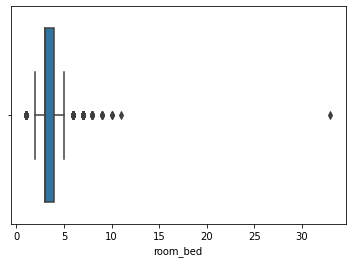

In [35]:
sns.boxplot(x = "room_bed",data = df_house) 
#we can see that significant number of outliers present in the 'room_bed' feature

In [36]:
df_house.room_bed.describe()

count    21492.000000
mean         3.373395
std          0.926866
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: room_bed, dtype: float64

There are significant number of outliers present in the room_bed feature. Hence, I choose to impute the missing values with the Median. Because median is restistant to outliers.

In [37]:
df_house["room_bed"] = df_house["room_bed"].replace(np.NaN, df_house["room_bed"].median())

<AxesSubplot:xlabel='room_bed'>

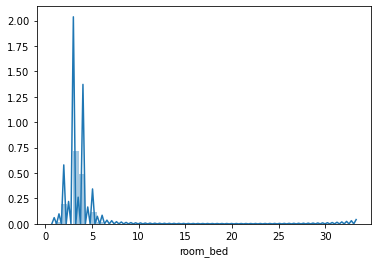

In [38]:
sns.distplot(df_house.room_bed)
#The data looks to be right-skewed (long tail in the right).

In [39]:
df_house.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed              0
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [40]:
#room_bath
df_house["room_bath"].value_counts()

2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: room_bath, dtype: int64

In [41]:
df_house["room_bath"].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [42]:
df_house["room_bath"].isnull().sum()
#we have null/missing values present in the 'room_bath' feature and these need to be treated.

108

In [43]:
df_house["room_bath"].dtype 

dtype('float64')

<AxesSubplot:xlabel='room_bath'>

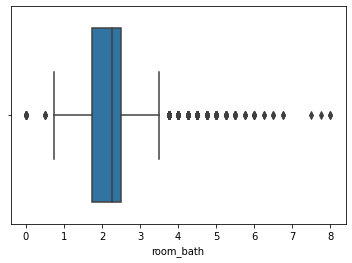

In [44]:
sns.boxplot(x = "room_bath",data = df_house) 
#we can see that significant number of outliers present in the 'room_bath' feature

In [45]:
df_house.room_bath.describe()

count    21505.000000
mean         2.115171
std          0.770248
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: room_bath, dtype: float64

There are significant number of outliers present in the room_bath feature. Hence, I choose to impute the missing values with the Median. Because median is restistant to outliers.

In [46]:
df_house["room_bath"] = df_house["room_bath"].replace(np.NaN, df_house["room_bath"].median())

<AxesSubplot:xlabel='room_bath'>

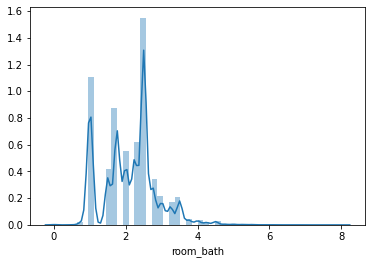

In [47]:
sns.distplot(df_house.room_bath)

In [48]:
#living_measure
df_house["living_measure"].unique()

array([3050.,  670., 3040., ..., 1405., 1295., 2253.])

In [49]:
df_house["living_measure"].value_counts()

1300.0     138
1400.0     134
1440.0     133
1660.0     129
1800.0     129
1010.0     129
1820.0     128
1720.0     125
1540.0     124
1480.0     124
1560.0     124
1320.0     122
1250.0     120
1580.0     119
1370.0     118
1780.0     117
1200.0     117
1900.0     117
1650.0     117
1430.0     116
1680.0     116
1460.0     116
1740.0     115
2100.0     115
1510.0     114
1830.0     114
1340.0     113
1260.0     113
1470.0     112
1500.0     112
1640.0     112
1610.0     112
1240.0     112
2120.0     111
1690.0     110
1960.0     110
1790.0     110
1530.0     109
1600.0     109
1670.0     109
1410.0     109
1700.0     108
1980.0     105
2040.0     104
1760.0     104
1590.0     104
2020.0     104
2000.0     103
1270.0     102
1520.0     102
1840.0     101
1940.0     101
2240.0     101
1280.0     100
1570.0     100
2060.0     100
1850.0     100
1730.0     100
1140.0     100
1490.0      99
1620.0      99
1890.0      98
1810.0      98
1150.0      98
1770.0      98
2080.0      98
1870.0    

In [50]:
df_house["living_measure"].dtype

dtype('float64')

<AxesSubplot:xlabel='living_measure'>

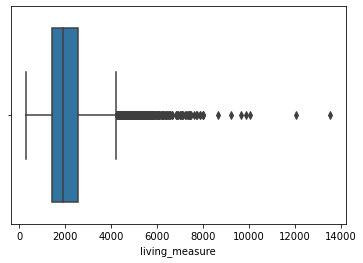

In [51]:
sns.boxplot(x = "living_measure",data = df_house)
#we can see that significant number of outliers present in the 'living_measure' feature

We can observe that, there are significant number of outliers present in the living_measure feature and the data is right-skewed. Hence, I choose to impute the missing values with the Median.

In [52]:
df_house["living_measure"] = df_house["living_measure"].replace(np.NaN, df_house["living_measure"].median())

<AxesSubplot:xlabel='living_measure'>

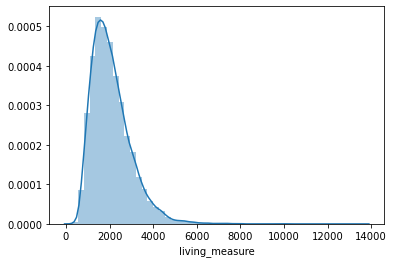

In [53]:
sns.distplot(df_house.living_measure)
#The data looks right-skewed (long tail in the right).

In [54]:
df_house["living_measure"].isnull().sum()

0

In [55]:
df_house["lot_measure"].unique()

array([ 9440.,  3101.,  2415., ..., 12369.,  2332., 60467.])

In [56]:
df_house["lot_measure"].value_counts()

5000.0       356
6000.0       290
4000.0       251
7200.0       219
4800.0       120
7500.0       119
4500.0       114
8400.0       110
9600.0       109
3600.0       103
9000.0        93
3000.0        84
5100.0        78
7000.0        76
8000.0        76
5500.0        73
8100.0        72
7800.0        69
4080.0        67
7700.0        65
7350.0        64
5200.0        63
5750.0        61
4400.0        56
5400.0        54
6600.0        52
6250.0        50
4200.0        49
7560.0        48
10000.0       46
10800.0       44
9750.0        43
8800.0        42
12000.0       42
6500.0        40
6120.0        39
7210.0        38
2500.0        36
8250.0        34
4600.0        34
6300.0        32
5250.0        32
10500.0       31
6380.0        31
3200.0        31
7620.0        30
10200.0       30
5040.0        29
9900.0        29
5700.0        29
15000.0       28
3800.0        28
4750.0        27
5600.0        27
5120.0        27
7680.0        27
6750.0        26
10125.0       25
7920.0        

<AxesSubplot:xlabel='lot_measure'>

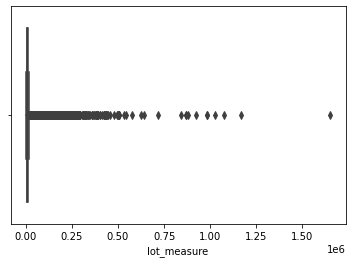

In [57]:
sns.boxplot(x = "lot_measure",data = df_house)
#we can see that significant number of outliers present in the 'lot_measure' feature

We can observe that, there are significant number of outliers present in the lot_measure feature and the data is right-skewed. Hence, I choose to impute the missing values with the Median.

In [58]:
df_house["lot_measure"] = df_house["lot_measure"].replace(np.NaN, df_house["lot_measure"].median())

<AxesSubplot:xlabel='lot_measure'>

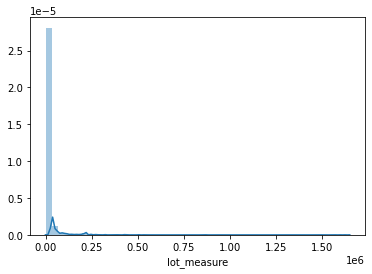

In [59]:
sns.distplot(df_house.lot_measure)
#The data looks clearly right-skewed.

In [60]:
df_house["ceil"].unique()

array([1. , 2. , 3. , 1.5, 2.5, nan, 3.5])

In [61]:
df_house["ceil"].value_counts()

1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

In [62]:
df_house["ceil"].dtype

dtype('float64')

<AxesSubplot:xlabel='ceil'>

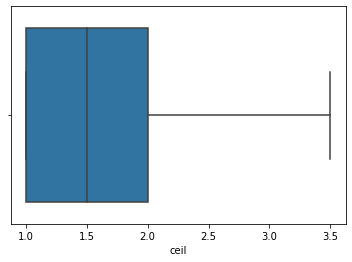

In [63]:
sns.boxplot(x = "ceil",data = df_house)
#we can see that there are no outliers present in the 'ceil' feature

In [64]:
df_house["ceil"].isnull().sum()

72

In [65]:
#imputing the missing values with median for 'ceil' feature
df_house["ceil"] = df_house["ceil"].replace(np.NaN, df_house["ceil"].median())

<AxesSubplot:xlabel='ceil'>

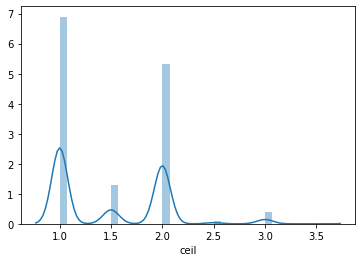

In [66]:
sns.distplot(df_house.ceil)

In [67]:
df_house["ceil"].isnull().sum()

0

In [68]:
df_house['coast'].value_counts()

0.0    21421
1.0      161
Name: coast, dtype: int64

In [69]:
df_house["coast"].isnull().sum()

31

In [70]:
df_house['coast'].unique()

array([ 0.,  1., nan])

In [71]:
df_house['coast'].dtype

dtype('float64')

The feature 'coast' seems to be categorical which represents whether house has waterfront view or not. We can Impute the missing values in 'coast' with Mode in this case.

In [72]:
import statistics
from statistics import *

In [73]:
df_house["coast"] = df_house["coast"].replace(np.NaN, statistics.mode(df_house["coast"]))

In [74]:
df_house["coast"].isnull().sum()

0

In [75]:
df_house["sight"].isnull().sum()

57

In [76]:
df_house["sight"].dtype # I have considered sight as numeric variable 0 fot sight not views, rest for number of times viewed.

dtype('float64')

In [77]:
df_house["sight"].unique()

array([ 0.,  4.,  2.,  3.,  1., nan])

In [78]:
df_house["sight"].value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

<AxesSubplot:xlabel='sight'>

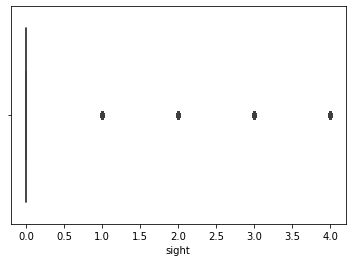

In [79]:
sns.boxplot(x = "sight",data = df_house)

<AxesSubplot:xlabel='sight'>

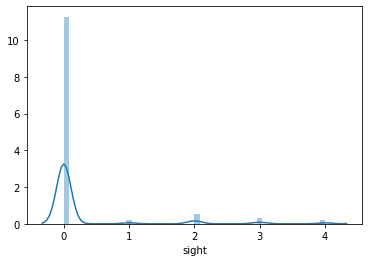

In [80]:
sns.distplot(df_house.sight)

In [81]:
df_house["sight"] = df_house["sight"].replace(np.NaN, df_house["sight"].median())

In [82]:
df_house["sight"].isnull().sum()

0

In [83]:
df_house.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed              0
room_bath             0
living_measure        0
lot_measure           0
ceil                  0
coast                 0
sight                 0
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [84]:
df_house["condition"].isnull().sum() 
#represents overall condition of the house similar to rating given to the house.can be condidered as categorical.

85

In [85]:
df_house["condition"].unique()

array([ 3.,  4.,  5.,  2., nan,  1.])

In [86]:
df_house["condition"].value_counts()

3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64

This variable represents the overall condition of the house. It's kind of rating given to the house based on the condition. I choose to impute this with mode.

In [87]:
df_house["condition"] = df_house["condition"].replace(np.NaN, statistics.mode(df_house["condition"]))

In [88]:
df_house["condition"].isnull().sum()

0

In [89]:
df_house["quality"].isnull().sum() 
#Represents grade given to the house based on grading system. can be considered as categorical variable.

1

In [90]:
df_house["quality"].unique()

array([ 8.,  6.,  7., 10.,  9.,  5., 11., 13.,  4., 12.,  1.,  3., nan])

In [91]:
df_house["quality"].value_counts()

7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

This variable represents grade given to the house based on grading system, It is a categorical variable. I choose to impute this with mode.

In [92]:
df_house["quality"] = df_house["quality"].replace(np.NaN, statistics.mode(df_house["quality"]))

In [93]:
df_house["quality"].isnull().sum()

0

In [94]:
df_house["ceil_measure"].isnull().sum()

1

In [95]:
df_house["ceil_measure"].unique()

array([1800.,  670., 3040., 1740., 1120., 1610., 1140., 3360., 3100.,
       1460., 3310., 1520., 2450., 1390.,  910., 1450., 1040., 1200.,
       1570., 1940., 2170., 1750., 1430., 1220., 2790.,  720., 1180.,
        950., 2470., 3220.,  900., 1420., 1870., 2920., 1100., 1440.,
       2360., 3000., 1130., 2156., 1170., 1300., 1340., 2820., 2290.,
       1070.,  800., 1550., 2200., 1230., 2305., 1270., 1540., 1890.,
       1060., 1620., 2670., 1980., 1760., 1150., 1470., 1160., 2270.,
       3500., 1950.,  750., 3290., 3240., 1320., 1769., 1790.,  830.,
       1290., 1010., 1910., 2110., 2460., 3550., 1330., 1280., 1480.,
       2040., 2150., 3140., 1370., 1400., 2740., 2020., 2530., 1260.,
       3370.,  870., 1500., 1240., 1810., 2190.,  890.,  630., 1410.,
       2180., 3460., 4160., 1830., 1380., 1530., 2610., 3180.,  880.,
       1690., 1930., 1190., 1600., 2240., 2210., 2750., 3440., 1000.,
       5110., 1757., 1900., 1050., 3480.,  740., 3820., 1990.,  970.,
       1490., 3080.,

In [96]:
df_house["ceil_measure"].dtype

dtype('float64')

In [97]:
df_house["ceil_measure"] = df_house["ceil_measure"].replace(np.NaN, df_house["ceil_measure"].median())

In [98]:
df_house["ceil_measure"].isnull().sum()

0

In [99]:
df_house["basement"].isnull().sum()

1

In [100]:
df_house["basement"].unique()

array([1250.,    0., 1320., 1000.,  480.,  610., 1050.,  700.,  430.,
        560.,  250.,  670.,  570.,  290.,  600.,  680.,  380.,   50.,
       1020.,  690., 1010.,  530., 1370., 1040.,  790.,  910.,  820.,
       1850.,  500.,  760.,  960.,  340.,  800.,  580., 1600., 1680.,
        900.,  420.,  450.,  200.,  240.,  950., 1590., 1220., 1500.,
        710.,   80.,  140., 1260.,  860.,  890.,  280.,  440.,  880.,
        220., 1650.,  630.,  780.,  810.,  300.,  720.,  470.,  150.,
       1180., 1060.,  120.,  660.,  400., 1100., 1780.,  640., 1170.,
       1890.,  130.,  550.,  360.,  940.,  650., 2730.,  870.,  730.,
       1350., 1530., 1540.,  620., 1080., 1900.,  770.,  520.,  920.,
       1110.,  830., 1420.,  980.,  190.,  330.,  350.,  740., 1570.,
        990., 1390.,  260.,  540., 1300.,  265., 1120.,  460.,  370.,
       1830., 1140.,  270.,  145.,  510.,  750., 1710.,  930., 1870.,
       1200.,  310.,  850.,  506.,  970., 1070., 1450.,  840.,   90.,
       3500., 1380.,

In [101]:
df_house["basement"].dtype

dtype('float64')

In [102]:
df_house["basement"] = df_house["basement"].replace(np.NaN, df_house["basement"].median())

In [103]:
df_house["basement"].isnull().sum()

0

In [104]:
df_house["yr_built"].isnull().sum()#Represents the year when house was built.It can be considered as categorical variable.

15

In [105]:
df_house["yr_built"].unique()

array([1966., 1948., 2009., 1924., 1994., 2005., 1978., 1983., 2012.,
       1912., 1990., 1967., 1919., 1908., 1950., 2000., 2013., 1943.,
       1922., 1977., 2004., 1935., 1964., 1945., 1987., 2008., 1940.,
       2003., 1988., 1985., 1998., 1995., 1946., 1984., 1958., 1963.,
       1942., 2014., 1971., 1936., 1954., 1923., 2002., 1972., 2007.,
       1930., 1962., 1999., 1953., 1965., 2010., 1997., 2006., 1979.,
       1996., 1992., 1968., 1980., 1981., 1969., 2001., 1929., 1952.,
       1916., 1976., 1974., 1920., 1931., 1975., 1960., 1900.,   nan,
       1986., 1989., 1906., 1955., 1956., 1915., 1941., 1993., 2011.,
       1925., 1947., 1991., 1926., 1927., 1951., 1961., 1932., 1917.,
       1928., 1959., 1921., 1911., 1949., 1982., 1913., 1957., 1914.,
       1938., 1973., 1937., 1944., 1970., 1901., 1907., 1939., 1918.,
       1934., 1904., 2015., 1909., 1910., 1905., 1902., 1933., 1903.])

In [106]:
df_house["yr_built"] = df_house["yr_built"].replace(np.NaN, statistics.mode(df_house["yr_built"]))

In [107]:
df_house["yr_built"].isnull().sum()

0

In [108]:
df_house["long"].isnull().sum()

34

In [109]:
df_house["long"].dtype

dtype('float64')

In [110]:
df_house["long"].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285,      nan,
       -122.333, -122.165, -122.15 , -122.178, -121.87 , -122.352,
       -122.122, -122.275, -122.234, -122.324, -122.321, -122.277,
       -122.196, -122.398, -122.019, -122.181, -122.325, -122.191,
       -122.026, -122.084, -122.3  , -122.287, -122.011, -122.127,
       -122.281, -122.221, -121.859, -121.913, -122.39 , -121.871,
       -122.013, -122.381, -122.279, -122.194, -122.201, -122.125,
       -122.379, -122.121, -122.024, -122.389, -122.305, -122.346,
       -122.375, -122.344, -122.028, -122.193, -122.209, -122.365,
       -122.28 , -122.334, -122.149, -122.388, -122.016, -122.298,
       -122.153, -121.802, -121.878, -122.218, -122.359, -122.296,
       -122.361, -122.357, -122.309, -122.056, -121.974, -122.18 ,
       -122.331, -122.374, -121.976, -121.975, -122.216, -122.188,
       -122.391, -122.31 , -122.302, -121.972, -122.22 , -122.17 ,
       -122.101, -121.888, -122.046, -122.154, -122.145, -122.

<AxesSubplot:xlabel='long'>

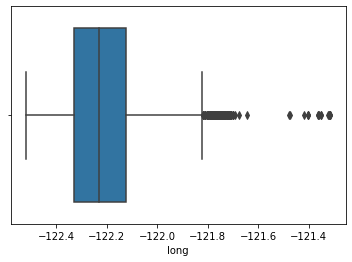

In [111]:
sns.boxplot(x = "long",data = df_house)

In [112]:
df_house["long"] = df_house["long"].replace(np.NaN, df_house["long"].median())

<AxesSubplot:xlabel='long'>

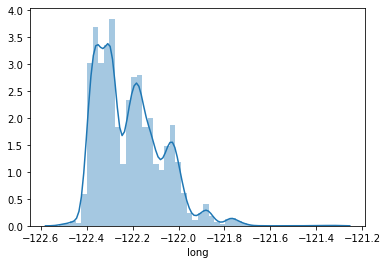

In [113]:
sns.distplot(df_house.long)

In [114]:
df_house["long"].isnull().sum()

0

In [115]:
#Represents square footage of house, when measured in 2015 year 
#As house area may or may not changed after renovation if any happened
df_house["living_measure15"].isnull().sum()

166

In [116]:
df_house["living_measure15"].dtype

dtype('float64')

In [117]:
df_house["living_measure15"].unique()

array([2020., 1660., 2620., 2030., 1120., 1610., 1170., 2800., 1850.,
       1460., 2380., 1880., 2440., 1390., 1060., 1280., 1540., 1200.,
       3050., 1410., 2300., 1440., 1710., 2850., 1860., 1830., 1550.,
       2490., 3330., 1350., 2040., 3100., 1790., 2420., 3000., 1870.,
       1730., 1708., 1670., 1510., 1480., 2820., 1090., 1160., 1220.,
       2710., 1240., 1320., 2120., 1500., 1450., 2400., 2050., 1380.,
       2070., 1820., 1620., 1268., 2260., 3110., 1890., 1260., 3380.,
       1680., 2502., 1340., 1800., 1180., 2650., 2450., 3730., 2110.,
       2990., 3920., 2330., 2060., 2520., 1330., 1780., 2150., 2790.,
       2080., 1650., 2530., 1760., 2900.,  870., 1770., 2190., 1270.,
       3140., 1140., 1720., 2214., 3340., 2540., 3400.,   nan, 2610.,
       1400., 3130., 1530., 1690., 2580., 1990., 3390., 3800., 2140.,
        910., 1560., 1150., 4110., 2510., 1050., 3360., 1490., 3010.,
       2130., 3450., 2740., 2200., 2100., 2360., 1580., 3630., 1100.,
       1020., 1930.,

<AxesSubplot:xlabel='living_measure15'>

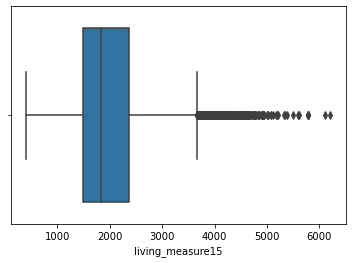

In [118]:
sns.boxplot(x = "living_measure15",data = df_house)

In [119]:
df_house["living_measure15"] = df_house["living_measure15"].replace(np.NaN, df_house["living_measure15"].median())

<AxesSubplot:xlabel='living_measure15'>

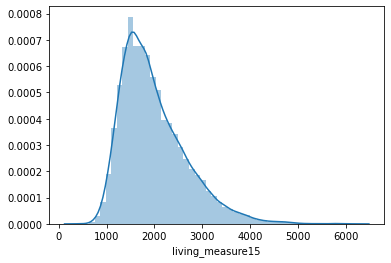

In [120]:
sns.distplot(df_house.living_measure15)

In [121]:
df_house["living_measure15"].isnull().sum()

0

In [122]:
df_house["lot_measure15"].isnull().sum()

29

In [123]:
df_house["lot_measure15"].dtype

dtype('float64')

In [124]:
df_house["lot_measure15"].unique()

array([ 8660.,  4100.,  2433., ..., 11491.,  2853.,  7604.])

<AxesSubplot:xlabel='lot_measure15'>

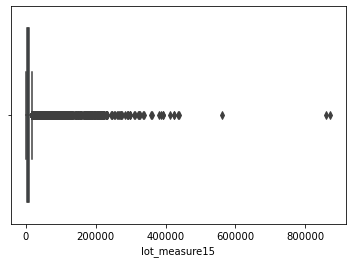

In [125]:
sns.boxplot(x = "lot_measure15",data = df_house)

In [126]:
df_house["lot_measure15"] = df_house["lot_measure15"].replace(np.NaN, df_house["lot_measure15"].median())

<AxesSubplot:xlabel='lot_measure15'>

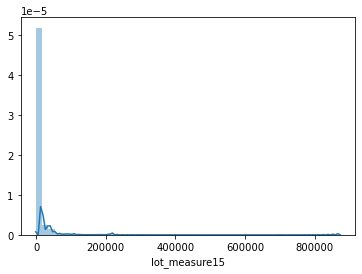

In [127]:
sns.distplot(df_house.lot_measure15)

In [128]:
df_house["lot_measure15"].isnull().sum()

0

In [129]:
df_house["furnished"].isnull().sum()

29

In [130]:
df_house["furnished"].unique() # This is a categorical variable represents house is furnished or not.

array([ 0.,  1., nan])

In [131]:
df_house["furnished"] = df_house["furnished"].replace(np.NaN, statistics.mode(df_house["furnished"]))

In [132]:
df_house["furnished"].isnull().sum()

0

In [133]:
df_house["total_area"].isnull().sum() #Measure of both living and lot

68

In [134]:
df_house["total_area"].dtype

dtype('float64')

In [135]:
df_house["total_area"].unique()

array([12490.,  3771.,  5455., ..., 16111., 63597., 38122.])

<AxesSubplot:xlabel='total_area'>

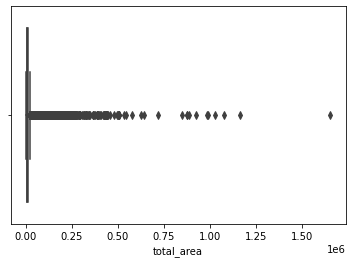

In [136]:
sns.boxplot(x = "total_area",data = df_house)

In [137]:
df_house["total_area"] = df_house["total_area"].replace(np.NaN, df_house["total_area"].median())

<AxesSubplot:xlabel='total_area'>

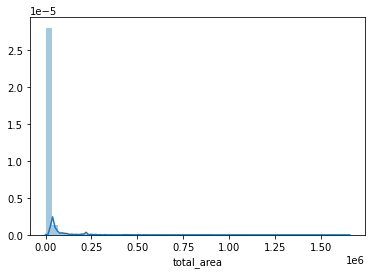

In [138]:
sns.distplot(df_house.total_area)

In [139]:
df_house["total_area"].isnull().sum()

0

In [140]:
df_house.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [141]:
df_house.describe().T #Detailed Description of data

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.371304e+00  9.246877e-01  1.000000e+00   
room_bath         21613.0  2.115845e+00  7.683799e-01  0.000000e+00   
living_measure    21613.0  2.079727e+03  9.181472e+02  2.900000e+02   
lot_measure       21613.0  1.509003e+04  4.138466e+04  5.200000e+02   
ceil              21613.0  1.494147e+00  5.390116e-01  1.000000e+00   
coast             21613.0  7.449220e-03  8.598879e-02  0.000000e+00   
sight             21613.0  2.337482e-01  7.655206e-01  0.000000e+00   
condition         21613.0  3.407718e+00  6.499332e-01  1.000000e+00   
quality           21613.0  7.656827e+00  1.175465e+00  1.000000e+00   
ceil_measure      21613.0  1.788356e+03  8.280848e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971039e+03  2.938506e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.407590e-01 -1.225190e+02   
living_measure15  21613.0  1.985936e+03  6.830025e+02  3.990000e+02   
lot_measure15     21613.0  1.275964e+04  2.726932e+04  6.510000e+02   
furnished         21613.0  1.964558e-01  3.973264e-01  0.000000e+00   
total_area        21613.0  1.716808e+04  4.156534e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.043000e+03  7.618000e+03  1.066000e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008000e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.040000e+03  9.575000e+03  1.297000e+04  1.652659e+06

<ol>
    <li><b>CID:</b> Notation/ID for the house.Not useful for our analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it is <b>Right-Skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. The distribution is <b>slightly Right-Skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean is slightly < Median, it is <b>slightly Left-Skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it is <b>Right-Skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double the Median, it's <b>Hightly Right-Skewed</b>.</li>
    <li><b>ceil:</b> Number of floors range from 1 - 3.5 As Mean ~ Median, it's <b>almost Normal Distributed</b>.</li>
    <li><b>coast:</b> As this value represent whether house has waterfront view or not. It's <b>categorical column</b>. From above analysis we got to know, very few houses has the waterfront view.</li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>condition:</b> Represents rating of house which ranges from 1 - 5. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>yr_built:</b> House built year ranges from 1900 - 2015. As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b>which refers wether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>long:</b> Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's <b>Highly Right-Skewed</b></li>
</ol>

From above analysis we can observe that,

* Most columns distribution is Right-Skewed and only few features are Left-Skewed (like room_bath, yr_built, lat).

* We have columns which are Categorical in nature are -> coast, yr_built,yr_renovated,quality,condition, furnished.

All the missing values are imputed, now the data is cleaned and good.

In [142]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
df_house.duplicated().sum()

0

There are no duplicate values in the data.

In [143]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  float64
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  float64
 11  quality           21613 non-null  float64
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

We can observe that datatypes for few features are changed after imputation. we will be modifying them for further analysis.

In [144]:
#Lets modify the categorical features into 'object' datatype.
df_house['coast']=df_house['coast'].astype('object')
df_house['condition']=df_house['condition'].astype('object')
df_house['quality']=df_house['quality'].astype('object')
df_house['yr_built']=df_house['yr_built'].astype('object')
df_house['furnished']=df_house['furnished'].astype('object')

In [145]:
df_house['yr_renovated']=df_house['yr_renovated'].astype('object')

In [146]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  object 
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  object 
 11  quality           21613 non-null  object 
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  object 
 15  yr_renovated      21613 non-null  object 
 16  zipcode           21613 non-null  int64 

Now, In the dataset, we have 21613 records for all the variables(no null/missing values) and 23 columns, out of which

*  13 features are of float64 type
*  3 features are of integer type 
*  7 feature is of object type

In [147]:
df_house.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.371304e+00  9.246877e-01  1.000000e+00   
room_bath         21613.0  2.115845e+00  7.683799e-01  0.000000e+00   
living_measure    21613.0  2.079727e+03  9.181472e+02  2.900000e+02   
lot_measure       21613.0  1.509003e+04  4.138466e+04  5.200000e+02   
ceil              21613.0  1.494147e+00  5.390116e-01  1.000000e+00   
sight             21613.0  2.337482e-01  7.655206e-01  0.000000e+00   
ceil_measure      21613.0  1.788356e+03  8.280848e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.407590e-01 -1.225190e+02   
living_measure15  21613.0  1.985936e+03  6.830025e+02  3.990000e+02   
lot_measure15     21613.0  1.275964e+04  2.726932e+04  6.510000e+02   
total_area        21613.0  1.716808e+04  4.156534e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.043000e+03  7.618000e+03  1.066000e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008000e+04  8.712000e+05  
total_area        7.040000e+03  9.575000e+03  1.297000e+04  1.652659e+06

### Exploratory Data Analysis

#### Performing Univariate, Bivariate, Multivariate analysis and understanding each and every feature one by one.

### Univariate Analysis

**cid**

In [148]:
#cid
cid_count=df_house.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

* The feature 'cid' is appearing muliple times, it seems data contains house which is sold multiple times. 
* We can observe that, We have 176 properties that were sold more than once in the given data.

**dayhours**

In [149]:
#Before analysing this feature I will take the copy of the data for model building.
#Converting the dayhours to 'month_year' as sale month-year is relevant for analysis

df1=df_house.copy()
df_house.dayhours=df_house.dayhours.str.replace('T000000', "")
df_house.dayhours=pd.to_datetime(df_house.dayhours,format='%Y%m%d')
df_house['month_year']=df_house['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
df_house['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [150]:
df_house['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

We can observe that, most of the houses were sold in  April - 2015 & July - 2014.

In [151]:
df_house.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558123.736239
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

* This represents the timeline for sale data of houses is from May-2014 to May-2015.
* From the mean sale data we can observe that, April month have the highest mean price.
* It represents that in April month highest sale of houses happened.

**Price(Target Variable)**

In [152]:
df_house.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

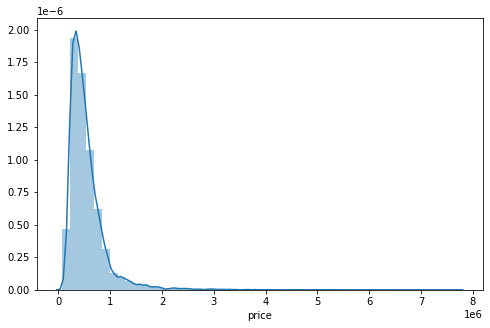

In [153]:
plt.figure(figsize=(8, 5))
sns.distplot(df_house['price'])

* The Price is ranging from 75,000 to 77,00,000.
* The distribution is right - skewed.

**room_bed**

In [154]:
df_house['room_bed'].value_counts()

3.0     9888
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

Here, the value 33 seems to be an outlier. This need to be checked before treating it.

In [155]:
df_house[df_house['room_bed']==33]

cid   dayhours   price  room_bed  room_bath  living_measure  \
16913  2402100895 2014-06-25  640000      33.0       1.75          1620.0   

       lot_measure  ceil coast  sight condition quality  ceil_measure  \
16913       6000.0   1.0   0.0    0.0       5.0     7.0        1040.0   

       basement yr_built yr_renovated  zipcode      lat     long  \
16913     580.0   1947.0            0    98103  47.6878 -122.331   

       living_measure15  lot_measure15 furnished  total_area month_year  
16913            1330.0         4700.0       0.0      7620.0  June-2014

This is sure to be an outlier, because for a 33 bedroom property the price given is 640000 which is very low. This outlier need to be treated.

<AxesSubplot:xlabel='room_bed', ylabel='count'>

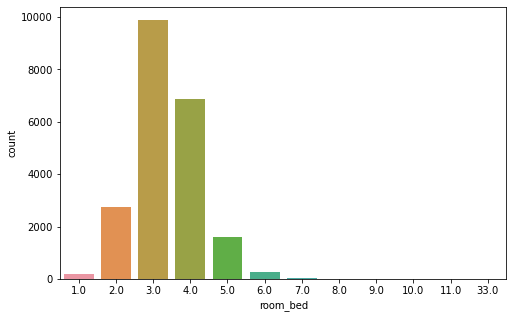

In [156]:
plt.figure(figsize=(8, 5))
sns.countplot(df_house.room_bed)

Most of the properties/houses are of 3 bedroom & 4 bedroom type. 

**room_bath**

In [157]:
df_house['room_bath'].value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3031
2.00    1917
2.25    2147
2.50    5358
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

<AxesSubplot:xlabel='room_bath', ylabel='count'>

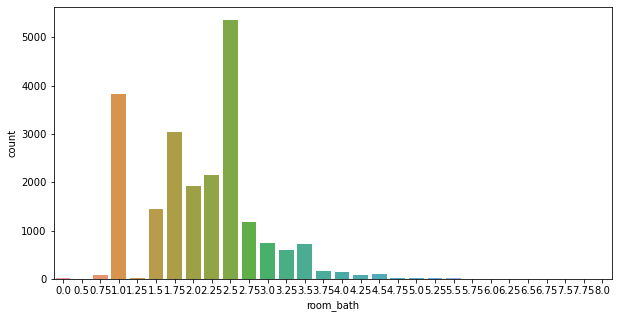

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(df_house.room_bath)

Majority of the properties/houses having bathroom in the range of 1.0 to 2.5

Skewness : 0.5102509663719975


<AxesSubplot:xlabel='room_bath'>

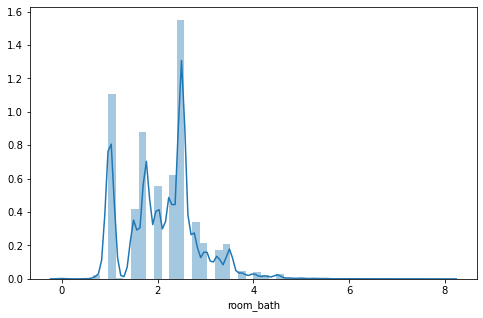

In [159]:
plt.figure(figsize=(8, 5))
print("Skewness :",df_house.room_bath.skew())
sns.distplot(df_house.room_bath)

The distribution is slightly left skewed.

**living_measure**

Skewness : 1.4735169838222357


count    21613.000000
mean      2079.727155
std        918.147155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

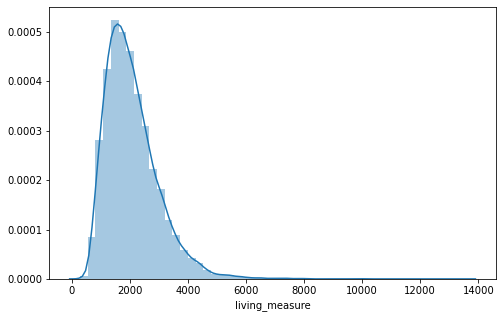

In [160]:
plt.figure(figsize=(8, 5))
print("Skewness :",df_house.living_measure.skew())
sns.distplot(df_house.living_measure)
df_house.living_measure.describe()

Data is skewed as visible from plot, and its distribution is normal & right skewed

<AxesSubplot:xlabel='living_measure'>

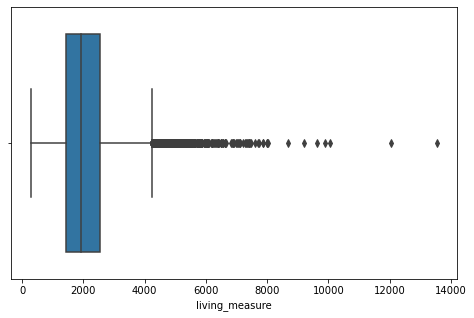

In [161]:
#boxplot for living_measure
plt.figure(figsize=(8, 5))
sns.boxplot(df_house.living_measure)

The feature 'living_measure' is having outliers. These outliers need to be further analysed and treated.

In [162]:
#checking the no. of data points with Living measure greater than 8000
df_house[df_house['living_measure']>8000]

cid   dayhours    price  room_bed  room_bath  living_measure  \
1068   6762700020 2014-10-13  7700000       6.0       8.00         12050.0   
1245   1924059029 2014-06-17  4670000       5.0       6.75          9640.0   
7928   1225069038 2014-05-05  2280000       7.0       8.00         13540.0   
10639  9208900037 2014-09-19  6890000       6.0       7.75          9890.0   
10718  9808700762 2014-06-11  7060000       5.0       4.50         10040.0   
12794  2470100110 2014-08-04  5570000       5.0       5.75          9200.0   
20038  1247600105 2014-10-20  5110000       5.0       5.25          8010.0   
20193  2303900035 2014-06-11  2890000       5.0       6.25          8670.0   
20746  6072800246 2014-07-02  3300000       5.0       6.25          8020.0   

       lot_measure  ceil coast  sight condition quality  ceil_measure  \
1068       27600.0   2.5   0.0    3.0       4.0    13.0        8570.0   
1245       13068.0   1.0   1.0    4.0       3.0    12.0        4820.0   
7928      307752.0   3.0   0.0    4.0       3.0    12.0        9410.0   
10639      31374.0   2.0   0.0    4.0       3.0    13.0        8860.0   
10718      37325.0   2.0   1.0    2.0       3.0    11.0        7680.0   
12794      35069.0   2.0   0.0    0.0       3.0    13.0        6200.0   
20038      45517.0   2.0   1.0    4.0       3.0    12.0        5990.0   
20193      64033.0   2.0   0.0    4.0       3.0    13.0        6120.0   
20746      21738.0   2.0   0.0    0.0       3.0    11.0        8020.0   

       basement yr_built yr_renovated  zipcode      lat     long  \
1068     3480.0   1910.0         1987    98102  47.6298 -122.323   
1245     4820.0   1983.0         2009    98040  47.5570 -122.210   
7928     4130.0   1999.0            0    98053  47.6675 -121.986   
10639    1030.0   2001.0            0    98039  47.6305 -122.230   
10718    2360.0   1940.0         2001    98004  47.6500 -122.214   
12794    3000.0   2001.0            0    98039  47.6289 -122.233   
20038    2020.0   1999.0            0    98033  47.6767 -122.211   
20193    2550.0   1965.0         2003    98177  47.7295 -122.372   
20746       0.0   2001.0            0    98006  47.5675 -122.189   

       living_measure15  lot_measure15 furnished  total_area      month_year  
1068             3940.0         8800.0       1.0     39650.0    October-2014  
1245             3270.0        10454.0       1.0     22708.0       June-2014  
7928             4850.0       217800.0       1.0    321292.0        May-2014  
10639            4540.0        42730.0       1.0     41264.0  September-2014  
10718            3930.0        25449.0       1.0     47365.0       June-2014  
12794            3560.0        24345.0       1.0     44269.0     August-2014  
20038            3430.0        26788.0       1.0     53527.0    October-2014  
20193            4140.0        81021.0       1.0     72703.0       June-2014  
20746            4160.0        18969.0       1.0     29758.0       July-2014

* we can see that there are 9 houses which have more than 8000 living_measure. 
* These can be considered as outliers and need to be treated.

**lot_measure**

Skewness : 13.084880210575367


count    2.161300e+04
mean     1.509003e+04
std      4.138466e+04
min      5.200000e+02
25%      5.043000e+03
50%      7.618000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

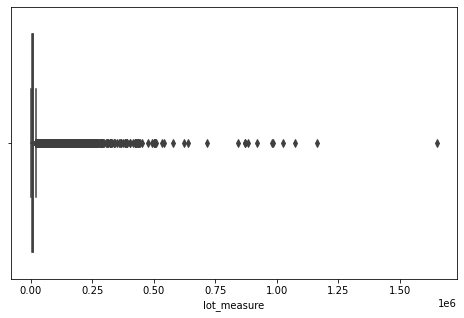

In [163]:
plt.figure(figsize=(8,5))
print("Skewness :",df_house.lot_measure.skew())
sns.boxplot(df_house.lot_measure)
df_house.lot_measure.describe()

We can see that the data is skewed and has outliers as visible from plot above.

In [164]:
#checking the no. of data points with Lot measure greater than 1250000
df_house[df_house['lot_measure']>1250000]

cid   dayhours   price  room_bed  room_bath  living_measure  \
11674  1020069017 2015-03-27  700000       4.0        1.0          1300.0   

       lot_measure  ceil coast  sight condition quality  ceil_measure  \
11674    1651359.0   1.0   0.0    3.0       4.0     6.0        1300.0   

       basement yr_built yr_renovated  zipcode      lat     long  \
11674       0.0   1920.0            0    98022  47.2313 -122.023   

       living_measure15  lot_measure15 furnished  total_area  month_year  
11674            2560.0       425581.0       0.0   1652659.0  March-2015

we can observe that, we have only 1 record with more than 1250000. This is an outlier need to be treated further.

**ceil**

In [165]:
df_house['ceil'].dtype

dtype('float64')

In [166]:
df_house.ceil.value_counts()

1.0    10647
2.0     8210
1.5     1977
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

Most of the houses have 1 floor.

<AxesSubplot:xlabel='ceil', ylabel='count'>

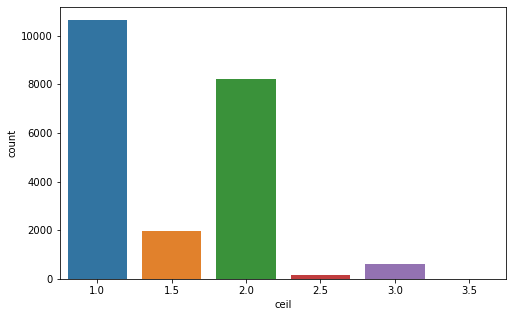

In [167]:
plt.figure(figsize=(8,5))
sns.countplot('ceil',data=df_house)

From the above plot, we can observe that 1 & 2 floored houses are more in the data.

**coast**

In [168]:
df_house.coast.value_counts()

0.0    21452
1.0      161
Name: coast, dtype: int64

Most houses do not have waterfront view, very few are having waterfront view.

**sight**

In [169]:
df_house.sight.value_counts()

0.0    19494
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

We can observe that most of the houses has not been viewed. Here, 0 represents that the sight has not been viewed and the others are number of times the sight has been viewed.

**Condition**

In [170]:
df_house.condition.value_counts() #Rating for the house

3.0    14063
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64

Most of the houses are rated as 3 and above for its overall condition.

**quality**

In [171]:
df_house.quality.value_counts() # Rating based on quality 

7.0     8982
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

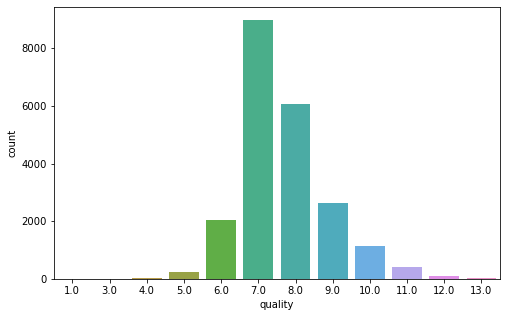

In [172]:
plt.figure(figsize=(8,5))
sns.countplot('quality',data=df_house)

Most of the properties/houses have quality rating between 6 to 10

In [173]:
#let's check the no. of data points with quality rating as 13
df_house[df_house['quality']==13]

cid   dayhours    price  room_bed  room_bath  living_measure  \
388     853200010 2014-07-01  3800000       5.0       5.50          7050.0   
1068   6762700020 2014-10-13  7700000       6.0       8.00         12050.0   
3271   7237501190 2014-10-10  1780000       4.0       3.25          4890.0   
3649   2426039123 2015-01-30  2420000       5.0       4.75          7880.0   
4371   1725059316 2014-11-20  2390000       4.0       4.00          6330.0   
8420   9831200500 2015-03-04  2480000       5.0       3.75          6810.0   
10639  9208900037 2014-09-19  6890000       6.0       7.75          9890.0   
10832  4139900180 2015-04-20  2340000       4.0       2.50          4500.0   
11459  1068000375 2014-09-23  3200000       6.0       5.00          7100.0   
12794  2470100110 2014-08-04  5570000       5.0       5.75          9200.0   
16985  2303900100 2014-09-11  3800000       3.0       4.25          5510.0   
20193  2303900035 2014-06-11  2890000       5.0       6.25          8670.0   
20547  3303850390 2014-12-12  2980000       5.0       5.50          7400.0   

       lot_measure  ceil coast  sight condition quality  ceil_measure  \
388        42840.0   1.0   0.0    2.0       4.0    13.0        4320.0   
1068       27600.0   2.5   0.0    3.0       4.0    13.0        8570.0   
3271       13402.0   2.0   0.0    0.0       3.0    13.0        4890.0   
3649       24250.0   2.0   0.0    2.0       3.0    13.0        7880.0   
4371       13296.0   2.0   0.0    2.0       3.0    13.0        4900.0   
8420        7500.0   2.5   0.0    0.0       3.0    13.0        6110.0   
10639      31374.0   2.0   0.0    4.0       3.0    13.0        8860.0   
10832      35200.0   1.0   0.0    0.0       3.0    13.0        4500.0   
11459      18200.0   2.5   0.0    0.0       3.0    13.0        5240.0   
12794      35069.0   2.0   0.0    0.0       3.0    13.0        6200.0   
16985      35000.0   2.0   0.0    4.0       3.0    13.0        4910.0   
20193      64033.0   2.0   0.0    4.0       3.0    13.0        6120.0   
20547      18898.0   2.0   0.0    3.0       3.0    13.0        6290.0   

       basement yr_built yr_renovated  zipcode      lat     long  \
388      2730.0   1978.0            0    98004  47.6229 -122.220   
1068     3480.0   1910.0         1987    98102  47.6298 -122.323   
3271        0.0   2004.0            0    98059  47.5303 -122.131   
3649        0.0   1996.0            0    98177  47.7334 -122.362   
4371     1430.0   2000.0            0    98033  47.6488 -122.201   
8420      700.0   1922.0            0    98102  47.6285 -122.322   
10639    1030.0   2001.0            0    98039  47.6305 -122.230   
10832       0.0   1988.0            0    98006  47.5477 -122.126   
11459    1860.0   1933.0         2002    98199  47.6427 -122.408   
12794    3000.0   2001.0            0    98039  47.6289 -122.233   
16985     600.0   1997.0            0    98177  47.7296 -122.370   
20193    2550.0   1965.0         2003    98177  47.7295 -122.372   
20547    1110.0   2001.0            0    98006  47.5431 -122.112   

       living_measure15  lot_measure15 furnished  total_area      month_year  
388              5070.0        20570.0       1.0     49890.0       July-2014  
1068             3940.0         8800.0       1.0     39650.0    October-2014  
3271             5790.0        13539.0       1.0     18292.0    October-2014  
3649             2740.0        10761.0       1.0     32130.0    January-2015  
4371             2200.0         9196.0       1.0     19626.0   November-2014  
8420             2660.0         7500.0       1.0     14310.0      March-2015  
10639            4540.0        42730.0       1.0     41264.0  September-2014  
10832            4760.0        35200.0       1.0     39700.0      April-2015  
11459            3130.0         6477.0       1.0     25300.0  September-2014  
12794            3560.0        24345.0       1.0     44269.0     August-2014  
16985            3430.0        45302.0       1.0     40510.0  September-2014

We can observe that, there are only 13 properties which have the highest quality rating.

**ceil_measure**

Skewness : 1.4468098702392473


count    21613.000000
mean      1788.355989
std        828.084833
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

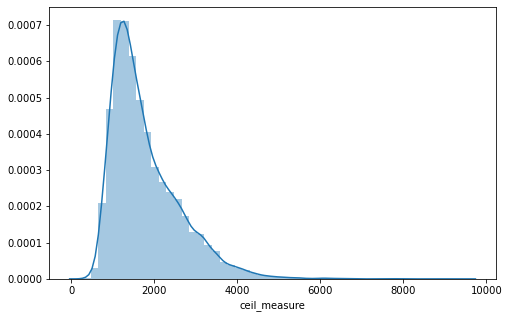

In [174]:
print("Skewness :", df_house.ceil_measure.skew())
plt.figure(figsize=(8,5))
sns.distplot(df_house.ceil_measure)
df_house.ceil_measure.describe()

As Mean > Median ceil_measure is right skewed.

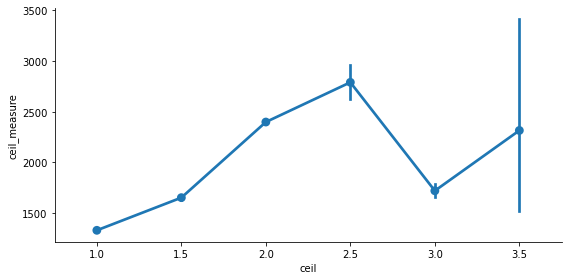

In [175]:
sns.factorplot(x='ceil',y='ceil_measure',data=df_house, size = 4, aspect = 2)

The vertical lines at each point represent the IQR(inter quartile range) of values at that point.

**basement**

<AxesSubplot:xlabel='basement'>

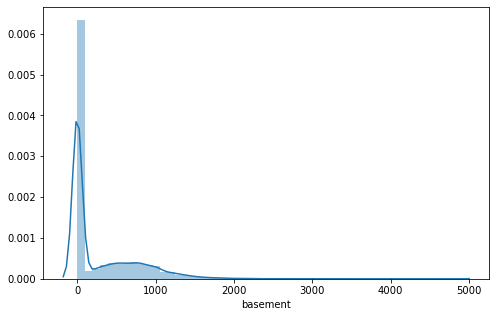

In [176]:
plt.figure(figsize=(8, 5))
sns.distplot(df_house.basement)

Here, We can see 2 gaussians, which tells us there are houses which do not have basements and some have the basements.

In [177]:
df_house[df_house.basement==0].shape

(13126, 24)

Houses have zero measure of basement means that they do not have basements. Around 60% of the houses do not have the basement.

<AxesSubplot:xlabel='basement'>

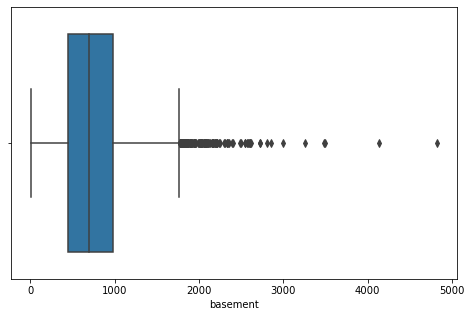

In [178]:
#plotting the boxplot for properties which have basements only
house_df_base=df_house[df_house['basement']>0]
plt.figure(figsize=(8,5))
sns.boxplot(house_df_base['basement'])

We can observe that there are outliers, these need to be treated.

In [179]:
#checking the no. of data points with 'basement' greater than 4000
df_house[df_house['basement']>4000]

cid   dayhours    price  room_bed  room_bath  living_measure  \
1245  1924059029 2014-06-17  4670000       5.0       6.75          9640.0   
7928  1225069038 2014-05-05  2280000       7.0       8.00         13540.0   

      lot_measure  ceil coast  sight condition quality  ceil_measure  \
1245      13068.0   1.0   1.0    4.0       3.0    12.0        4820.0   
7928     307752.0   3.0   0.0    4.0       3.0    12.0        9410.0   

      basement yr_built yr_renovated  zipcode      lat     long  \
1245    4820.0   1983.0         2009    98040  47.5570 -122.210   
7928    4130.0   1999.0            0    98053  47.6675 -121.986   

      living_measure15  lot_measure15 furnished  total_area month_year  
1245            3270.0        10454.0       1.0     22708.0  June-2014  
7928            4850.0       217800.0       1.0    321292.0   May-2014

We have only 2 properties with more than 4,000 measure basement

<AxesSubplot:xlabel='basement'>

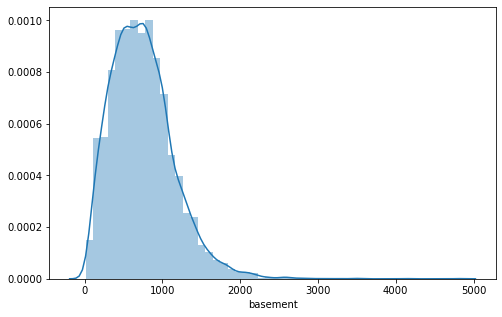

In [180]:
#Distribution of houses having basement
plt.figure(figsize=(8,5))
sns.distplot(house_df_base.basement)

The distribution is right-skewed.

**yr_built**

<AxesSubplot:xlabel='yr_built'>

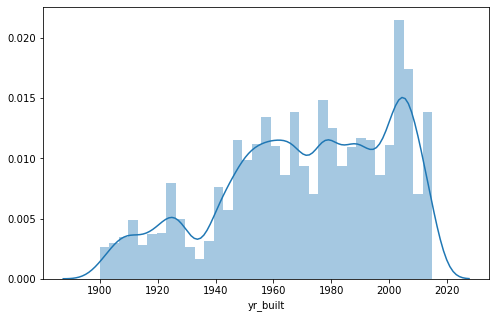

In [181]:
plt.figure(figsize=(8,5))
sns.distplot(df_house.yr_built)

* we can observe that, the houses range from new to very old.
* The built year of the houses range from 1900 to 2014 and we can see the upward trend with time

**yr_renovated**

In [182]:
df_house[df_house['yr_renovated']>0].shape

(914, 24)

We can see that, only 914 houses were renovated out of 21613 houses

<AxesSubplot:xlabel='yr_renovated'>

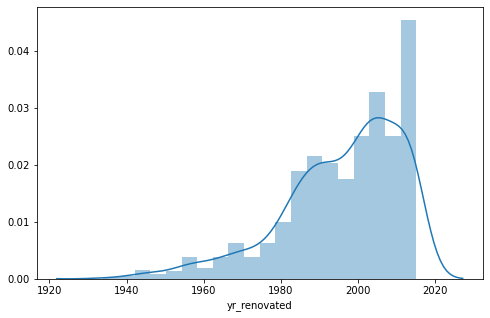

In [183]:
#plot for the houses which are renovated
house_df_renovated=df_house[df_house['yr_renovated']>0]
plt.figure(figsize=(8,5))
sns.distplot(house_df_renovated.yr_renovated)

**zip,lat,long**

In [184]:
df_house['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98008    283
98028    283
98040    282
98198    280
98003    280
98031    274
98072    273
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, dtype: int64

In [185]:
!pip install folium

In [186]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [187]:
df_house['lat'].value_counts()

47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
47.6955    16
47.6886    16
47.6647    15
47.5402    15
47.6860    15
47.6842    15
47.6904    15
47.5396    14
47.5400    14
47.5445    14
47.6374    14
47.6534    14
47.6821    14
47.5427    14
47.6727    14
47.6651    14
47.7076    14
47.5518    14
47.6914    14
47.5533    14
47.6853    14
47.6844    14
47.5342    14
47.5323    14
47.6729    14
47.5305    13
47.6754    13
47.6857    13
47.6981    13
47.6968    13
47.6765    13
47.6388    13
47.6916    13
47.6285    13
47.6970    13
47.6801    13
47.7222    13
47.6368    13
47.6684    13
47.6971    13
47.5659    13
47.6875    13
47.5503    13
47.5168    12
47.5328    12
47.6380    12
47.6304    12
47.5828    12
47.6692    12
47.7027    12
47.6719    12
47.6948    12
47.6872    12
47.6915    12
47.5670    12
47.6536    12
47.5401    12
47.6835    12
47.7326    12
47.6384    12
47.5707    12
47.5677    12
47.5489    12
47.5434    12
47.6339    12
47.7145    12
47.512

In [188]:
df_house['long'].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     94
-122.172     94
-122.365     94
-122.346     93
-122.306     93
-122.348     92
-122.375     92
-122.351     92
-122.299     92
-122.304     91
-122.295     91
-122.292     90
-122.285     90
-122.350     90
-122.352     89
-122.289     88
-122.298     88
-122.384     87
-122.359     87
-122.317     86
-122.316     86
-122.301     86
-122.287     85
-122.361     85
-122.354     85
-122.385     84
-122.353     84
-122.311     84
-122.391     84
-122.189     83
-122.371     83
-122.286     83
-122.370     81
-122.349     81
-122.378     81
-122.388     81
-122.340     80
-122.387     79
-122.308     78
-122.331     78
-122.358     78
-122.307     78
-122.337     77
-122.356     77
-122.360     76
-122.319     75
-122.302     75
-122.324     75
-122.297     75
-122.339     75
-122.174     75
-122.369     75
-122.321     74
-122.315     74
-122.305

In [189]:
## Let's study Latitude and Longitue features 

lat = df_house['lat'].tolist()
lon = df_house['long'].tolist()
locations = list(zip(lat, lon))

map1 = folium.Map(location=[47.5491,-122.290], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

The Map with features lat long represents that the data is the hoses/properties are in Seattle/washington (USA) we can zoom out to check which area is having how many houses from the map above.

**furnished**

In [190]:
df_house.furnished.value_counts()

0.0    17367
1.0     4246
Name: furnished, dtype: int64

Most of the houses are not furnished.

<AxesSubplot:xlabel='furnished', ylabel='count'>

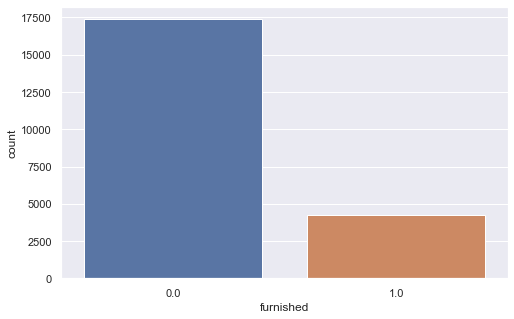

In [191]:
plt.figure(figsize=(8,5))
sns.countplot('furnished',data=df_house)

### Bivariate Analysis

**month_year Vs Price**

mean  median  size
month_year                                 
April-2015      561933.463021  476500  2231
August-2014     536527.039691  442100  1940
December-2014   524602.893270  432500  1471
February-2015   507919.603200  425545  1250
January-2015    525963.251534  438500   978
July-2014       544892.161013  465000  2211
June-2014       558123.736239  465000  2180
March-2015      544057.683200  450000  1875
May-2014        548166.600113  465000  1768
May-2015        558193.095975  455000   646
November-2014   522058.861800  435000  1411
October-2014    539127.477636  446900  1878
September-2014  529315.868095  450000  1774

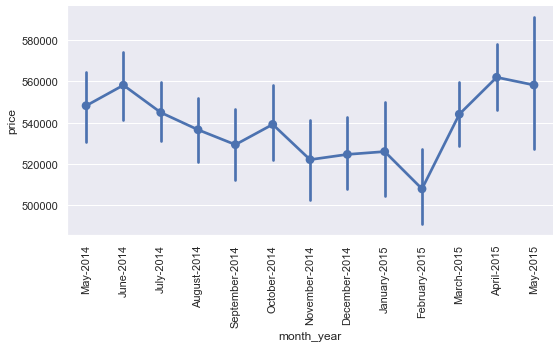

In [192]:
df_house['month_year'] = pd.to_datetime(df_house['month_year'], format='%B-%Y')

df_house.sort_values(["month_year"], axis=0, ascending=True, inplace=True) 

df_house["month_year"] = df_house["month_year"].dt.strftime('%B-%Y')

sns.factorplot(x='month_year',y='price',data=df_house, size=4, aspect=2)
plt.xticks(rotation=90)

df_house.groupby('month_year')['price'].agg(['mean','median','size'])

* Month_year in which house is sold and price is not influenced by it. 
* There are outliers and can be easily seen.
* The mean of the sale price of houses tend to be high during March,April & May compared to that of September, October, November,December period. 

**room_bed Vs Price**

mean    median  size
room_bed                              
1.0       3.189286e+05  299000.0   197
2.0       4.013572e+05  373500.0  2747
3.0       4.666820e+05  413682.5  9888
4.0       6.357284e+05  549950.0  6854
5.0       7.867329e+05  619000.0  1595
6.0       8.274895e+05  652500.0   270
7.0       9.514478e+05  728580.0    38
8.0       1.105077e+06  700000.0    13
9.0       8.939998e+05  817000.0     6
10.0      8.200000e+05  660000.0     3
11.0      5.200000e+05  520000.0     1
33.0      6.400000e+05  640000.0     1

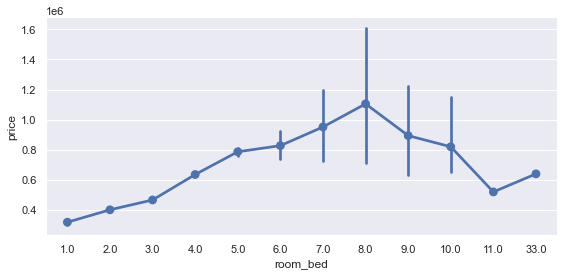

In [193]:
sns.factorplot(x='room_bed',y='price',data=df_house, size=4, aspect=2)

df_house.groupby('room_bed')['price'].agg(['mean','median','size'])

* From the above analysis,outliers can be seen easily. 
* Mean and median of price increases with number bedrooms per house upto a point and then drops
* we can observe a clear increasing trend in price with room_bed.

**room_bath Vs price**

mean   median  size
room_bath                             
0.00       4.490950e+05   317500    10
0.50       2.373750e+05   264000     4
0.75       2.945209e+05   273500    72
1.00       3.470889e+05   320000  3829
1.25       6.217722e+05   516500     9
1.50       4.091834e+05   370000  1439
1.75       4.549409e+05   422800  3031
2.00       4.575184e+05   422500  1917
2.25       5.325099e+05   470000  2147
2.50       5.536595e+05   499950  5358
2.75       6.605538e+05   605000  1178
3.00       7.087325e+05   600000   750
3.25       9.710299e+05   837352   588
3.50       9.329520e+05   823250   726
3.75       1.198179e+06  1070000   155
4.00       1.271616e+06  1060000   135
4.25       1.535072e+06  1390000    78
4.50       1.334211e+06  1060000   100
4.75       2.022300e+06  2300000    23
5.00       1.674167e+06  1430000    21
5.25       1.817962e+06  1420000    13
5.50       2.522500e+06  2340000    10
5.75       2.492500e+06  1930000     4
6.00       2.948333e+06  2895000     6
6.25       3.095000e+06  3095000     2
6.50       1.710000e+06  1710000     2
6.75       2.735000e+06  2735000     2
7.50       4.500000e+05   450000     1
7.75       6.890000e+06  6890000     1
8.00       4.990000e+06  4990000     2

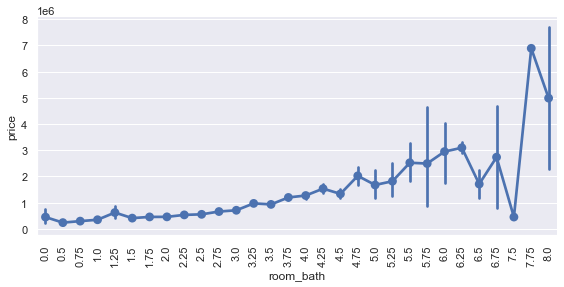

In [194]:
sns.factorplot(x='room_bath',y='price',data=df_house,size=4, aspect=2)
plt.xticks(rotation=90)
df_house.groupby('room_bath')['price'].agg(['mean','median','size'])

* Outliers can be seen easily.
* Overall mean and median price increares with increasing room_bath.
* There is an upward trend in price with increase in room_bath.

**living_measure Vs Price**

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      2079.727155
std        918.147155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

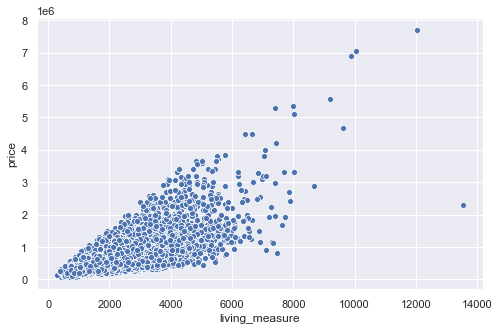

In [195]:
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['living_measure'],df_house['price']))
df_house['living_measure'].describe()

* Price increases with increase in living measure.
* There is clear increment in the price of the house with increment in the living measure
* We can observe that there is one outlier to this trend. This need to be taken care of.

**lot_measure Vs price**

AxesSubplot(0.125,0.125;0.775x0.755)


count    2.161300e+04
mean     1.509003e+04
std      4.138466e+04
min      5.200000e+02
25%      5.043000e+03
50%      7.618000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

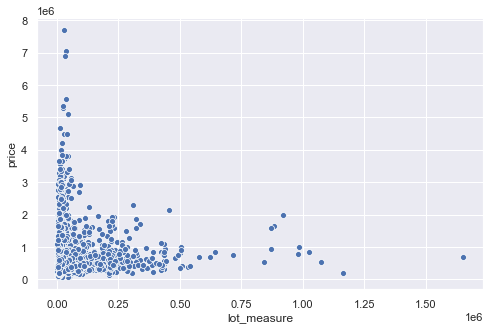

In [196]:
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['lot_measure'],df_house['price']))
df_house['lot_measure'].describe()

We can observe that, there is no relation between lot_measure and price.

AxesSubplot(0.125,0.125;0.775x0.755)


count    19717.000000
mean      7760.594817
std       4245.511393
min        520.000000
25%       5000.000000
50%       7260.000000
75%       9612.000000
max      24969.000000
Name: lot_measure, dtype: float64

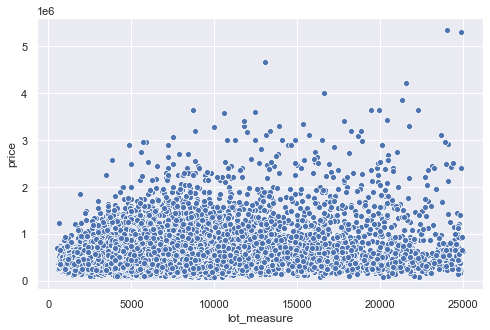

In [197]:
#data value range is very large. So, breaking it get better view.
#lot_measure <25000
plt.figure(figsize=(8,5))
x=df_house[df_house['lot_measure']<25000]
print(sns.scatterplot(x['lot_measure'],x['price']))
x['lot_measure'].describe()

* We can see that almost 95% of the houses have <25000 lot_measure. 
* But, there is no clear trend between lot_measure and price

AxesSubplot(0.125,0.125;0.775x0.755)


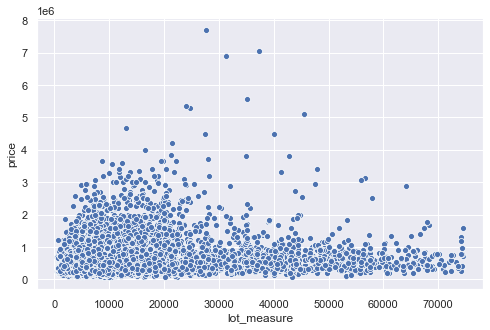

In [198]:
#lot_measure >100000
plt.figure(figsize=(8,5))
y=df_house[df_house['lot_measure']<=75000]
print(sns.scatterplot(y['lot_measure'],y['price']))

Price increases with increase in lot measure.

**ceil Vs price**

mean  median   size
ceil                             
1.0   4.420451e+05  390000  10647
1.5   5.590374e+05  521000   1977
2.0   6.491210e+05  543250   8210
2.5   1.061021e+06  799200    161
3.0   5.831248e+05  490500    610
3.5   9.339375e+05  534500      8

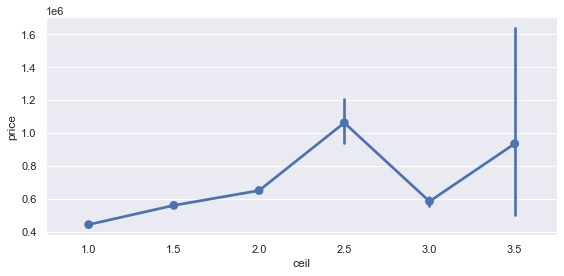

In [199]:
print(sns.factorplot(x='ceil',y='price',data=df_house, size = 4, aspect = 2))
#groupby
df_house.groupby('ceil')['price'].agg(['mean','median','size'])

* Median price increases initially and then falls.
* There is a slight upward trend in price with ceil

**coast Vs price,living_measure**

living_measure                 price              
              median         mean   median          mean
coast                                                   
0.0           1910.0  2071.571042   450000  5.317155e+05
1.0           2830.0  3166.465839  1410000  1.668301e+06

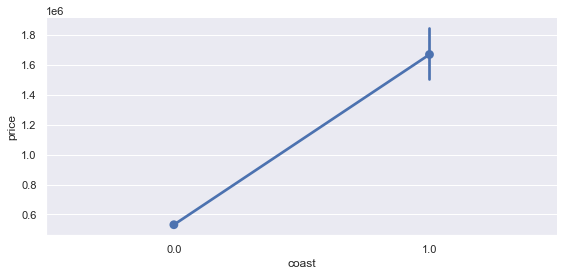

In [200]:
print(sns.factorplot(x='coast',y='price',data=df_house, size = 4, aspect = 2))
df_house.groupby('coast')['living_measure','price'].agg(['median','mean'])

* The mean and median of waterfront view is high. However, such houses would be very small compared to non-waterfront houses.
* living_measure mean and median is greater for the waterfront houses.
* The houses with water_front view are expected to have higher price compared to that of non-water_front view houses.

**sight vs price,living_measure**

price                 living_measure               
               mean   median   size           mean  median   size
sight                                                            
0.0    4.967417e+05   432500  19494    1997.843285  1850.0  19494
1.0    8.125186e+05   690944    332    2568.960843  2420.0    332
2.0    7.918609e+05   675000    959    2652.881126  2450.0    959
3.0    9.724684e+05   802500    510    3018.564706  2840.0    510
4.0    1.466554e+06  1190000    318    3354.433962  3070.0    318

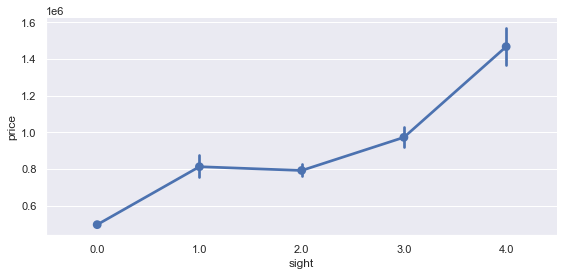

In [201]:
#sight - have outliers. The house sighted more have high price (mean and median) and have large living area as well.
print(sns.factorplot(x='sight',y='price',data=df_house, size = 4, aspect = 2))
df_house.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

* The feature sight is having outliers.
* The house that are viewed more have high price (mean and median) and having large living area.
* Houses with high price have are viewed more compared to that of houses with low price.

AxesSubplot(0.125,0.125;0.775x0.755)


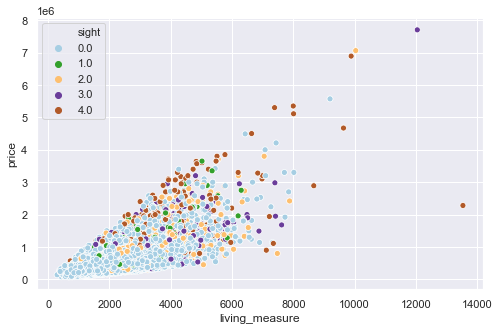

In [202]:
#in relation with price and living_measure
plt.figure(figsize=(8, 5))
print(sns.scatterplot(df_house['living_measure'],df_house['price'],hue=df_house['sight'],palette='Paired',legend='full'))

* Houses with high price with large living area are viewed more.
* Hence, Houses with higher price have more number of times viewed compared to that of houses with lower price.

**condition vs price,living_measure**

price                living_measure               
                    mean  median   size           mean  median   size
condition                                                            
1.0        334431.666667  262500     30    1216.000000  1000.0     30
2.0        326423.327485  279000    171    1414.152047  1330.0    171
3.0        542364.148048  451000  14063    2148.572780  1970.0  14063
4.0        520643.219275  440000   5655    1950.352255  1820.0   5655
5.0        612515.489965  525444   1694    2022.563164  1880.0   1694

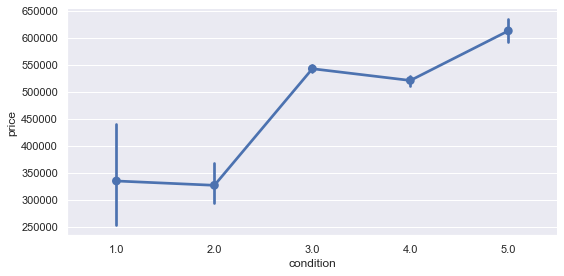

In [203]:
print(sns.factorplot(x='condition',y='price',data=df_house, size = 4, aspect = 2))
df_house.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

As the condition rating increases its price and living measure mean and median also increases.

**quality vs price,living_measure**

price                  living_measure              
                 mean     median  size           mean  median  size
quality                                                            
1.0      1.420000e+05   142000.0     1     290.000000   290.0     1
3.0      2.056667e+05   262000.0     3     596.666667   600.0     3
4.0      2.143810e+05   205000.0    29     660.482759   660.0    29
5.0      2.485240e+05   228700.0   242     983.326446   905.0   242
6.0      3.019166e+05   275276.5  2038    1192.096173  1120.0  2038
7.0      4.025850e+05   375000.0  8982    1689.795703  1630.0  8982
8.0      5.429310e+05   510000.0  6067    2184.126257  2150.0  6067
9.0      7.737382e+05   720000.0  2615    2866.572084  2820.0  2615
10.0     1.072347e+06   914327.0  1134    3520.299824  3450.0  1134
11.0     1.497792e+06  1280000.0   399    4395.448622  4260.0   399
12.0     2.192500e+06  1820000.0    90    5471.588889  4965.0    90
13.0     3.710769e+06  2980000.0    13    7483.076923  7100.0    13

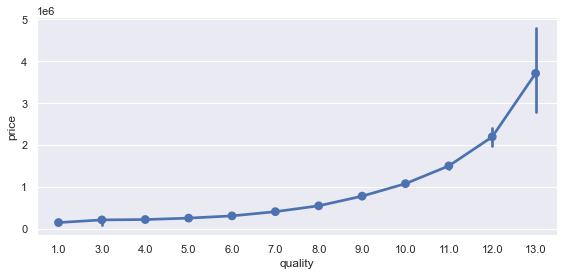

In [204]:
print(sns.factorplot(x='quality',y='price',data=df_house, size = 4, aspect = 2))
df_house.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

* As grade increases price and living_measure also increased (mean and median). 
* when viewed in relation with price and living_measure. Most houses are graded as 6 or more.

**Ceil_measure vs price**

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      1788.355989
std        828.084833
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

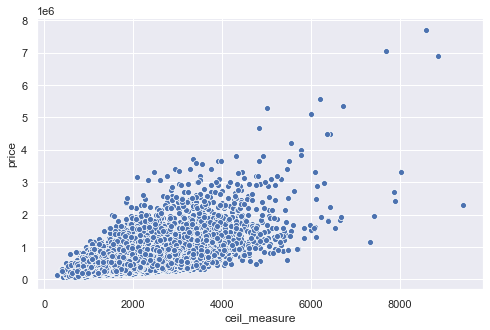

In [205]:
#price increases with increase in ceil measure
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['ceil_measure'],df_house['price']))
df_house['ceil_measure'].describe()

We can observe that, There is a upward trend in price with ceil_measure.

**basement vs price**

We will create the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.

In [206]:
#Binning Basement to analyse data
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df_house['has_basement'] = df_house['basement'].apply(create_basement_group)

price                living_measure               
                       mean  median   size           mean  median   size
has_basement                                                            
No            486945.394789  411500  13126    1928.891818  1740.0  13126
Yes           622518.174384  515000   8487    2313.009191  2100.0   8487

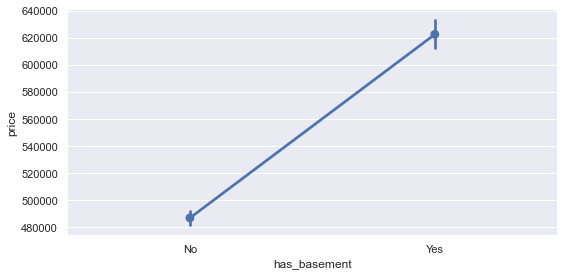

In [207]:
#after binning, we can see data shows with basement houses are costlier and have higher 
#living measure (mean & median)
print(sns.factorplot(x='has_basement',y='price',data=df_house, size = 4, aspect = 2))
df_house.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


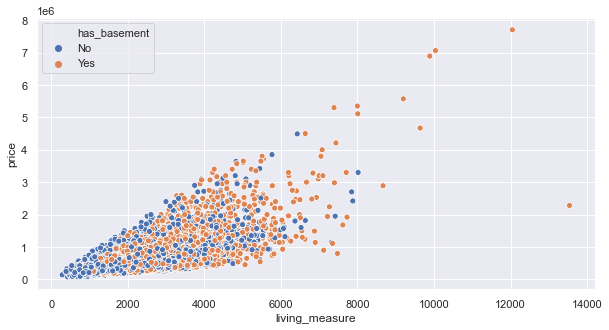

In [208]:
#basement - have higher price & living measure
plt.figure(figsize=(10, 5))
print(sns.scatterplot(df_house['living_measure'],df_house['price'],hue=df_house['has_basement']))

**yr_built**

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_built                               
1900.0    581536.632184  549000.0    87
1901.0    557108.344828  550000.0    29
1902.0    673192.592593  624000.0    27
1903.0    480958.195652  461000.0    46
1904.0    583867.755556  478000.0    45
1905.0    753443.932432  597500.0    74
1906.0    670027.663043  555000.0    92
1907.0    676324.476923  595000.0    65
1908.0    564499.848837  519475.0    86
1909.0    696448.989362  575500.0    94
1910.0    671671.835821  542500.0   134
1911.0    632584.246575  606000.0    73
1912.0    613193.227848  557510.0    79
1913.0    586066.271186  535000.0    59
1914.0    615246.074074  553300.0    54
1915.0    585036.921875  549500.0    64
1916.0    601041.620253  515000.0    79
1917.0    528126.785714  450000.0    56
1918.0    494383.403361  414950.0   119
1919.0    537887.556818  487900.0    88
1920.0    477761.030612  448500.0    98
1921.0    613224.210526  547500.0    76
1922.0    569794.147368  515000.0    95
1923.0    618653.773810  498376.0    84
1924.0    573528.248175  528000.0   137
1925.0    607316.606061  535000.0   165
1926.0    625443.377778  560000.0   180
1927.0    654154.208696  605000.0   115
1928.0    621920.198413  547500.0   126
1929.0    574396.842105  523475.0   114
1930.0    600659.311111  523500.0    90
1931.0    661781.147541  565000.0    61
1932.0    458488.421053  345750.0    38
1933.0    772483.333333  402500.0    30
1934.0    517152.380952  395000.0    21
1935.0    542229.791667  352500.0    24
1936.0    642335.000000  411500.0    40
1937.0    648791.544118  531500.0    68
1938.0    548884.903846  451000.0    52
1939.0    585718.405660  473000.0   106
1940.0    576255.070513  480225.0   156
1941.0    526657.043478  449000.0   161
1942.0    379312.919283  326100.0   223
1943.0    333347.000000  287450.0   170
1944.0    356322.078571  332750.0   140
1945.0    445380.744681  407750.0    94
1946.0    524711.952381  463500.0   126
1947.0    450121.186312  392500.0   263
1948.0    433355.646809  375000.0   235
1949.0    473352.625641  389000.0   195
1950.0    490592.864000  398500.0   250
1951.0    545169.021834  455000.0   229
1952.0    530500.986364  417500.0   220
1953.0    490823.058559  396000.0   222
1954.0    453709.495082  378000.0   305
1955.0    451462.985130  400000.0   269
1956.0    470342.409091  416550.0   198
1957.0    484821.075758  407500.0   198
1958.0    474179.459821  400000.0   224
1959.0    449222.604790  373000.0   334
1960.0    451701.068826  375000.0   247
1961.0    432230.928571  387250.0   224
1962.0    436771.403846  364250.0   312
1963.0    493211.683594  385000.0   256
1964.0    514325.808140  446500.0   172
1965.0    496542.652406  416500.0   187
1966.0    446796.388000  369000.0   250
1967.0    444060.888571  381750.0   350
1968.0    458030.879265  375000.0   381
1969.0    425526.450000  340250.0   280
1970.0    439935.393939  375000.0   132
1971.0    441974.576923  372000.0   104
1972.0    528653.255034  436000.0   149
1973.0    543057.351351  471050.0   148
1974.0    503944.425926  446250.0   162
1975.0    507325.507937  456000.0   189
1976.0    526411.687747  469000.0   253
1977.0    495485.239808  446000.0   417
1978.0    472326.498708  420000.0   387
1979.0    486019.096210  435000.0   343
1980.0    491795.962500  401100.0   240
1981.0    471219.477387  420000.0   199
1982.0    562068.952381  440000.0   105
1983.0    506169.554502  440000.0   211
1984.0    555777.938865  509900.0   229
1985.0    511859.666667  437725.0   228
1986.0    476989.069767  419500.0   215
1987.0    517932.126280  473000.0   293
1988.0    583930.400000  500000.0   270
1989.0    584015.179931  490000.0   289
1990.0    564875.181818  460000.0   319
1991.0    630630.647321  534150.0   224
1992.0    548205.924242  472500.0   198
1993.0    556760.455446  435000.0   202
1994.0    486864.040161  439000.0   249
1995.0    577933.757396  496000.0   169
1996.0    639673.528205  540000.0   195
1997.0    606173.887006  515000.0   177
1998.0    594280.14

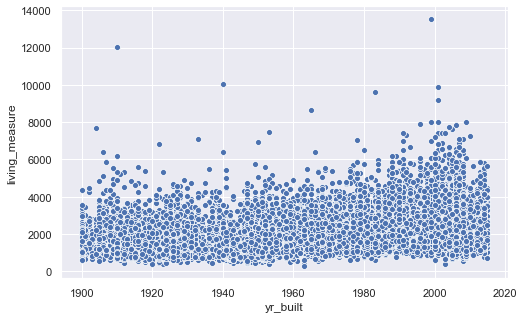

In [209]:
#outliers can be seen easily.
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['yr_built'],df_house['living_measure']))
df_house.groupby('yr_built')['price'].agg(['mean','median','size'])

We will create new variable: HouseLandRatio - This is proportion of living area in the total area of the house. We will explore the trend of price against this HouseLandRatio.

In [210]:
#computing new variable as ratio of living_measure/total_area
#refers to - Land used for construction of house
df_house["HouseLandRatio"]=np.round((df_house['living_measure']/df_house['total_area']),2)*100
df_house["HouseLandRatio"].head()

12235    16.0
14791    35.0
1742     17.0
17829    27.0
14810    17.0
Name: HouseLandRatio, dtype: float64

**yr_renovated**

AxesSubplot(0.125,0.125;0.775x0.755)


mean     median  size
yr_renovated                               
1934          4.599500e+05   459950.0     1
1940          3.784000e+05   378400.0     2
1944          5.210000e+05   521000.0     1
1945          3.986667e+05   375000.0     3
1946          3.511375e+05   351137.5     2
1948          4.100000e+05   410000.0     1
1950          2.914500e+05   291450.0     2
1951          2.760000e+05   276000.0     1
1953          2.458167e+05   247500.0     3
1954          9.000000e+05   900000.0     1
1955          4.421667e+05   399000.0     3
1956          9.306667e+05  1140000.0     3
1957          2.915333e+05   249900.0     3
1958          5.595760e+05   397380.0     5
1959          3.975000e+05   397500.0     1
1960          4.771750e+05   299350.0     4
1962          6.150000e+05   615000.0     2
1963          4.977125e+05   402500.0     4
1964          3.567200e+05   325000.0     5
1965          7.822000e+05   580000.0     5
1967          2.686000e+05   268600.0     2
1968          4.835125e+05   425000.0     8
1969          5.291250e+05   555750.0     4
1970          5.230444e+05   450000.0     9
1971          4.182775e+05   418277.5     2
1972          6.197500e+05   522000.0     4
1973          4.172000e+05   440000.0     5
1974          4.025000e+05   310000.0     3
1975          5.052500e+05   521750.0     6
1976          4.016667e+05   335000.0     3
1977          6.050438e+05   487000.0     8
1978          4.692500e+05   498500.0     6
1979          7.054900e+05   605450.0    10
1980          7.534545e+05   550000.0    11
1981          4.025106e+05   299950.0     5
1982          7.867927e+05   554820.0    11
1983          5.374778e+05   412500.0    18
1984          6.079444e+05   493000.0    18
1985          7.058176e+05   529000.0    17
1986          6.230582e+05   520000.0    17
1987          1.206778e+06   624000.0    18
1988          7.227600e+05   588000.0    15
1989          6.397886e+05   560000.0    22
1990          7.491200e+05   730000.0    25
1991          9.650450e+05   792500.0    20
1992          6.967941e+05   599000.0    17
1993          8.480032e+05   805000.0    19
1994          9.430265e+05   780000.0    19
1995          8.055231e+05   536475.0    16
1996          7.496633e+05   710000.0    15
1997          6.203960e+05   569950.0    15
1998          7.737316e+05   526000.0    19
1999          1.030706e+06   840000.0    17
2000          8.090843e+05   755000.0    35
2001          1.089489e+06   675000.0    19
2002          1.216498e+06   890000.0    22
2003          9.923056e+05   767500.0    36
2004          7.820769e+05   721250.0    26
2005          8.151957e+05   744000.0    35
2006          7.890396e+05   654050.0    24
2007          8.389221e+05   797000.0    35
2008          1.034499e+06   801500.0    18
2009          9.006824e+05   521000.0    22
2010          9.926694e+05   845000.0    18
2011          6.074962e+05   577000.0    13
2012          6.251818e+05   515000.0    11
2013          6.649608e+05   560000.0    37
2014          6.550301e+05   575000.0    91
2015          6.591562e+05   651000.0    16

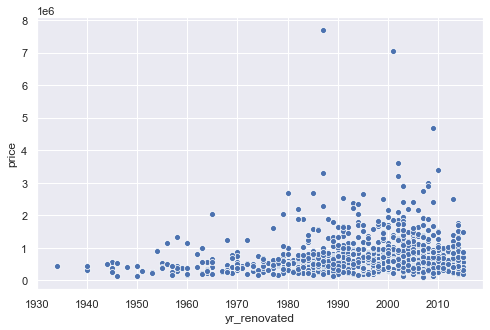

In [211]:
#yr_renovated - 
plt.figure(figsize=(8,5))
x=df_house[df_house['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

* Most houses are renovated after 1980's. 
* We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated.
* we will use this categorical variable for further analysis.

In [212]:
#Lets try to group yr_renovated
#Binning Basement to analyse data
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df_house['has_renovated'] = df_house['yr_renovated'].apply(create_renovated_group)

AxesSubplot(0.125,0.125;0.775x0.755)


price                HouseLandRatio              
                        mean  median   size           mean median   size
has_renovated                                                           
No             530447.958597  448000  20699      22.069424   20.0  20699
Yes            760628.777899  600000    914      22.271335   21.0    914

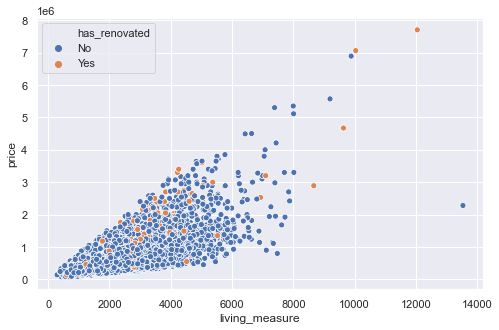

In [213]:
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['living_measure'],df_house['price'],hue=df_house['has_renovated']))
df_house.groupby(['has_renovated'])['price','HouseLandRatio'].agg(['mean','median','size'])

* has_renovated - renovated houses have higher mean and median, however it does not confirm if the prices of house renovated actually increased or not.
* HouseLandRatio - Renovated house utilized more land area for construction of house.
* Renovated properties have higher price than others with same living measure space.

AxesSubplot(0.125,0.125;0.775x0.755)


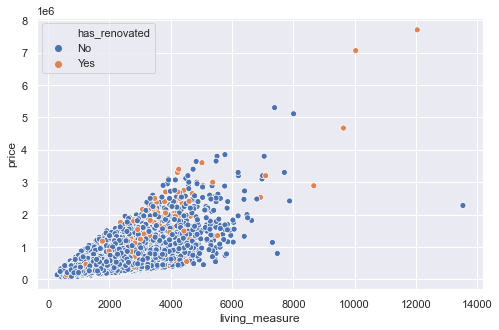

In [214]:
plt.figure(figsize=(8, 5))
x=df_house[df_house['yr_built']<2000]
print(sns.scatterplot(x['living_measure'],x['price'],hue=x['has_renovated']))

The variable 'has_renovated' have higher price and living measure.

**furnished**

AxesSubplot(0.125,0.125;0.775x0.755)


price                living_measure                 \
                    mean  median   size           mean  median   size   
furnished                                                               
0.0        437403.973628  401000  17367    1792.618184  1720.0  17367   
1.0        960565.753179  810000   4246    3254.060999  3110.0   4246   

          HouseLandRatio                
                    mean median   size  
furnished                               
0.0            21.506708   19.0  17367  
1.0            24.414508   24.0   4246

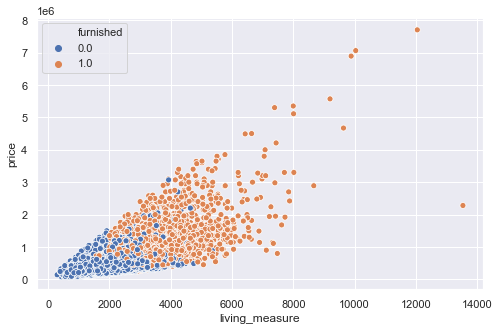

In [215]:
plt.figure(figsize=(8,5))
print(sns.scatterplot(df_house['living_measure'],df_house['price'],hue=df_house['furnished']))
#groupby
df_house.groupby('furnished')['price','living_measure','HouseLandRatio'].agg(['mean','median','size'])

* Furnished has higher price value and has greater living_measure.
* Furnished houses have higher price than that of the Non-furnished houses.

### Pairplot

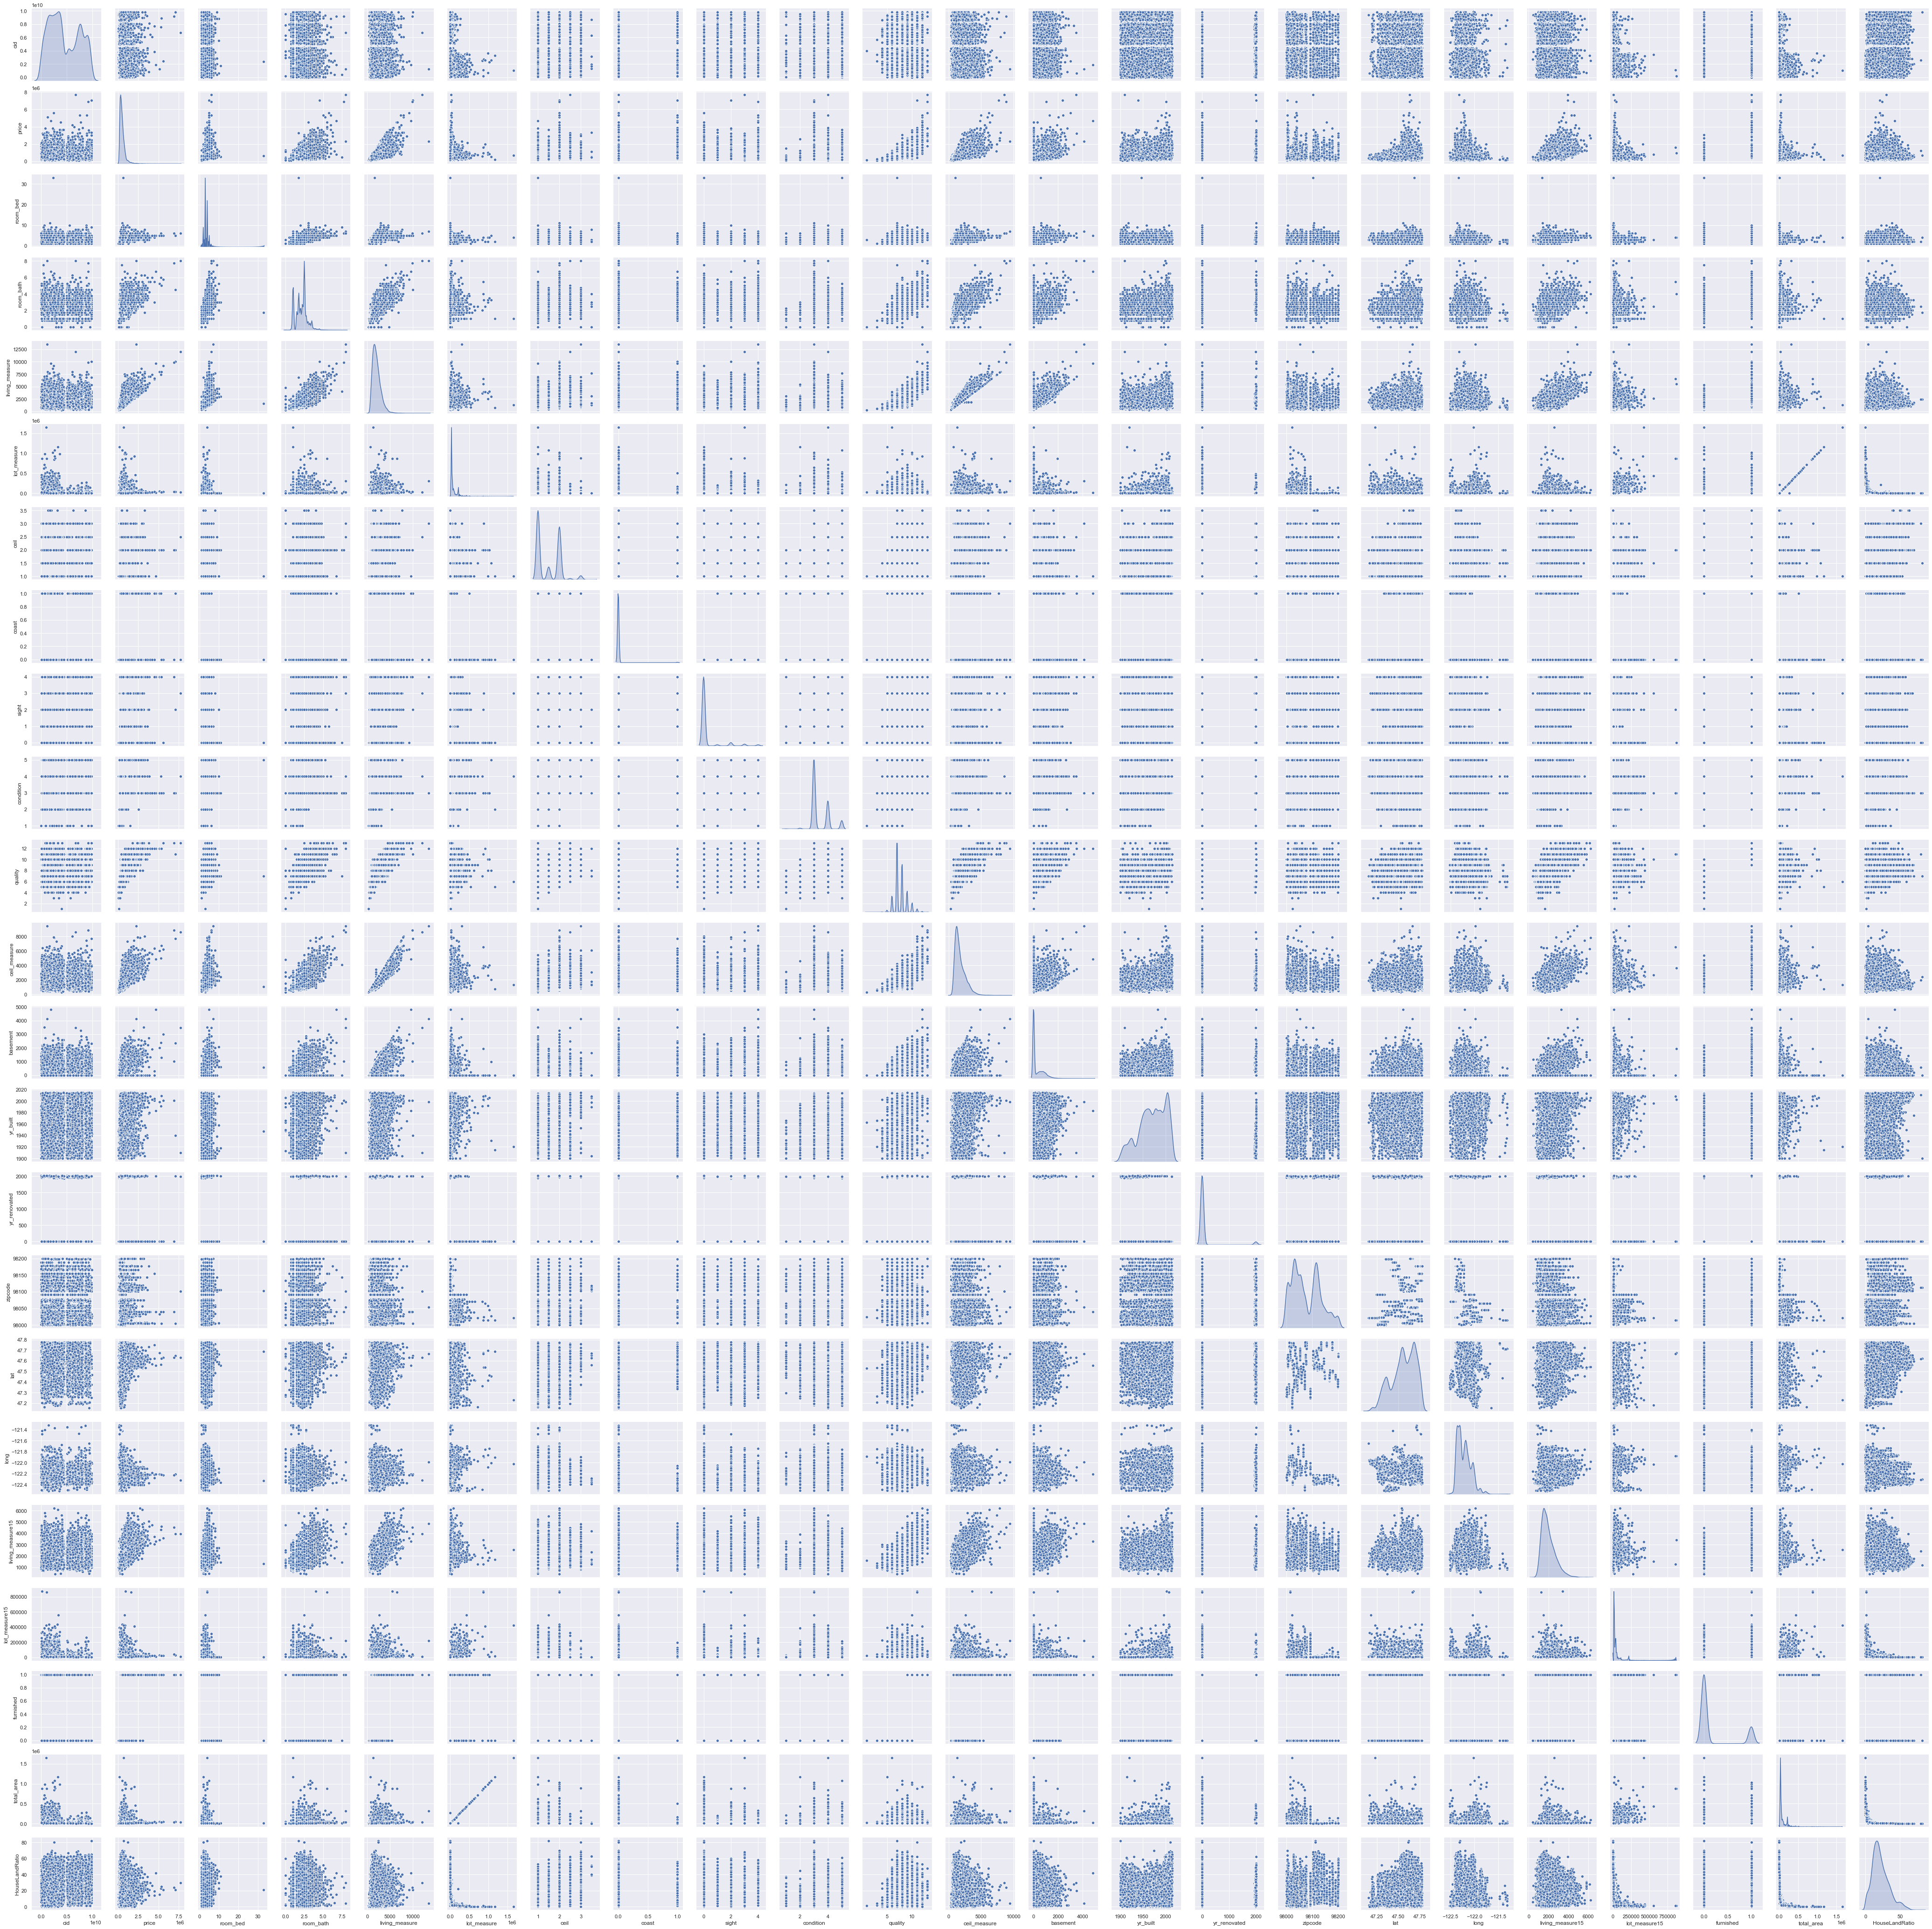

In [216]:
sns.pairplot(df_house, diag_kind = 'kde')
# plt.savefig("Pairplot")

**Observations from pairplot:**

* price: distribution for price is Right-Skewed as we observed earlier from data description.
* room_bed: the target variable (price) and room_bed plot is not linear. Its distribution has lot of gaussians.
* room_bath: The plot for room_bath with price has somewhat linear relationship. Distribution has number of gaussians.
* living_measure: The Plot against price has strong linear relationship. It also has linear relationship with room_bath variable. Distribution is Right-Skewed.
* lot_measure: No clear relationship with price. 
* ceil: No clear relationship with price. We can see that, it has 6 unique values. Therefore, we can convert this column into categorical column for values.
* coast: No clear relationship with price.  Clearly, it's categorical variable with 2 unique values.
* sight: No clear relationship with price. This has 5 unique values. This can be converted to Categorical variable.
* condition: No clear relationship with price. This has 5 unique values. This can be converted to Categorical variable.
* quality: Somewhat linear relationship with price. It has discrete values from 1 - 13. This is a Categorical variable.
* ceil_measure: Strong linear relationship with price. Also, with room_bath and living_measure features. Distribution is Right Skewed.
* basement: No clear relationship with price.
* yr_built: No clear relationship with price.
* yr_renovated: No clear relationship with price. It has 2 unique values. which tells whether the house is renovated or not.
* zipcode, lat, long: No clear relationship with price or any other feature.
* living_measure15: Somewhat linear relationship with target feature. It's same as living_measure.
* lot_measure15: No clear relationship with price or any other feature.
* furnished: No clear relationship with price or any other feature.
* total_area: No clear relationship with price. But it has Very Strong linear relationship with lot_measure.


In [217]:
# let's see corelatoin between the different features
house_corr = df_house.corr(method ='pearson')
house_corr

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001533   0.005768       -0.012151   
price            -0.016797  1.000000  0.308288   0.524509        0.702066   
room_bed          0.001533  0.308288  1.000000   0.513940        0.577253   
room_bath         0.005768  0.524509  0.513940   1.000000        0.753265   
living_measure   -0.012151  0.702066  0.577253   0.753265        1.000000   
lot_measure      -0.131789  0.089676  0.032560   0.087675        0.172728   
ceil              0.018683  0.256826  0.176616   0.497953        0.353502   
sight             0.011776  0.396999  0.078712   0.186137        0.284366   
ceil_measure     -0.010812  0.605594  0.478670   0.684131        0.876342   
basement         -0.005151  0.323837  0.301800   0.282696        0.434775   
zipcode          -0.008224 -0.053168 -0.153567  -0.203568       -0.199588   
lat              -0.001891  0.306919 -0.010132   0.024578        0.052722   
long              0.020885  0.021532  0.131071   0.222169        0.240062   
living_measure15 -0.003126  0.583825  0.391685   0.566262        0.753594   
lot_measure15    -0.138699  0.082597  0.030483   0.086769        0.183484   
total_area       -0.131638  0.104849  0.045029   0.103866        0.194168   
HouseLandRatio    0.112790  0.155778  0.087234   0.322582        0.132455   

                  lot_measure      ceil     sight  ceil_measure  basement  \
cid                 -0.131789  0.018683  0.011776     -0.010812 -0.005151   
price                0.089676  0.256826  0.396999      0.605594  0.323837   
room_bed             0.032560  0.176616  0.078712      0.478670  0.301800   
room_bath            0.087675  0.497953  0.186137      0.684131  0.282696   
living_measure       0.172728  0.353502  0.284366      0.876342  0.434775   
lot_measure          1.000000 -0.005368  0.074982      0.183413  0.015364   
ceil                -0.005368  1.000000  0.029612      0.523100 -0.244919   
sight                0.074982  0.029612  1.000000      0.167393  0.277243   
ceil_measure         0.183413  0.523100  0.167393      1.000000 -0.051916   
basement             0.015364 -0.244919  0.277243     -0.051916  1.000000   
zipcode             -0.129243 -0.058706  0.084386     -0.261155  0.074845   
lat                 -0.085940  0.049876  0.006001     -0.000770  0.110538   
long                 0.228884  0.125163 -0.078051      0.343535 -0.144547   
living_measure15     0.145003  0.277874  0.280910      0.729391  0.199378   
lot_measure15        0.716048 -0.010868  0.072979      0.194175  0.017514   
total_area           0.998169  0.002802  0.080998      0.202049  0.025003   
HouseLandRatio      -0.340407  0.546511  0.006500      0.094396  0.097298   

                   zipcode       lat      long  living_measure15  \
cid              -0.008224 -0.001891  0.020885         -0.003126   
price            -0.053168  0.306919  0.021532          0.583825   
room_bed         -0.153567 -0.010132  0.131071          0.391685   
room_bath        -0.203568  0.024578  0.222169          0.566262   
living_measure   -0.199588  0.052722  0.240062          0.753594   
lot_measure      -0.129243 -0.085940  0.228884          0.145003   
ceil             -0.058706  0.049876  0.125163          0.277874   
sight             0.084386  0.006001 -0.078051          0.280910   
ceil_measure     -0.261155 -0.000770  0.343535          0.729391   
basement          0.074845  0.110538 -0.144547          0.199378   
zipcode           1.000000  0.267048 -0.563556         -0.278340   
lat               0.267048  1.000000 -0.135368          0.048456   
long             -0.563556 -0.135368  1.000000          0.332340   
living_measure15 -0.278340  0.048456  0.332340          1.000000   
lot_measure15    -0.147423 -0.085857  0.254495          0.184007   
total_area       -0.133481 -0.083680  0.233734          0.161138   
HouseLandRatio    0.183230  0.174428 -0.221560         -0.006854   

                  lot_me

We have linear relationships in below featues from above correlation matrix

1. price: room_bath, living_measure, quality, living_measure15, furnished
2. living_measure: price, room_bath. Hence, we can consider dropping 'room_bath' variable. Or can be used in the analysis
3. quality: price, room_bath, living_measure
4. ceil_measure: price, room_bath, living_measure, quality
5. living_measure15: price, living_measure, quality. 
6. lot_measure15: lot_measure. 
7. furnished: quality
8. total_area: lot_measure, lot_measure15.

<AxesSubplot:>

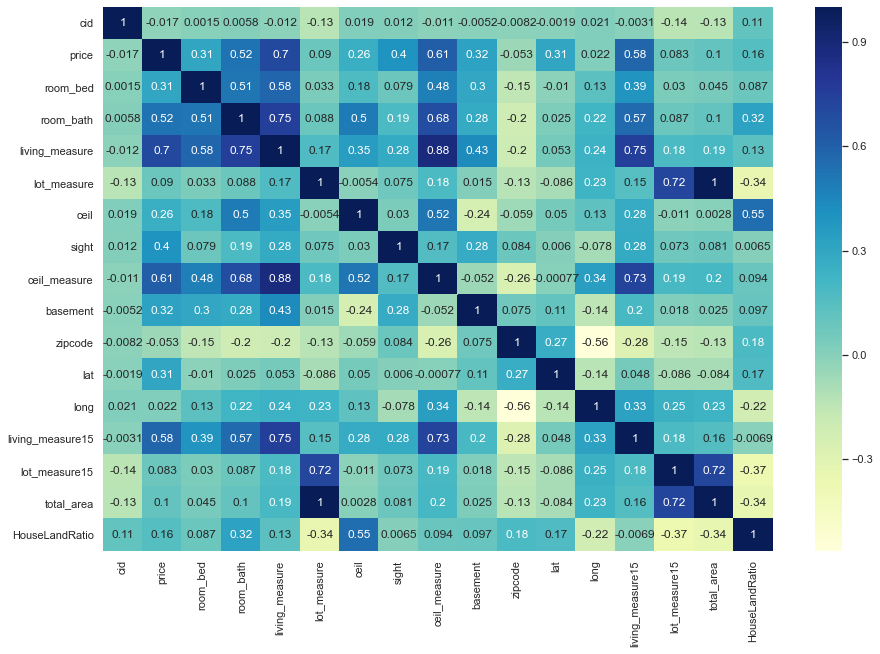

In [218]:
plt.subplots(figsize =(15, 10)) 
sns.heatmap(house_corr,cmap="YlGnBu",annot=True)

### Data Preprocessing

**Outlier Treatment**

**I have analysed all the columns with outliers while performing the Exploratory data Analysis. As per my analysis, few columns have greater number of outliers. Almost 11% of the records in the dataset having the outliers. Let us now treat these outliers for further analysis**

In [219]:
#let's see the feature/columns and drop the unneccessary features
df_house.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'month_year', 'has_basement', 'HouseLandRatio',
       'has_renovated'],
      dtype='object')

As we already have this information in other features. We will drop the unwanted columns from new copied dataframe instance.

In [220]:
#Let's create another dataframe for modeling
df_model=df_house.copy()

In [221]:
#let's check the new copy of dataframe by printing first few records
df_model.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
12235  1425059178 2014-05-07  460000       3.0       2.00          1760.0   
14791  7942601475 2014-05-20  345600       5.0       3.50          2800.0   
1742   5652600185 2014-05-02  750000       3.0       1.75          2240.0   
17829  3529200190 2014-05-14  325000       3.0       2.50          2220.0   
14810  5631500992 2014-05-15  390000       3.0       2.50          2240.0   

       lot_measure  ceil coast  sight condition quality  ceil_measure  \
12235       9055.0   2.0   0.0    0.0       4.0     7.0        1760.0   
14791       5120.0   2.5   0.0    0.0       3.0     9.0        2800.0   
1742       10578.0   2.0   0.0    0.0       5.0     8.0        1550.0   
17829       6049.0   2.0   0.0    0.0       4.0     8.0        2220.0   
14810      10800.0   2.0   0.0    0.0       3.0     8.0        2240.0   

       basement yr_built yr_renovated  zipcode      lat     long  \
12235       0.0   1985.0            0    98052  47.6534 -122.128   
14791       0.0   1903.0         2005    98122  47.6059 -122.310   
1742      690.0   1923.0            0    98115  47.6954 -122.292   
17829       0.0   1990.0            0    98031  47.3972 -122.182   
14810       0.0   1996.0            0    98028  47.7433 -122.229   

       living_measure15  lot_measure15 furnished  total_area month_year  \
12235            2010.0         9383.0       0.0     10815.0   May-2014   
14791            1780.0         5120.0       1.0      7920.0   May-2014   
1742             1570.0        10578.0       0.0     12818.0   May-2014   
17829            1980.0         7226.0       0.0      8269.0   May-2014   
14810            1900.0         9900.0       0.0     13040.0   May-2014   

      has_basement  HouseLandRatio has_renovated  
12235           No            16.0            No  
14791           No            35.0           Yes  
1742           Yes            17.0            No  
17829           No            27.0            No  
14810           No            17.0            No

The instance of new dataframe for model created.

In [222]:
df_model.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'month_year', 'has_basement', 'HouseLandRatio',
       'has_renovated'],
      dtype='object')

In [223]:
#Dropping the feature not required
df_final=df_model.drop(['cid','dayhours'],axis=1)

In [224]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 12235 to 6682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21613 non-null  float64
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  float64
 4   lot_measure       21613 non-null  float64
 5   ceil              21613 non-null  float64
 6   coast             21613 non-null  object 
 7   sight             21613 non-null  float64
 8   condition         21613 non-null  object 
 9   quality           21613 non-null  object 
 10  ceil_measure      21613 non-null  float64
 11  basement          21613 non-null  float64
 12  yr_built          21613 non-null  object 
 13  yr_renovated      21613 non-null  object 
 14  zipcode           21613 non-null  int64  
 15  lat               21613 non-null  float64
 16  long              21613 non-null  flo

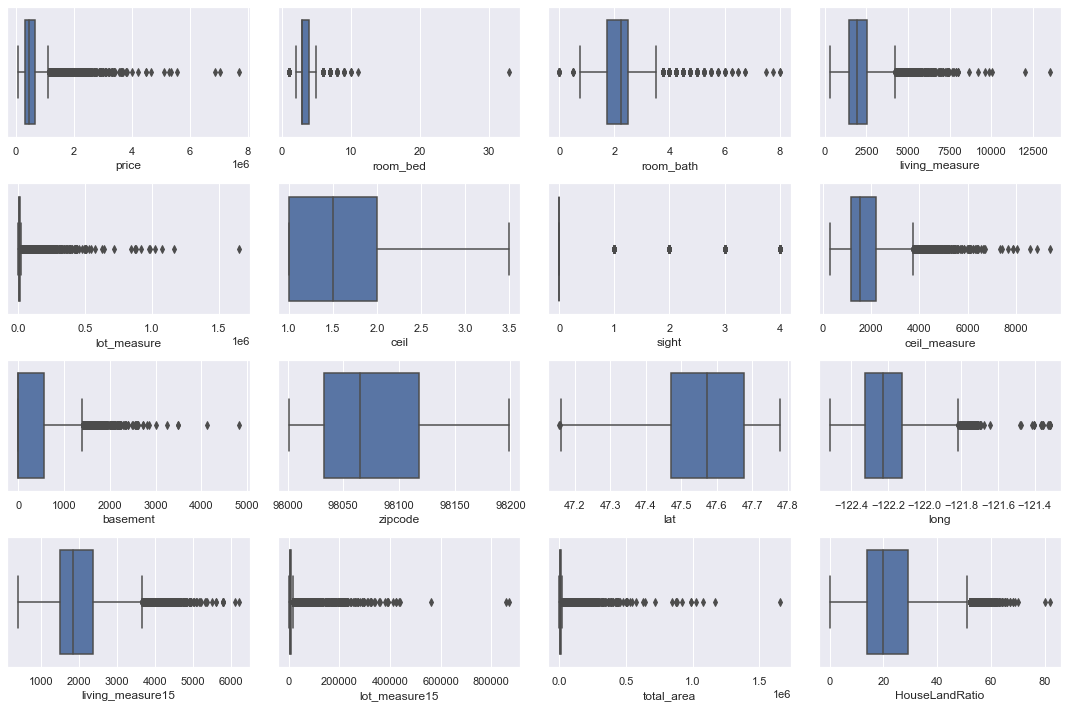

In [225]:
#Lets check for outliers in the data using boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(df_final.select_dtypes(exclude='object')):
    plt.subplot(4,4, i+1)
    sns.boxplot(data=df_final, x=col)
    plt.tight_layout()

In [226]:
q1 = df_final.quantile(0.25)
q3 = df_final.quantile(0.75)

IQR= q3-q1

LL = q1-1.5*IQR
UL = q3+1.5*IQR

In [227]:
print('The total number of outliers present in the data are',((df_final > UL) | (df_final < LL)).sum().sum())

The total number of outliers present in the data are 14533


#### Treating Outliers

In [228]:
def outliers_treatment(col):
    q1,q3 = df_final[col].quantile([0.25,0.75])
    IQR   = q3 - q1
    
    LL    = q1 - 1.5*IQR
    UL    = q3 + 1.5*IQR
    
    return df_final[col].apply(lambda x: LL if x<LL else x).apply(lambda x: UL if x>UL else x)

In [229]:
for i in df_final.select_dtypes(exclude='object').columns:
    df_final[i] = outliers_treatment(i)

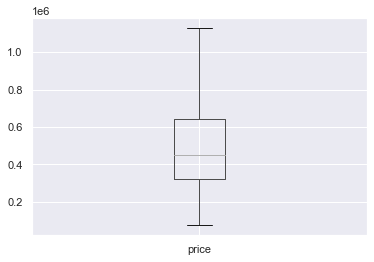

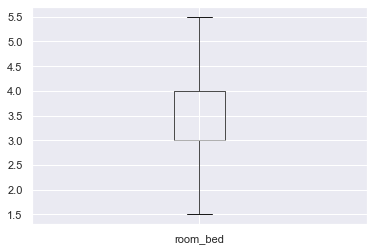

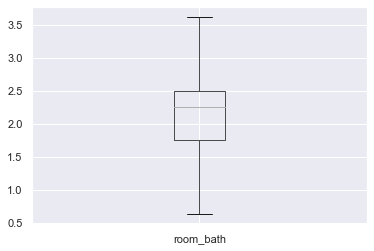

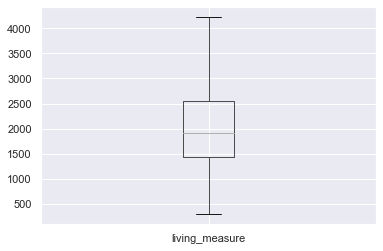

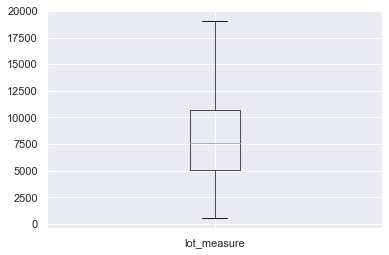

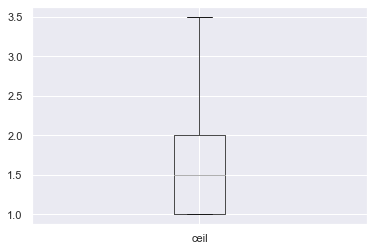

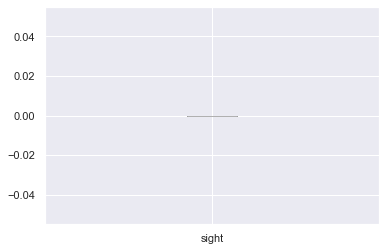

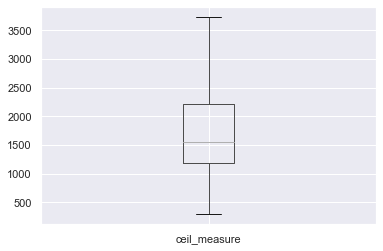

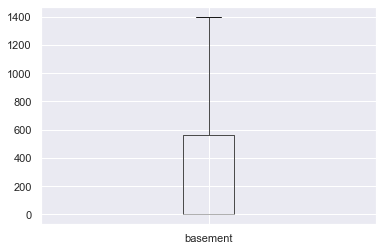

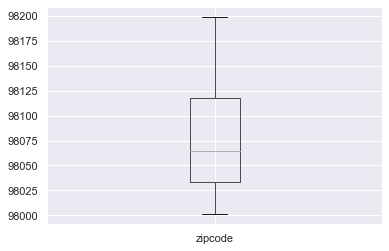

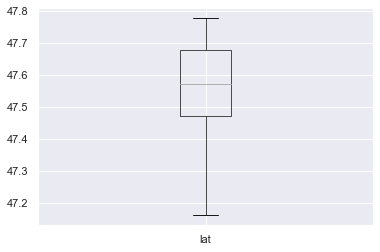

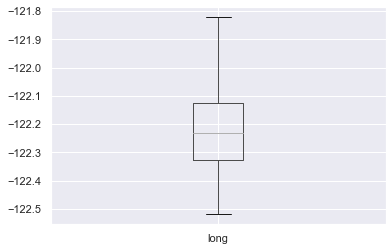

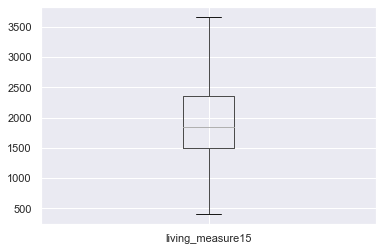

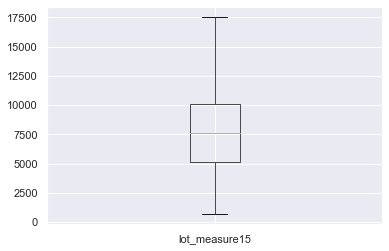

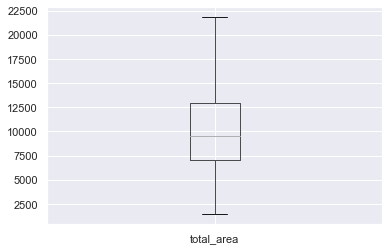

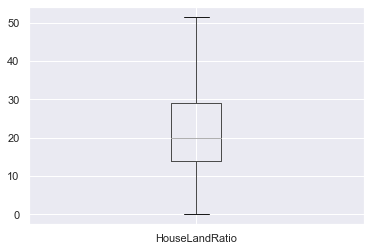

In [230]:
import matplotlib.pyplot as plt

for i in df_final.select_dtypes(exclude='object').columns:
    plt.figure()
    df_final.boxplot([i])

Now the outliers in the data are treated.

In [231]:
#let's see the feature/columns and drop the unneccessary features
df_final.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'month_year', 'has_basement', 'HouseLandRatio', 'has_renovated'],
      dtype='object')

As we already have this information in other features. We will drop the unwanted columns from new copied dataframe instance

In [232]:
df_final = df_final.drop(['yr_renovated','zipcode','lat','long'],axis=1)

In [233]:
df_final.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'month_year', 'has_basement',
       'HouseLandRatio', 'has_renovated'],
      dtype='object')

**Creating dummies for categorical variables:**

**'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 'has_basement', 'has_renovated'**

In [234]:
# Getting dummies for columns ceil, coast, sight, condition, quality, yr_renovated, furnished
model_df = pd.get_dummies(df_final, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement', 'has_renovated'],drop_first=True)


In [235]:
model_df.shape

(21613, 53)

In [236]:
model_df.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'month_year', 'HouseLandRatio', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_4.0', 'room_bed_5.0', 'room_bed_5.5', 'room_bath_0.75',
       'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75',
       'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75',
       'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.625',
       'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1.0',
       'condition_2.0', 'condition_3.0', 'condition_4.0', 'condition_5.0',
       'quality_3.0', 'quality_4.0', 'quality_5.0', 'quality_6.0',
       'quality_7.0', 'quality_8.0', 'quality_9.0', 'quality_10.0',
       'quality_11.0', 'quality_12.0', 'quality_13.0', 'furnished_1.0',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object')

In [237]:
model_df.head()

price  living_measure  lot_measure  ceil_measure  basement yr_built  \
12235  460000.0          1760.0       9055.0        1760.0       0.0   1985.0   
14791  345600.0          2800.0       5120.0        2800.0       0.0   1903.0   
1742   750000.0          2240.0      10578.0        1550.0     690.0   1923.0   
17829  325000.0          2220.0       6049.0        2220.0       0.0   1990.0   
14810  390000.0          2240.0      10800.0        2240.0       0.0   1996.0   

       living_measure15  lot_measure15  total_area month_year  HouseLandRatio  \
12235            2010.0         9383.0     10815.0   May-2014            16.0   
14791            1780.0         5120.0      7920.0   May-2014            35.0   
1742             1570.0        10578.0     12818.0   May-2014            17.0   
17829            1980.0         7226.0      8269.0   May-2014            27.0   
14810            1900.0         9900.0     13040.0   May-2014            17.0   

       room_bed_2.0  room_bed_3.0  room_bed_4.0  room_bed_5.0  room_bed_5.5  \
12235             0             1             0             0             0   
14791             0             0             0             1             0   
1742              0             1             0             0             0   
17829             0             1             0             0             0   
14810             0             1             0             0             0   

       room_bath_0.75  room_bath_1.0  room_bath_1.25  room_bath_1.5  \
12235               0              0               0              0   
14791               0              0               0              0   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_1.75  room_bath_2.0  room_bath_2.25  room_bath_2.5  \
12235               0              1               0              0   
14791               0              0               0              0   
1742                1              0               0              0   
17829               0              0               0              1   
14810               0              0               0              1   

       room_bath_2.75  room_bath_3.0  room_bath_3.25  room_bath_3.5  \
12235               0              0               0              0   
14791               0              0               0              1   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_3.625  ceil_1.5  ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  \
12235                0         0         1         0         0         0   
14791                0         0         0         1         0         0   
1742                 0         0         1         0         0         0   
17829                0         0         1         0         0         0   
14810                0         0         1         0         0         0   

       coast_1.0  condition_2.0  condition_3.0  condition_4.0  condition_5.0  \
12235          0              0              0              1              0   
14791          0              0              1              0              0   
1742           0              0              0              0              1   
17829          0              0              0              1              0   
14810          0              0              1              0              0   

       quality_3.0  quality_4.0  quality_5.0  quality_6.0  quality_7.0  \
12235            0            0            0            0            1   
14791            0            0            0            0            0   
1742             0            0            0            0            0   
17829            0            0            0  

In [238]:
#let's drop the month_year column as we already analyzed it
model_df=model_df.drop(['month_year'],axis=1)

In [239]:
model_df.columns.tolist()

['price',
 'living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'yr_built',
 'living_measure15',
 'lot_measure15',
 'total_area',
 'HouseLandRatio',
 'room_bed_2.0',
 'room_bed_3.0',
 'room_bed_4.0',
 'room_bed_5.0',
 'room_bed_5.5',
 'room_bath_0.75',
 'room_bath_1.0',
 'room_bath_1.25',
 'room_bath_1.5',
 'room_bath_1.75',
 'room_bath_2.0',
 'room_bath_2.25',
 'room_bath_2.5',
 'room_bath_2.75',
 'room_bath_3.0',
 'room_bath_3.25',
 'room_bath_3.5',
 'room_bath_3.625',
 'ceil_1.5',
 'ceil_2.0',
 'ceil_2.5',
 'ceil_3.0',
 'ceil_3.5',
 'coast_1.0',
 'condition_2.0',
 'condition_3.0',
 'condition_4.0',
 'condition_5.0',
 'quality_3.0',
 'quality_4.0',
 'quality_5.0',
 'quality_6.0',
 'quality_7.0',
 'quality_8.0',
 'quality_9.0',
 'quality_10.0',
 'quality_11.0',
 'quality_12.0',
 'quality_13.0',
 'furnished_1.0',
 'has_basement_Yes',
 'has_renovated_Yes']

In [240]:
model_df.shape

(21613, 52)

#### Now the features are ready to build the model.

In [241]:
model_df.head()

price  living_measure  lot_measure  ceil_measure  basement yr_built  \
12235  460000.0          1760.0       9055.0        1760.0       0.0   1985.0   
14791  345600.0          2800.0       5120.0        2800.0       0.0   1903.0   
1742   750000.0          2240.0      10578.0        1550.0     690.0   1923.0   
17829  325000.0          2220.0       6049.0        2220.0       0.0   1990.0   
14810  390000.0          2240.0      10800.0        2240.0       0.0   1996.0   

       living_measure15  lot_measure15  total_area  HouseLandRatio  \
12235            2010.0         9383.0     10815.0            16.0   
14791            1780.0         5120.0      7920.0            35.0   
1742             1570.0        10578.0     12818.0            17.0   
17829            1980.0         7226.0      8269.0            27.0   
14810            1900.0         9900.0     13040.0            17.0   

       room_bed_2.0  room_bed_3.0  room_bed_4.0  room_bed_5.0  room_bed_5.5  \
12235             0             1             0             0             0   
14791             0             0             0             1             0   
1742              0             1             0             0             0   
17829             0             1             0             0             0   
14810             0             1             0             0             0   

       room_bath_0.75  room_bath_1.0  room_bath_1.25  room_bath_1.5  \
12235               0              0               0              0   
14791               0              0               0              0   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_1.75  room_bath_2.0  room_bath_2.25  room_bath_2.5  \
12235               0              1               0              0   
14791               0              0               0              0   
1742                1              0               0              0   
17829               0              0               0              1   
14810               0              0               0              1   

       room_bath_2.75  room_bath_3.0  room_bath_3.25  room_bath_3.5  \
12235               0              0               0              0   
14791               0              0               0              1   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_3.625  ceil_1.5  ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  \
12235                0         0         1         0         0         0   
14791                0         0         0         1         0         0   
1742                 0         0         1         0         0         0   
17829                0         0         1         0         0         0   
14810                0         0         1         0         0         0   

       coast_1.0  condition_2.0  condition_3.0  condition_4.0  condition_5.0  \
12235          0              0              0              1              0   
14791          0              0              1              0              0   
1742           0              0              0              0              1   
17829          0              0              0              1              0   
14810          0              0              1              0              0   

       quality_3.0  quality_4.0  quality_5.0  quality_6.0  quality_7.0  \
12235            0            0            0            0            1   
14791            0            0            0            0            0   
1742             0            0            0            0            0   
17829            0            0            0            0            0   
14810            0            0       

In [242]:
#Creating X, y for training and testing set
X = model_df.drop("price" , axis=1)
y = model_df["price"]

### Train - Test Split

Let's split the data into 80:20 proportion for Model building.

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [244]:
print(X_train.shape)
print(X_test.shape)

(17290, 51)
(4323, 51)


In [245]:
print(y_train.shape)
print(y_test.shape)

(17290,)
(4323,)


### 1. Model building and interpretation.

**a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)** 

**b. Test your predictive model against the test set using various appropriate performance metrics**

**c.Interpretation of the model(s)**


### 2. Model Tuning

**a.Ensemble modelling, wherever applicable**

**b. Any other model tuning measures(if applicable)**

**c. Interpretation of the most optimum model and its implication on the business**

In [246]:
model_df.head()

price  living_measure  lot_measure  ceil_measure  basement yr_built  \
12235  460000.0          1760.0       9055.0        1760.0       0.0   1985.0   
14791  345600.0          2800.0       5120.0        2800.0       0.0   1903.0   
1742   750000.0          2240.0      10578.0        1550.0     690.0   1923.0   
17829  325000.0          2220.0       6049.0        2220.0       0.0   1990.0   
14810  390000.0          2240.0      10800.0        2240.0       0.0   1996.0   

       living_measure15  lot_measure15  total_area  HouseLandRatio  \
12235            2010.0         9383.0     10815.0            16.0   
14791            1780.0         5120.0      7920.0            35.0   
1742             1570.0        10578.0     12818.0            17.0   
17829            1980.0         7226.0      8269.0            27.0   
14810            1900.0         9900.0     13040.0            17.0   

       room_bed_2.0  room_bed_3.0  room_bed_4.0  room_bed_5.0  room_bed_5.5  \
12235             0             1             0             0             0   
14791             0             0             0             1             0   
1742              0             1             0             0             0   
17829             0             1             0             0             0   
14810             0             1             0             0             0   

       room_bath_0.75  room_bath_1.0  room_bath_1.25  room_bath_1.5  \
12235               0              0               0              0   
14791               0              0               0              0   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_1.75  room_bath_2.0  room_bath_2.25  room_bath_2.5  \
12235               0              1               0              0   
14791               0              0               0              0   
1742                1              0               0              0   
17829               0              0               0              1   
14810               0              0               0              1   

       room_bath_2.75  room_bath_3.0  room_bath_3.25  room_bath_3.5  \
12235               0              0               0              0   
14791               0              0               0              1   
1742                0              0               0              0   
17829               0              0               0              0   
14810               0              0               0              0   

       room_bath_3.625  ceil_1.5  ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  \
12235                0         0         1         0         0         0   
14791                0         0         0         1         0         0   
1742                 0         0         1         0         0         0   
17829                0         0         1         0         0         0   
14810                0         0         1         0         0         0   

       coast_1.0  condition_2.0  condition_3.0  condition_4.0  condition_5.0  \
12235          0              0              0              1              0   
14791          0              0              1              0              0   
1742           0              0              0              0              1   
17829          0              0              0              1              0   
14810          0              0              1              0              0   

       quality_3.0  quality_4.0  quality_5.0  quality_6.0  quality_7.0  \
12235            0            0            0            0            1   
14791            0            0            0            0            0   
1742             0            0            0            0            0   
17829            0            0            0            0            0   
14810            0            0       

## Model building

**Let's build the model and see their performance**

### Linear Regression 

In [247]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [248]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [249]:
#predicting result over train data
y_LR_pred_train= Linear_Regression.predict(X_train)
y_LR_pred_train

array([542288.30345821, 755257.80487591, 571457.63947339, ...,
       752010.05287675, 493011.05425706, 460568.65174059])

In [250]:
#predicting result over test data
y_LR_pred_test= Linear_Regression.predict(X_test)
y_LR_pred_test

array([ 305473.08141389, 1058113.72169306,  368581.56697297, ...,
        420691.73853596,  522527.19628488,  290772.83722322])

In [251]:
Linear_Regression.coef_

array([ 1.29341445e+02, -3.33854525e+00, -5.53004212e+01, -7.25592808e+01,
       -2.56844286e+03,  7.04802899e+01, -2.29913972e+00,  5.89327924e+00,
        2.85100829e+03,  9.39991518e+03, -1.89215327e+04, -3.44559151e+04,
       -4.21843550e+04, -5.90330848e+04,  2.46145356e+04,  2.17576638e+04,
        1.19878838e+05,  1.87714807e+04,  2.91557988e+04,  2.95326142e+04,
        3.99138587e+04,  2.52829198e+04,  5.36208254e+04,  6.08484424e+04,
        8.40228456e+04,  9.31269413e+04,  1.22899174e+05,  1.11526819e+04,
       -8.66901102e+02, -4.76788303e+03,  5.99072425e+04,  9.87514733e+04,
        1.76858074e+05,  1.65131513e+03,  3.57286987e+04,  5.60600730e+04,
        8.82672416e+04, -1.87279361e+05, -2.46930850e+05, -2.48839663e+05,
       -2.03763069e+05, -1.18151190e+05, -2.66849955e+04,  8.13991997e+04,
        1.74678967e+05,  2.47568576e+05,  2.73369774e+05,  2.54632612e+05,
        2.13824449e+04,  2.66297813e+04,  3.37757675e+04])

In [252]:
#Model score 
LR_train_score=r2_score(y_train,y_LR_pred_train)
LR_train_RMSE=np.sqrt(mean_squared_error(y_train, y_LR_pred_train))
LR_train_MSE=mean_squared_error(y_train, y_LR_pred_train)
LR_train_MAE=mean_absolute_error(y_train, y_LR_pred_train)

LR_test_score=r2_score(y_test,y_LR_pred_test)
LR_test_RMSE=np.sqrt(mean_squared_error(y_test, y_LR_pred_test))
LR_test_MSE=mean_squared_error(y_test, y_LR_pred_test)
LR_test_MAE=mean_absolute_error(y_test, y_LR_pred_test)

In [253]:
Comparison_df=pd.DataFrame({'Method':['Linear Regression Model'],
                            'Test Score':LR_test_score,
                            'RMSE_test': LR_test_RMSE,
                            'MSE_test': LR_test_MSE, 
                            'MAE_test': LR_test_MAE,
                            'Train Score':LR_train_score,
                            'RMSE_train': LR_train_RMSE,
                            'MSE_train': LR_train_MSE,
                            'MAE_train': LR_test_MAE})
Comparison_df

Method  Test Score      RMSE_test      MSE_test  \
0  Linear Regression Model    0.703668  135222.127869  1.828502e+10   

        MAE_test  Train Score     RMSE_train     MSE_train      MAE_train  
0  105017.960441     0.682771  141050.005422  1.989510e+10  105017.960441

The linear regression model performed with scores 0.68 & 0.70 in Train data set and Test data set respectively.

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit.

**The Mean Squared Error (MSE)** is a measure of how close a fitted line is to data points. For every data point, we take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. MSE is the average of the square of the errors. The larger the number the larger the error.

**MAE** is the Mean of Absolute value of Errors. Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable. 

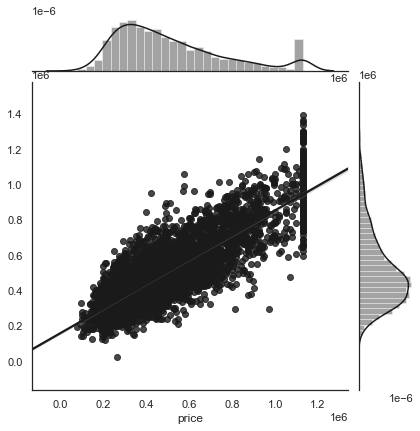

In [254]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_LR_pred_test, kind="reg", color="k")

### Ridge Model

In [255]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [256]:
#predicting result over train data
y_Ridge_pred_train= Ridge.predict(X_train)
y_Ridge_pred_train

array([542647.68125722, 755429.76763627, 571522.56924859, ...,
       752692.22106105, 492871.6852502 , 460670.72986476])

In [257]:
#predicting result over test data
y_Ridge_pred_test= Ridge.predict(X_test)
y_Ridge_pred_test

array([ 305345.24492885, 1057534.5673559 ,  368306.91460648, ...,
        420623.44933181,  522684.09893132,  290891.21424036])

In [258]:
Ridge.coef_

array([ 1.29165356e+02, -2.96024278e+00, -5.45752858e+01, -7.19496137e+01,
       -2.56676899e+03,  7.04872210e+01, -2.30087986e+00,  5.54670284e+00,
        2.86773801e+03,  1.07313213e+04, -1.75668486e+04, -3.30819509e+04,
       -4.08689096e+04, -5.76783809e+04,  6.02133455e+03,  3.95779834e+03,
        9.47383384e+04,  8.99244583e+02,  1.12671782e+04,  1.16137832e+04,
        2.20525466e+04,  7.28644935e+03,  3.55677721e+04,  4.28969834e+04,
        6.59038950e+04,  7.49784196e+04,  1.05036686e+05,  1.11088232e+04,
       -9.43738186e+02, -4.77129227e+03,  5.96727996e+04,  8.98749436e+04,
        1.76344474e+05, -1.68772301e+03,  3.26954488e+04,  5.30401102e+04,
        8.52007018e+04, -1.35707238e+05, -2.02365634e+05, -2.09524899e+05,
       -1.65028543e+05, -7.96615184e+04,  1.16548520e+04,  3.39755080e+04,
        1.27151142e+05,  1.99443152e+05,  2.23734132e+05,  1.96329046e+05,
        1.07051746e+05,  2.66402667e+04,  3.38007555e+04])

In [259]:
#Model score
Ridge_train_score=r2_score(y_train,y_Ridge_pred_train)
Ridge_train_RMSE=np.sqrt(mean_squared_error(y_train, y_Ridge_pred_train))
Ridge_train_MSE=mean_squared_error(y_train, y_Ridge_pred_train)
Ridge_train_MAE=mean_absolute_error(y_train, y_Ridge_pred_train)

Ridge_test_score=r2_score(y_test,y_Ridge_pred_test)
Ridge_test_RMSE=np.sqrt(mean_squared_error(y_test, y_Ridge_pred_test))
Ridge_test_MSE=mean_squared_error(y_test, y_Ridge_pred_test)
Ridge_test_MAE=mean_absolute_error(y_test, y_Ridge_pred_test)

In [260]:
Ridge_df=pd.DataFrame({'Method':['Ridge Model'],
                            'Test Score':Ridge_test_score,
                            'RMSE_test': Ridge_test_RMSE,
                            'MSE_test': Ridge_test_MSE, 
                            'MAE_test': Ridge_test_MAE,
                            'Train Score':Ridge_train_score,
                            'RMSE_train': Ridge_train_RMSE,
                            'MSE_train': Ridge_train_MSE,
                            'MAE_train': Ridge_train_MAE})

Comparison_df = pd.concat([Comparison_df, Ridge_df])

Comparison_df

Method  Test Score      RMSE_test      MSE_test  \
0  Linear Regression Model    0.703668  135222.127869  1.828502e+10   
0              Ridge Model    0.703519  135256.091125  1.829421e+10   

        MAE_test  Train Score     RMSE_train     MSE_train      MAE_train  
0  105017.960441     0.682771  141050.005422  1.989510e+10  105017.960441  
0  105033.966057     0.682736  141057.679352  1.989727e+10  108024.827496

The Ridge model also performed with scores 0.68 & 0.70 in Train data set and Test data set as linear regression model.

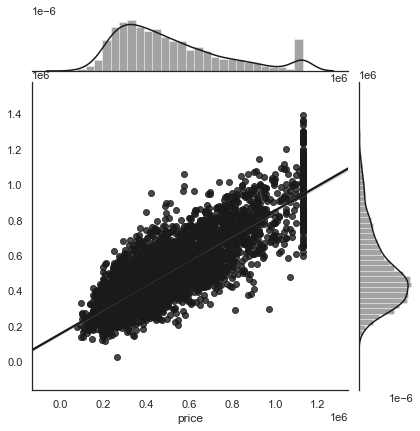

In [261]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_Ridge_pred_test, kind="reg", color="k")

### Losso Model

In [262]:
Lasso = Lasso(alpha=1)
Lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [263]:
#predicting result over train data
y_Lasso_pred_train= Lasso.predict(X_train)
y_Lasso_pred_train

array([542353.57544067, 755296.42560411, 571466.95168225, ...,
       752094.86131124, 492984.41236392, 460598.65233799])

In [264]:
#predicting result over test data
y_Lasso_pred_test= Lasso.predict(X_test)
y_Lasso_pred_test

array([ 305481.77950236, 1058005.0344445 ,  368525.64823286, ...,
        420693.07537339,  522535.698928  ,  290810.41759399])

In [265]:
Lasso.coef_

array([ 1.29272192e+02, -3.28498356e+00, -5.51670353e+01, -7.24103159e+01,
       -2.56777520e+03,  7.04812550e+01, -2.30221515e+00,  5.84564158e+00,
        2.85361496e+03,  1.01462390e+04, -1.81390555e+04, -3.36525413e+04,
       -4.13664672e+04, -5.81554982e+04,  5.16804509e+03,  2.42955657e+03,
        9.79137390e+04, -5.73962999e+02,  9.77793609e+03,  1.01448671e+04,
        2.05258602e+04,  5.87651929e+03,  3.41888345e+04,  4.14192097e+04,
        6.45668261e+04,  7.36641511e+04,  1.03486517e+05,  1.11467248e+04,
       -8.79777459e+02, -4.62298500e+03,  5.98149045e+04,  9.35407968e+04,
        1.76800240e+05, -0.00000000e+00,  3.40667754e+04,  5.43991467e+04,
        8.66167567e+04, -2.20841629e+05, -2.73068702e+05, -2.76082509e+05,
       -2.31055587e+05, -1.45473715e+05, -5.40108645e+04,  4.26142330e+04,
        1.35886464e+05,  2.08702326e+05,  2.34113486e+05,  2.13932809e+05,
        3.28382558e+04,  2.66162478e+04,  3.37886219e+04])

In [266]:
#Model score 
Lasso_train_score=r2_score(y_train,y_Lasso_pred_train)
Lasso_train_RMSE=np.sqrt(mean_squared_error(y_train, y_Lasso_pred_train))
Lasso_train_MSE=mean_squared_error(y_train, y_Lasso_pred_train)
Lasso_train_MAE=mean_absolute_error(y_train, y_Lasso_pred_train)

Lasso_test_score=r2_score(y_test,y_Lasso_pred_test)
Lasso_test_RMSE=np.sqrt(mean_squared_error(y_test, y_Lasso_pred_test))
Lasso_test_MSE=mean_squared_error(y_test, y_Lasso_pred_test)
Lasso_test_MAE=mean_absolute_error(y_test, y_Lasso_pred_test)

In [267]:
Lasso_df=pd.DataFrame({'Method':['Losso Model'],
                        'Test Score':Lasso_train_score,
                        'RMSE_test': Lasso_test_RMSE,
                        'MSE_test': Lasso_test_MSE,
                        'MAE_test': Lasso_test_MAE,
                        'Train Score':Lasso_train_score,
                        'RMSE_train': Lasso_train_RMSE,
                        'MSE_train': Lasso_train_MSE,
                        'MAE_train': Lasso_train_MAE})

Comparison_df = pd.concat([Comparison_df, Lasso_df])

Comparison_df

Method  Test Score      RMSE_test      MSE_test  \
0  Linear Regression Model    0.703668  135222.127869  1.828502e+10   
0              Ridge Model    0.703519  135256.091125  1.829421e+10   
0              Losso Model    0.682766  135238.694653  1.828950e+10   

        MAE_test  Train Score     RMSE_train     MSE_train      MAE_train  
0  105017.960441     0.682771  141050.005422  1.989510e+10  105017.960441  
0  105033.966057     0.682736  141057.679352  1.989727e+10  108024.827496  
0  105030.625285     0.682766  141051.069227  1.989540e+10  108012.514007

The Losso model performed with scores 0.68 & 0.68 in Train data set and Test data set respectively.

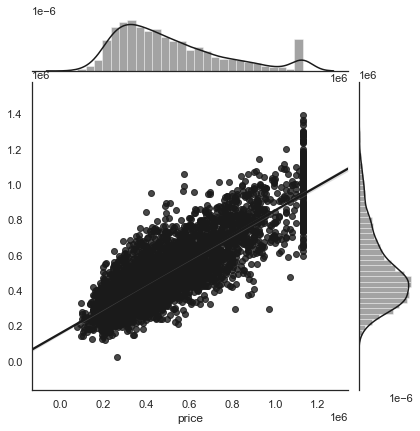

In [268]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_Lasso_pred_test, kind="reg", color="k")

#### KNN Regressor

In [269]:
from sklearn.neighbors import KNeighborsRegressor

In [270]:
knn = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [271]:
#predicting result over train data
y_knn_pred_train= knn.predict(X_train)
y_knn_pred_train

array([ 480000., 1129575.,  658000., ...,  999950.,  528000.,  386000.])

In [272]:
#predicting result over test data
y_knn_pred_test= knn.predict(X_test)
y_knn_pred_test

array([ 283220.71326587, 1037317.76937342,  311052.91647485, ...,
        406331.59740516,  605317.41053116,  330323.29719616])

In [273]:
#Model score 
knn_train_score=r2_score(y_train,y_knn_pred_train)
knn_train_RMSE=np.sqrt(mean_squared_error(y_train, y_knn_pred_train))
knn_train_MSE=mean_squared_error(y_train, y_knn_pred_train)
knn_train_MAE=mean_absolute_error(y_train, y_knn_pred_train)

knn_test_score=r2_score(y_test,y_knn_pred_test)
knn_test_RMSE=np.sqrt(mean_squared_error(y_test, y_knn_pred_test))
knn_test_MSE=mean_squared_error(y_test, y_knn_pred_test)
knn_test_MAE=mean_absolute_error(y_test, y_knn_pred_test)

In [274]:
knn_df=pd.DataFrame({'Method':['knn Model'],
                     'Test Score':knn_test_score,
                     'RMSE_test': knn_test_RMSE,
                     'MSE_test': knn_test_MSE, 
                     'MAE_test': knn_test_MAE,
                     'Train Score':knn_train_score,
                     'RMSE_train': knn_train_RMSE,
                     'MSE_train': knn_train_MSE,
                     'MAE_train': knn_train_MAE})

Comparison_df = pd.concat([Comparison_df, knn_df])

Comparison_df

Method  Test Score      RMSE_test      MSE_test  \
0  Linear Regression Model    0.703668  135222.127869  1.828502e+10   
0              Ridge Model    0.703519  135256.091125  1.829421e+10   
0              Losso Model    0.682766  135238.694653  1.828950e+10   
0                knn Model    0.535146  169362.387969  2.868362e+10   

        MAE_test  Train Score     RMSE_train     MSE_train      MAE_train  
0  105017.960441     0.682771  141050.005422  1.989510e+10  105017.960441  
0  105033.966057     0.682736  141057.679352  1.989727e+10  108024.827496  
0  105030.625285     0.682766  141051.069227  1.989540e+10  108012.514007  
0  128384.020547     0.998637    9244.836127  8.546700e+07     820.155986

* Though KNN regressor performed well in training set, the performance score in validation set is very less.
* This shows that the model is overfitted in training set

#### Support Vector Regressor

In [282]:
from sklearn.svm import SVR

In [276]:
SVR = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.2, gamma='auto')

In [277]:
y_SVR_pred_train= SVR.predict(X_train)
y_SVR_pred_train

array([450019.90663236, 450019.90663236, 450019.90663236, ...,
       450019.90663236, 450019.90663236, 449999.90663236])

In [278]:
y_SVR_pred_test= SVR.predict(X_test)
y_SVR_pred_test

array([450009.90663236, 450009.90663236, 450009.90663236, ...,
       450009.90663236, 450009.90663236, 450009.90663236])

In [279]:
#Model score
SVR_train_score=r2_score(y_train,y_SVR_pred_train)
SVR_train_RMSE=np.sqrt(mean_squared_error(y_train, y_SVR_pred_train))
SVR_train_MSE=mean_squared_error(y_train, y_SVR_pred_train)
SVR_train_MAE=mean_absolute_error(y_train, y_SVR_pred_train)

SVR_test_score=r2_score(y_test,y_SVR_pred_test)
SVR_test_RMSE=np.sqrt(mean_squared_error(y_test, y_SVR_pred_test))
SVR_test_MSE=mean_squared_error(y_test, y_SVR_pred_test)
SVR_test_MAE=mean_absolute_error(y_test, y_SVR_pred_test)

In [280]:
SVR_df=pd.DataFrame({'Method':['Support Vector Regressor Model'],
                     'Test Score':SVR_test_score,
                     'RMSE_test': SVR_test_RMSE,
                     'MSE_test': SVR_test_MSE,
                     'MAE_test': SVR_test_MAE,
                     'Train Score':SVR_train_score,
                     'RMSE_train': SVR_train_RMSE,
                     'MSE_train': SVR_train_MSE,
                     'MAE_train': SVR_train_MAE})

Comparison_df = pd.concat([Comparison_df, SVR_df])

Comparison_df

Method  Test Score      RMSE_test      MSE_test  \
0         Linear Regression Model    0.703668  135222.127869  1.828502e+10   
0                     Ridge Model    0.703519  135256.091125  1.829421e+10   
0                     Losso Model    0.682766  135238.694653  1.828950e+10   
0                       knn Model    0.535146  169362.387969  2.868362e+10   
0  Support Vector Regressor Model   -0.050712  254624.623389  6.483370e+10   

        MAE_test  Train Score     RMSE_train     MSE_train      MAE_train  
0  105017.960441     0.682771  141050.005422  1.989510e+10  105017.960441  
0  105033.966057     0.682736  141057.679352  1.989727e+10  108024.827496  
0  105030.625285     0.682766  141051.069227  1.989540e+10  108012.514007  
0  128384.020547     0.998637    9244.836127  8.546700e+07     820.155986  
0  191796.332853    -0.063240  258227.332216  6.668136e+10  193710.374217

The above negative scores in SVR model is due to non-learning of the model in the training set which results in non-performance in validation set. Let's try to modify the parameters and perform the model again.

In [283]:
SVR_1 = SVR(gamma='auto',C=0.1,kernel='linear')
SVR_1.fit(X_train, y_train)

SVR(C=0.1, gamma='auto', kernel='linear')

In [284]:
y_SVR1_pred_train= SVR_1.predict(X_train)
y_SVR1_pred_train

array([683205.01967749, 667743.08703269, 613822.32957675, ...,
       806412.78356484, 479075.17553036, 563906.5025199 ])

In [285]:
y_SVR1_pred_test= SVR_1.predict(X_test)
y_SVR1_pred_test

array([303368.69646431, 959060.04131554, 265987.09845299, ...,
       423174.51423229, 650707.45534355, 337214.41382865])

In [286]:
#Model score
SVR1_train_score=r2_score(y_train,y_SVR1_pred_train)
SVR1_train_RMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_pred_train))
SVR1_train_MSE=mean_squared_error(y_train, y_SVR1_pred_train)
SVR1_train_MAE=mean_absolute_error(y_train, y_SVR1_pred_train)

SVR1_test_score=r2_score(y_test,y_SVR1_pred_test)
SVR1_test_RMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_pred_test))
SVR1_test_MSE=mean_squared_error(y_test, y_SVR1_pred_test)
SVR1_test_MAE=mean_absolute_error(y_test, y_SVR1_pred_test)

In [287]:
SVR1_df=pd.DataFrame({'Method':['Support Vector Regressor(Modified)'],
                      'Test Score':SVR1_test_score,
                      'RMSE_test': SVR1_test_RMSE,
                      'MSE_test': SVR1_test_MSE,
                      'MAE_test': SVR1_test_MAE,
                      'Train Score':SVR1_train_score,
                      'RMSE_train': SVR1_train_RMSE,
                      'MSE_train': SVR1_train_MSE,
                      'MAE_train': SVR1_train_MAE})

Comparison_df = pd.concat([Comparison_df, SVR1_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630

The SVR model with modified parameters has not performed well with just ~0.57 scores in both training and test data sets.

### Decision Tree Regressor

In [288]:
from sklearn.tree import DecisionTreeRegressor

In [289]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

DecisionTreeRegressor()

In [290]:
y_DT1_pred_train= DT1.predict(X_train)
y_DT1_pred_train

array([ 480000., 1129575.,  658000., ...,  999950.,  528000.,  386000.])

In [291]:
y_DT1_pred_test= DT1.predict(X_test)
y_DT1_pred_test

array([174000., 972000., 245000., ..., 384205., 409000., 185000.])

In [292]:
#Model score
DT1_train_score=r2_score(y_train,y_DT1_pred_train)
DT1_train_RMSE=np.sqrt(mean_squared_error(y_train, y_DT1_pred_train))
DT1_train_MSE=mean_squared_error(y_train, y_DT1_pred_train)
DT1_train_MAE=mean_absolute_error(y_train, y_DT1_pred_train)

DT1_test_score=r2_score(y_test,y_DT1_pred_test)
DT1_test_RMSE=np.sqrt(mean_squared_error(y_test, y_DT1_pred_test))
DT1_test_MSE=mean_squared_error(y_test, y_DT1_pred_test)
DT1_test_MAE=mean_absolute_error(y_test, y_DT1_pred_test)

In [293]:
DT1_df=pd.DataFrame({'Method':['Dession Tree -1'],
                     'Test Score':DT1_test_score,
                     'RMSE_test': DT1_test_RMSE,
                     'MSE_test': DT1_test_MSE,
                     'MAE_test': DT1_test_MAE,
                     'Train Score':DT1_train_score,
                     'RMSE_train': DT1_train_RMSE,
                     'MSE_train': DT1_train_MSE,
                     'MAE_train': DT1_train_MAE})

Comparison_df = pd.concat([Comparison_df, DT1_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   
0                     Dession Tree -1    0.483369  178545.397695   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   
0  3.187846e+10  130580.327550     0.998637    9244.836127  8.546700e+07   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630  
0     820.155986

Above performance of initial Decision tree model shows overfit in training set with 0.99 score and low performance in test set.

In [294]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_pred_train= DT2.predict(X_train)
y_DT2_pred_test= DT2.predict(X_test)

#Model score 
DT2_train_score=r2_score(y_train,y_DT2_pred_train)
DT2_train_RMSE=np.sqrt(mean_squared_error(y_train, y_DT2_pred_train))
DT2_train_MSE=mean_squared_error(y_train, y_DT2_pred_train)
DT2_train_MAE=mean_absolute_error(y_train, y_DT2_pred_train)

DT2_test_score=r2_score(y_test,y_DT2_pred_test)
DT2_test_RMSE=np.sqrt(mean_squared_error(y_test, y_DT2_pred_test))
DT2_test_MSE=mean_squared_error(y_test, y_DT2_pred_test)
DT2_test_MAE=mean_absolute_error(y_test, y_DT2_pred_test)

DT2_df=pd.DataFrame({'Method':['Decision Tree -2'],
                     'Test Score':DT2_test_score,
                     'RMSE_test': DT2_test_RMSE,
                     'MSE_test': DT2_test_MSE,
                     'MAE_test': DT2_test_MAE,
                     'Train Score':DT2_train_score,
                     'RMSE_train': DT2_train_RMSE,
                     'MSE_train': DT2_train_MSE,
                     'MAE_train': DT2_train_MAE})
Comparison_df = pd.concat([Comparison_df, DT2_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   
0                     Dession Tree -1    0.483369  178545.397695   
0                    Decision Tree -2    0.679168  140700.982305   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   
0  3.187846e+10  130580.327550     0.998637    9244.836127  8.546700e+07   
0  1.979677e+10  105796.746970     0.771146  119802.428860  1.435262e+10   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630  
0     820.155986  
0   90712.091345

Above decision tree model with modified parameters has better performed on the training set and test set compared to initial decision tree model.But overall decision tree has not performed well compared to linear regression models.

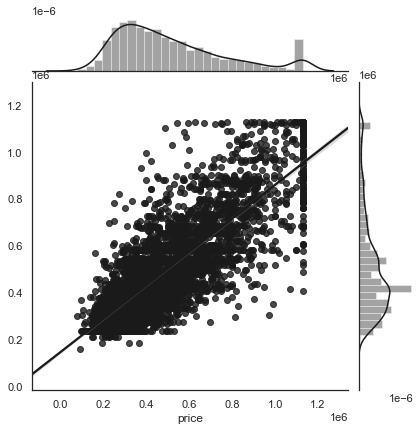

In [295]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_DT2_pred_test, kind="reg", color="k")

We can observe that, KNN regressor model and decision tree models have not performed well in comparison with linear regression models.

### Ensemble Techniques

#### Bagging & Boosting

In [296]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [297]:
Gradient_Boosting=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
Gradient_Boosting.fit(X_train, y_train)

y_GB_pred_train= Gradient_Boosting.predict(X_train)
y_GB_pred_test= Gradient_Boosting.predict(X_test)

#Model score
GB_train_score=r2_score(y_train,y_GB_pred_train)
GB_train_RMSE=np.sqrt(mean_squared_error(y_train, y_GB_pred_train))
GB_train_MSE=mean_squared_error(y_train, y_GB_pred_train)
GB_train_MAE=mean_absolute_error(y_train, y_GB_pred_train)

GB1_test_score=r2_score(y_test,y_GB_pred_test)
GB1_test_RMSE=np.sqrt(mean_squared_error(y_test, y_GB_pred_test))
GB1_test_MSE=mean_squared_error(y_test, y_GB_pred_test)
GB1_test_MAE=mean_absolute_error(y_test, y_GB_pred_test)

GB_df=pd.DataFrame({'Method':['Gradient Boosting Regressor'],
                    'Test Score':GB1_test_score,
                    'RMSE_test': GB1_test_RMSE,
                    'MSE_test': GB1_test_MSE,
                    'MAE_test': GB1_test_MAE,
                    'Train Score':GB_train_score,
                    'RMSE_train': GB_train_RMSE,
                    'MSE_train': GB_train_MSE,
                    'MAE_train': GB1_test_MAE})
Comparison_df = pd.concat([Comparison_df, GB_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   
0                     Dession Tree -1    0.483369  178545.397695   
0                    Decision Tree -2    0.679168  140700.982305   
0         Gradient Boosting Regressor    0.742221  126119.532265   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   
0  3.187846e+10  130580.327550     0.998637    9244.836127  8.546700e+07   
0  1.979677e+10  105796.746970     0.771146  119802.428860  1.435262e+10   
0  1.590614e+10   97839.489718     0.749858  125250.678917  1.568773e+10   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630  
0     820.155986  
0   90712.091345  
0   97839.489718

Gradient boosting model has provided good scores for both training and test sets.

In [298]:
Bagging=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
Bagging.fit(X_train, y_train)

y_Bagging_pred_train= Bagging.predict(X_train)
y_Bagging_pred_test= Bagging.predict(X_test)

#Model score
Bagging_train_score=r2_score(y_train,y_Bagging_pred_train)
Bagging_train_RMSE=np.sqrt(mean_squared_error(y_train, y_Bagging_pred_train))
Bagging_train_MSE=mean_squared_error(y_train, y_Bagging_pred_train)
Bagging_train_MAE=mean_absolute_error(y_train, y_Bagging_pred_train)

Bagging_test_score=r2_score(y_test,y_Bagging_pred_test)
Bagging_test_RMSE=np.sqrt(mean_squared_error(y_test, y_Bagging_pred_test))
Bagging_test_MSE=mean_squared_error(y_test, y_Bagging_pred_test)
Bagging_test_MAE=mean_absolute_error(y_test, y_Bagging_pred_test)

Bagging_df=pd.DataFrame({'Method':['Bagging Regressor'],
                      'Test Score':Bagging_test_score,
                      'RMSE_test': Bagging_test_RMSE,
                      'MSE_test':Bagging_test_MSE,
                      'MAE_test': Bagging_test_MAE,
                      'Train Score':Bagging_train_score,
                      'RMSE_train': Bagging_train_RMSE,
                      'MSE_train': Bagging_train_MSE,
                      'MAE_train': Bagging_train_MAE})
Comparison_df = pd.concat([Comparison_df, Bagging_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   
0                     Dession Tree -1    0.483369  178545.397695   
0                    Decision Tree -2    0.679168  140700.982305   
0         Gradient Boosting Regressor    0.742221  126119.532265   
0                   Bagging Regressor    0.745086  125416.558141   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   
0  3.187846e+10  130580.327550     0.998637    9244.836127  8.546700e+07   
0  1.979677e+10  105796.746970     0.771146  119802.428860  1.435262e+10   
0  1.590614e+10   97839.489718     0.749858  125250.678917  1.568773e+10   
0  1.572931e+10   95504.808945     0.960147   49994.049363  2.499405e+09   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630  
0     820.155986  
0   90712.091345  
0   97839.489718  
0   36654.383026

Bagging model also performed well in train and test sets.There seems to be overfitting in training set. We need to analyse further by hypertuning the model.

### Random Forest Regressor

In [299]:
from sklearn.ensemble import RandomForestRegressor

In [301]:
Random_Forest=RandomForestRegressor()
Random_Forest.fit(X_train, y_train)

y_RF_pred_train= Random_Forest.predict(X_train)
y_RF_pred_test= Random_Forest.predict(X_test)

#Model score
RF_train_score=r2_score(y_train,y_RF_pred_train)
RF_train_RMSE=np.sqrt(mean_squared_error(y_train, y_RF_pred_train))
RF_train_MSE=mean_squared_error(y_train, y_RF_pred_train)
RF_train_MAE=mean_absolute_error(y_train, y_RF_pred_train)

RF_test_score=r2_score(y_test,y_RF_pred_test)
RF_test_RMSE=np.sqrt(mean_squared_error(y_test, y_RF_pred_test))
RF_test_MSE=mean_squared_error(y_test, y_RF_pred_test)
RF_test_MAE=mean_absolute_error(y_test, y_RF_pred_test)

RF_df=pd.DataFrame({'Method':['Random Forest'],
                    'Test Score':RF_test_score,
                    'RMSE_test': RF_test_RMSE,
                    'MSE_test':RF_test_MSE,
                    'MAE_test': RF_test_MAE,
                    'Train Score':RF_train_score,
                    'RMSE_train': RF_train_RMSE,
                    'MSE_train': RF_train_MSE,
                    'MAE_train': RF_train_MAE})
Comparison_df = pd.concat([Comparison_df, RF_df])

Comparison_df

Method  Test Score      RMSE_test  \
0             Linear Regression Model    0.703668  135222.127869   
0                         Ridge Model    0.703519  135256.091125   
0                         Losso Model    0.682766  135238.694653   
0                           knn Model    0.535146  169362.387969   
0      Support Vector Regressor Model   -0.050712  254624.623389   
0  Support Vector Regressor(Modified)    0.586507  159732.258253   
0                     Dession Tree -1    0.483369  178545.397695   
0                    Decision Tree -2    0.679168  140700.982305   
0         Gradient Boosting Regressor    0.742221  126119.532265   
0                   Bagging Regressor    0.745086  125416.558141   
0                       Random Forest    0.743763  125741.711023   

       MSE_test       MAE_test  Train Score     RMSE_train     MSE_train  \
0  1.828502e+10  105017.960441     0.682771  141050.005422  1.989510e+10   
0  1.829421e+10  105033.966057     0.682736  141057.679352  1.989727e+10   
0  1.828950e+10  105030.625285     0.682766  141051.069227  1.989540e+10   
0  2.868362e+10  128384.020547     0.998637    9244.836127  8.546700e+07   
0  6.483370e+10  191796.332853    -0.063240  258227.332216  6.668136e+10   
0  2.551439e+10  124511.552092     0.571431  163944.525033  2.687781e+10   
0  3.187846e+10  130580.327550     0.998637    9244.836127  8.546700e+07   
0  1.979677e+10  105796.746970     0.771146  119802.428860  1.435262e+10   
0  1.590614e+10   97839.489718     0.749858  125250.678917  1.568773e+10   
0  1.572931e+10   95504.808945     0.960147   49994.049363  2.499405e+09   
0  1.581098e+10   95482.119344     0.961959   48844.171797  2.385753e+09   

       MAE_train  
0  105017.960441  
0  108024.827496  
0  108012.514007  
0     820.155986  
0  193710.374217  
0  128075.700630  
0     820.155986  
0   90712.091345  
0   97839.489718  
0   36654.383026  
0   36100.840827

Random Forest performed well in both training and testing data. But there is overfitting for train data.

We can obseve that, Ensemble models have performed well on train and test sets. 

These models can be selected for further analysis with hypertuning and feature selection.

#### Feature Importance

First 20 feature importance:	 Imp    96.121
dtype: float64
First 30 feature importance:	 Imp    98.437
dtype: float64


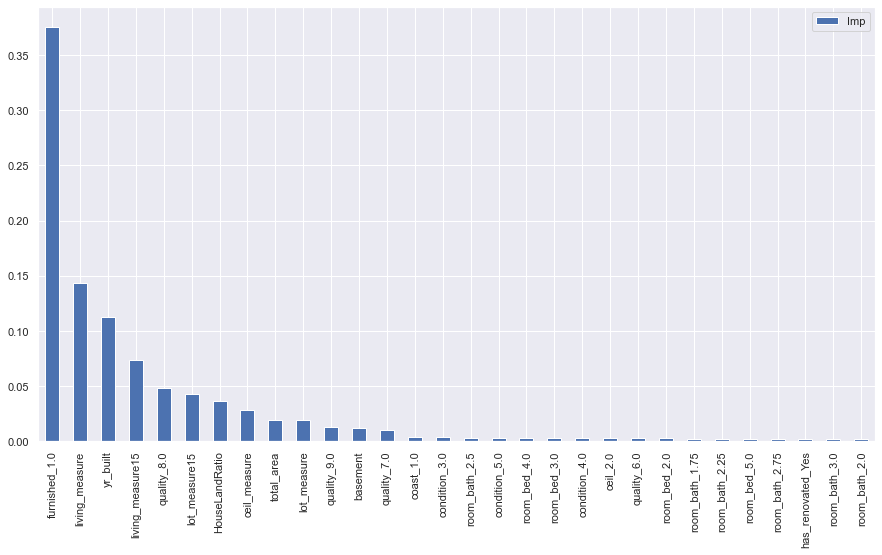

In [302]:
#feature importance
RF_imp_feature=pd.DataFrame(Random_Forest.feature_importances_, columns = ["Imp"], index = X_test.columns)
RF_imp_feature.sort_values(by="Imp",ascending=False)
RF_imp_feature['Imp'] = RF_imp_feature['Imp'].map('{0:.5f}'.format)
RF_imp_feature=RF_imp_feature.sort_values(by="Imp",ascending=False)
RF_imp_feature.Imp=RF_imp_feature.Imp.astype("float")

RF_imp_feature[:30].plot.bar(figsize=(15, 8))

print("First 20 feature importance:\t",(RF_imp_feature[:20].sum())*100)
print("First 30 feature importance:\t",(RF_imp_feature[:30].sum())*100)

From the Bar Plot, 
* we can understand that, above are top 30 important features that account for 98% of variation in model. 
* This need to be further analysed during hypertuning of the models for better scores

#### Model performance Summary:

* Ensemble methods are performing better than linear models. 
* Among the ensemble models, Gradient Boosting regressor is giving better R2 score for both train and test.
* we identified top 30 features that are explaining the 98% variation in model(Random Forest). 
* We can further hypertune the model to improve the model performance.
* Ww can further explore and evaluate the features while hyperturning the ensemble models.

#### Building Function/Pipeline for models

In [303]:
RF_imp_feature[:30]

Imp
furnished_1.0      0.37516
living_measure     0.14386
yr_built           0.11248
living_measure15   0.07387
quality_8.0        0.04858
lot_measure15      0.04333
HouseLandRatio     0.03647
ceil_measure       0.02874
total_area         0.01966
lot_measure        0.01938
quality_9.0        0.01337
basement           0.01187
quality_7.0        0.01007
coast_1.0          0.00411
condition_3.0      0.00410
room_bath_2.5      0.00349
condition_5.0      0.00334
room_bed_4.0       0.00316
room_bed_3.0       0.00312
condition_4.0      0.00305
ceil_2.0           0.00298
quality_6.0        0.00287
room_bed_2.0       0.00272
room_bath_1.75     0.00238
room_bath_2.25     0.00225
room_bed_5.0       0.00208
room_bath_2.75     0.00207
has_renovated_Yes  0.00204
room_bath_3.0      0.00192
room_bath_2.0      0.00185

**Let us now create a function which will run the model and return the r2 score,rmse,mse of the model**

In [304]:
from sklearn.pipeline import Pipeline

In [305]:
def result (model,pipe_model,X_train_set,y_train_set,X_test_set,y_test_set):
    pipe_model.fit(X_train_set,y_train_set)
    #predicting result over test data
    y_train_predict= pipe_model.predict(X_train_set)
    y_test_predict= pipe_model.predict(X_test_set)

    train_score=r2_score(y_train_set,y_train_predict)
    train_RMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    train_MSE=mean_squared_error(y_train_set,y_train_predict)
    train_MAE=mean_absolute_error(y_train_set,y_train_predict)

    test_score=r2_score(y_test,y_test_predict)
    test_RMSE=np.sqrt(mean_squared_error(y_test,y_test_predict))
    test_MSE=mean_squared_error(y_test,y_test_predict)
    test_MAE=mean_absolute_error(y_test,y_test_predict)
    result_df=pd.DataFrame({'Method':[model],
                            'Test score':test_score,
                            'RMSE_test':test_RMSE,
                            'MSE_test':test_MSE,
                            'MAE_test': test_MAE,
                            'Train Score':train_score,
                            'RMSE_train': train_RMSE,
                            'MSE_train': train_MSE, 
                            'MAE_train': train_MAE})  
    return result_df

In [306]:
#Creating empty dataframe to capture results
df_result=pd.DataFrame()
pipe_LR = Pipeline([('LR', LinearRegression())])
df_result=pd.concat([df_result,result('LR',pipe_LR,X_train,y_train,X_test,y_test)])

pipe_knnr = Pipeline([('KNNR', KNeighborsRegressor(n_neighbors=4,weights='distance'))])
df_result=pd.concat([df_result,result('KNNR',pipe_knnr,X_train,y_train,X_test,y_test)])

pipe_DTR = Pipeline([('DTR', DecisionTreeRegressor())])
df_result=pd.concat([df_result,result('DTR',pipe_DTR,X_train,y_train,X_test,y_test)])

pipe_GBR = Pipeline([('GBR', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22))])
df_result=pd.concat([df_result,result('GBR',pipe_GBR,X_train,y_train,X_test,y_test)])

pipe_BGR = Pipeline([('BGR', BaggingRegressor(n_estimators=50, oob_score= True,random_state=14))])
df_result=pd.concat([df_result,result('BGR',pipe_BGR,X_train,y_train,X_test,y_test)])

pipe_RFR = Pipeline([('RFR', RandomForestRegressor())])
df_result=pd.concat([df_result,result('RFR',pipe_RFR,X_train,y_train,X_test,y_test)])

df_result

Method  Test score      RMSE_test      MSE_test       MAE_test  Train Score  \
0     LR    0.703668  135222.127869  1.828502e+10  105017.960441     0.682771   
0   KNNR    0.535146  169362.387969  2.868362e+10  128384.020547     0.998637   
0    DTR    0.487547  177822.059596  3.162068e+10  129895.505436     0.998637   
0    GBR    0.742221  126119.532265  1.590614e+10   97839.489718     0.749858   
0    BGR    0.745086  125416.558141  1.572931e+10   95504.808945     0.960147   
0    RFR    0.744323  125604.226061  1.577642e+10   95153.067131     0.961526   

      RMSE_train     MSE_train      MAE_train  
0  141050.005422  1.989510e+10  108009.131351  
0    9244.836127  8.546700e+07     820.155986  
0    9244.836127  8.546700e+07     820.155986  
0  125250.678917  1.568773e+10   96281.918856  
0   49994.049363  2.499405e+09   36654.383026  
0   49121.655940  2.412937e+09   36274.778356

The above sequence of steps with pipeline function will run all the models and compile the scores in a dataframe. 

We can see that the above 2 steps are concise instead of running individual models and compiling the scores as earlier.

**We can clearly see that gradient boosting is giving better result in comparison with other ensemble methods.**

In [307]:
model_df.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'HouseLandRatio', 'room_bed_2.0', 'room_bed_3.0', 'room_bed_4.0',
       'room_bed_5.0', 'room_bed_5.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0',
       'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.625', 'ceil_1.5',
       'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1.0',
       'condition_2.0', 'condition_3.0', 'condition_4.0', 'condition_5.0',
       'quality_3.0', 'quality_4.0', 'quality_5.0', 'quality_6.0',
       'quality_7.0', 'quality_8.0', 'quality_9.0', 'quality_10.0',
       'quality_11.0', 'quality_12.0', 'quality_13.0', 'furnished_1.0',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object')

In [308]:
#Building function to return the feature importances for each model
predictors = [x for x in model_df.columns if x not in ['price']]

def modelfit(alg, dxtrain, dytrain, printFeatureImportance=True):
    #feature importance
    alg.fit(dxtrain,dytrain)
    alg_imp_feature=pd.DataFrame(alg.feature_importances_, columns = ["Imp"], index = predictors)
    alg_imp_feature.sort_values(by="Imp",ascending=False)
    alg_imp_feature['Imp'] = alg_imp_feature['Imp'].map('{0:.5f}'.format)
    alg_imp_feature=alg_imp_feature.sort_values(by="Imp",ascending=False)
    alg_imp_feature.Imp=alg_imp_feature.Imp.astype("float")
    
    feat_30_list=list(alg_imp_feature.index[:30])
    

    
    if printFeatureImportance:
        alg_imp_feature[:30].plot.bar(figsize=(15, 8))
        print("First 25 feature importance:\t",(alg_imp_feature[:25].sum())*100)
        print("First 30 feature importance:\t",(alg_imp_feature[:30].sum())*100)
        
    return feat_30_list

**Will run above function with ensemble models: Gradient boosting, Random forest, Bagging**

First 25 feature importance:	 Imp    99.633
dtype: float64
First 30 feature importance:	 Imp    99.8
dtype: float64


['furnished_1.0',
 'living_measure',
 'yr_built',
 'living_measure15',
 'quality_8.0',
 'lot_measure15',
 'quality_9.0',
 'HouseLandRatio',
 'quality_7.0',
 'coast_1.0',
 'ceil_measure',
 'basement',
 'room_bath_2.5',
 'condition_5.0',
 'quality_6.0',
 'condition_3.0',
 'quality_10.0',
 'ceil_3.0',
 'total_area',
 'lot_measure',
 'quality_5.0',
 'quality_11.0',
 'room_bath_3.625',
 'has_renovated_Yes',
 'room_bed_2.0',
 'condition_2.0',
 'quality_12.0',
 'room_bath_3.25',
 'room_bath_1.0',
 'room_bed_5.0']

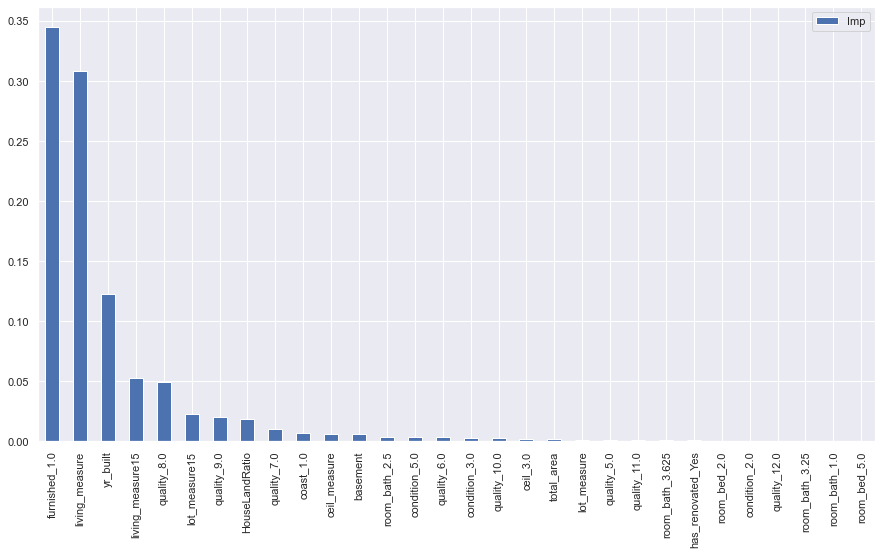

In [309]:
#Gradient boost model
modelfit(Gradient_Boosting,X_train,y_train)

The top 30 features are covering about 99% in gradient boosting model.

This is very good coverage for just 30% of the variables

First 25 feature importance:	 Imp    97.431
dtype: float64
First 30 feature importance:	 Imp    98.428
dtype: float64


['furnished_1.0',
 'living_measure',
 'yr_built',
 'living_measure15',
 'quality_8.0',
 'lot_measure15',
 'HouseLandRatio',
 'ceil_measure',
 'lot_measure',
 'total_area',
 'quality_9.0',
 'basement',
 'quality_7.0',
 'coast_1.0',
 'condition_3.0',
 'room_bath_2.5',
 'condition_5.0',
 'room_bed_3.0',
 'quality_6.0',
 'room_bed_4.0',
 'condition_4.0',
 'ceil_2.0',
 'room_bed_2.0',
 'room_bath_1.75',
 'room_bed_5.0',
 'room_bath_2.25',
 'has_renovated_Yes',
 'room_bath_2.75',
 'room_bath_3.0',
 'room_bath_2.0']

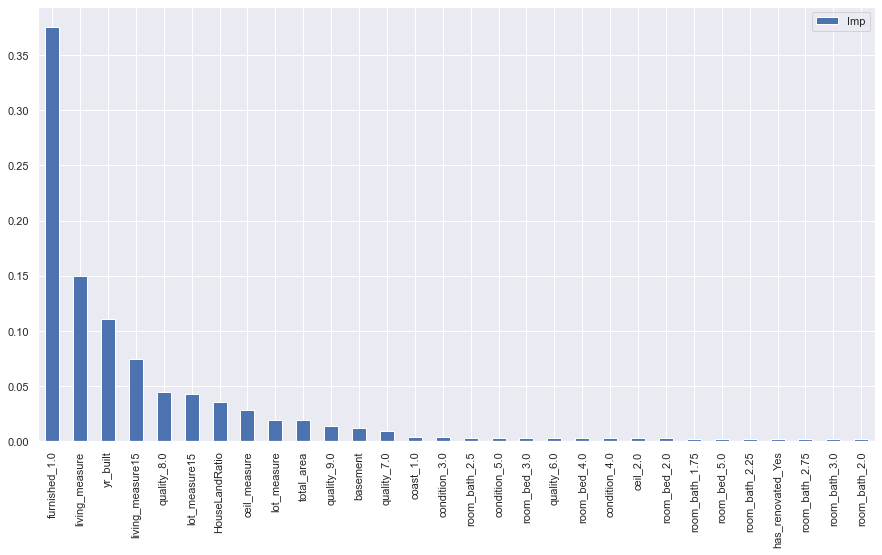

In [310]:
#Random Forest model
modelfit(Random_Forest,X_train,y_train)

In [311]:
feat_list_GB=modelfit(Gradient_Boosting,X_train,y_train, printFeatureImportance=False)
print(feat_list_GB)

['furnished_1.0', 'living_measure', 'yr_built', 'living_measure15', 'quality_8.0', 'lot_measure15', 'quality_9.0', 'HouseLandRatio', 'quality_7.0', 'coast_1.0', 'ceil_measure', 'basement', 'room_bath_2.5', 'condition_5.0', 'quality_6.0', 'condition_3.0', 'quality_10.0', 'ceil_3.0', 'total_area', 'lot_measure', 'quality_5.0', 'quality_11.0', 'room_bath_3.625', 'has_renovated_Yes', 'room_bed_2.0', 'condition_2.0', 'quality_12.0', 'room_bath_3.25', 'room_bath_1.0', 'room_bed_5.0']


In [312]:
feat_list_RF=modelfit(Random_Forest,X_train,y_train, printFeatureImportance=False)
print(feat_list_RF)

['furnished_1.0', 'living_measure', 'yr_built', 'living_measure15', 'quality_8.0', 'lot_measure15', 'HouseLandRatio', 'ceil_measure', 'total_area', 'lot_measure', 'quality_9.0', 'basement', 'quality_7.0', 'coast_1.0', 'condition_3.0', 'room_bath_2.5', 'condition_5.0', 'room_bed_3.0', 'room_bed_4.0', 'quality_6.0', 'condition_4.0', 'ceil_2.0', 'room_bed_2.0', 'room_bath_1.75', 'room_bath_2.25', 'has_renovated_Yes', 'room_bath_3.0', 'room_bed_5.0', 'room_bath_2.75', 'room_bath_2.0']


**From the above 2 feature list, we will consolidate all the features.**

In [313]:
Key_features=list(set(feat_list_GB).union(feat_list_RF))
print(Key_features)

['room_bath_2.75', 'room_bath_2.25', 'room_bath_2.0', 'ceil_2.0', 'basement', 'has_renovated_Yes', 'room_bath_3.0', 'condition_4.0', 'condition_5.0', 'yr_built', 'quality_6.0', 'quality_8.0', 'room_bed_2.0', 'lot_measure15', 'coast_1.0', 'total_area', 'quality_12.0', 'room_bath_2.5', 'furnished_1.0', 'room_bed_4.0', 'lot_measure', 'room_bath_1.75', 'room_bed_3.0', 'living_measure', 'quality_5.0', 'room_bath_1.0', 'room_bath_3.25', 'quality_7.0', 'quality_10.0', 'living_measure15', 'condition_3.0', 'room_bath_3.625', 'room_bed_5.0', 'ceil_measure', 'condition_2.0', 'ceil_3.0', 'quality_9.0', 'HouseLandRatio', 'quality_11.0']


In [314]:
print(len(Key_features))

39


From two models, we have 39 importance features. We will freeze on the above 39 list and make another dataframe (along with 'price').

In [315]:
df = model_df[['price','condition_4.0', 'room_bath_2.0', 'yr_built', 'quality_12.0', 'quality_8.0', 'room_bath_1.75', 'room_bath_2.75', 'quality_5.0', 'lot_measure', 'quality_9.0', 'basement', 'condition_3.0', 'has_renovated_Yes', 'quality_7.0', 'room_bath_2.25', 'living_measure', 'room_bed_4.0', 'room_bath_3.25', 'lot_measure15', 'HouseLandRatio', 'quality_6.0', 'room_bed_5.0', 'room_bath_1.0', 'coast_1.0', 'room_bath_3.0', 'living_measure15', 'ceil_3.0', 'condition_2.0', 'quality_11.0', 'room_bath_3.625', 'room_bed_2.0', 'ceil_measure', 'total_area', 'furnished_1.0', 'ceil_2.0', 'room_bath_2.5', 'quality_10.0', 'condition_5.0', 'room_bed_3.0']]

In [316]:
df.shape

(21613, 40)

In [317]:
df.head().

price  condition_4.0  room_bath_2.0 yr_built  quality_12.0  \
12235  460000.0              1              1   1985.0             0   
14791  345600.0              0              0   1903.0             0   
1742   750000.0              0              0   1923.0             0   
17829  325000.0              1              0   1990.0             0   
14810  390000.0              0              0   1996.0             0   

       quality_8.0  room_bath_1.75  room_bath_2.75  quality_5.0  lot_measure  \
12235            0               0               0            0       9055.0   
14791            0               0               0            0       5120.0   
1742             1               1               0            0      10578.0   
17829            1               0               0            0       6049.0   
14810            1               0               0            0      10800.0   

       quality_9.0  basement  condition_3.0  has_renovated_Yes  quality_7.0  \
12235            0       0.0              0                  0            1   
14791            1       0.0              1                  1            0   
1742             0     690.0              0                  0            0   
17829            0       0.0              0                  0            0   
14810            0       0.0              1                  0            0   

       room_bath_2.25  living_measure  room_bed_4.0  room_bath_3.25  \
12235               0          1760.0             0               0   
14791               0          2800.0             0               0   
1742                0          2240.0             0               0   
17829               0          2220.0             0               0   
14810               0          2240.0             0               0   

       lot_measure15  HouseLandRatio  quality_6.0  room_bed_5.0  \
12235         9383.0            16.0            0             0   
14791         5120.0            35.0            0             1   
1742         10578.0            17.0            0             0   
17829         7226.0            27.0            0             0   
14810         9900.0            17.0            0             0   

       room_bath_1.0  coast_1.0  room_bath_3.0  living_measure15  ceil_3.0  \
12235              0          0              0            2010.0         0   
14791              0          0              0            1780.0         0   
1742               0          0              0            1570.0         0   
17829              0          0              0            1980.0         0   
14810              0          0              0            1900.0         0   

       condition_2.0  quality_11.0  room_bath_3.625  room_bed_2.0  \
12235              0             0                0             0   
14791              0             0                0             0   
1742               0             0                0             0   
17829              0             0                0             0   
14810              0             0                0             0   

       ceil_measure  total_area  furnished_1.0  ceil_2.0  room_bath_2.5  \
12235        1760.0     10815.0              0         1              0   
14791        2800.0      7920.0              1         0              0   
1742         1550.0     12818.0              0         1              0   
17829        2220.0      8269.0              0         1              1   
14810        2240.0     13040.0              0         1              1   

       quality_10.0  condition_5.0  room_bed_3.0  
12235             0              0             1  
14791             0              0             0  
1742              0              1             1  
17829             0              0             1  
14810             0              0             1

In [318]:
X1 = df.drop("price" , axis=1)
y1 = df["price"]

In [319]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [320]:
print(X1_train.shape)
print(X1_test.shape)

(17290, 39)
(4323, 39)


In [321]:
print(y1_train.shape)
print(y1_test.shape)

(17290,)
(4323,)


we can obsrve that, 

In random forest model top 30 features are explaining the 98% variance in the regression.

In gradient boosting model top 30 features are covering 99% variance.

Hence, we conclude that we will use features selection by considering the feature importance fuction in individual models.

Thus, we extracted 39 important features from both the models.

### HYPERTUNING with Gridsearch CV

In [322]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

Since we have better performance in gradient boosting model, we will hypertune the model for improving the score

**Following are the parameters we tune for the gradient boosting model.**

In [323]:
param_grid = {
    'loss':['ls','lad','huber'],
    'bootstrap': ['True','False'],
    'max_depth': range(5,11,1),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.05,0.1,0.2,0.25],
    'min_samples_leaf': [4,10,20],
    'min_samples_split': [5,10,1000],
    'n_estimators': [10,50,100,150,200],
    'subsample':[0.8,1]
}

In [324]:
GBR_test=GradientBoostingRegressor(random_state=22)

**First will tune each parameter separately**

In [325]:
param_grid1 = {'n_estimators': range(50,401,50)}

In [326]:
grid_search1 = GridSearchCV(estimator = GBR_test, param_grid = param_grid1, 
                          cv = 3, n_jobs = 2, verbose = 1)

In [327]:
grid_search1.fit(X_train,y_train)
grid_search1.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'n_estimators': 400}

In [328]:
grid_search1.best_params_, grid_search1.best_score_

({'n_estimators': 400}, 0.7291264789732015)

n_estimators of 400 is best in range 50 to 400. Will test same until 1000

In [329]:
param_grid2 = {'n_estimators': range(400,1001,200)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 3, n_jobs = 2, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2, param_grid={'n_estimators': range(400, 1001, 200)},
             verbose=1)

In [330]:
grid_search2.cv_results_,grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([22.75017134, 34.7170922 , 46.33330758, 57.09650517]),
  'std_fit_time': array([0.09823325, 0.34292685, 0.49193489, 1.57310251]),
  'mean_score_time': array([0.09197815, 0.12816477, 0.15779567, 0.18309442]),
  'std_score_time': array([0.00326844, 0.00129611, 0.00806943, 0.01162769]),
  'param_n_estimators': masked_array(data=[400, 600, 800, 1000],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 400},
   {'n_estimators': 600},
   {'n_estimators': 800},
   {'n_estimators': 1000}],
  'split0_test_score': array([0.72924537, 0.73019217, 0.7293117 , 0.72812746]),
  'split1_test_score': array([0.72058408, 0.72253603, 0.72264642, 0.72278318]),
  'split2_test_score': array([0.73754998, 0.73805264, 0.73800347, 0.73686532]),
  'mean_test_score': array([0.72912648, 0.73026028, 0.7299872 , 0.72925865]),
  'std_test_score': array([0.00692681, 0.00633481, 0.00628766, 0.00580439]),
  'rank_te

In [331]:
param_grid2 = {'n_estimators': range(1000,2000,300)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3, param_grid={'n_estimators': range(1000, 2000, 300)},
             verbose=1)

In [332]:
grid_search2.best_params_, grid_search2.best_score_

({'n_estimators': 1000}, 0.7333937820916592)

n_estimators of 1000 is giving best result in range 400 to 1000

In [333]:
param_grid3 = {
    'learning_rate': [0.1,0.2],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
    'n_estimators': [500,1000],
}

In [334]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search3 = GridSearchCV(estimator = GBR_test, param_grid = param_grid3, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search3.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.2],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [335]:
grid_search3.best_params_, grid_search3.best_score_

({'learning_rate': 0.1,
  'min_samples_leaf': 10,
  'min_samples_split': 5,
  'n_estimators': 1000},
 0.73437544037117)

In combination of 4 parameters above values are giving best result. We can see n_estimators of 1000 is best again. Now, will change the ranges of other 3 parameters

In [336]:
param_grid4 = {
    'learning_rate': [0.1,0.15],
    'max_depth': [5,10],
    'min_samples_leaf': [5,8],
    'min_samples_split': [20,30],
    'n_estimators': [1000],
}

In [337]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search4 = GridSearchCV(estimator = GBR_test, param_grid = param_grid4, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search4.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'min_samples_leaf': [5, 8],
                         'min_samples_split': [20, 30],
                         'n_estimators': [1000]},
             verbose=1)

In [338]:
grid_search4.best_params_, grid_search4.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 30,
  'n_estimators': 1000},
 0.7294779302792567)

Now the score has reduced compared to earlier run

In [339]:
param_grid5 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8,10],
    'min_samples_split': [30,40],
    'n_estimators': [1000],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search5 = GridSearchCV(estimator = GBR_test, param_grid = param_grid5, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search5.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [30, 40],
                         'n_estimators': [1000]},
             verbose=1)

In [340]:
grid_search5.best_params_, grid_search5.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 40,
  'n_estimators': 1000},
 0.7295953862235582)

The scrore is almost same as the previous run.

In [341]:
param_grid6 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8],
    'min_samples_split': [40,50],
    'n_estimators': [1000],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search6 = GridSearchCV(estimator = GBR_test, param_grid = param_grid6, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search6.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8], 'min_samples_split': [40, 50],
                         'n_estimators': [1000]},
             verbose=1)

In [342]:
grid_search6.best_params_, grid_search6.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 8,
  'min_samples_split': 50,
  'n_estimators': 1000},
 0.7299259520164757)

There is very marginal improvment in score. We are getting best score at min_samples_split of 40 among 30,40,50.

**Will tune the final set of parameters along with above finalized ones**

In [343]:
param_grid7 = {
    'loss':['ls','lad','huber'],
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8],
    'min_samples_split': [40],
    'n_estimators': [1000],
    'subsample':[0.8,1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search7 = GridSearchCV(estimator = GBR_test, param_grid = param_grid7, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search7.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8], 'min_samples_split': [40],
                         'n_estimators': [1000], 'subsample': [0.8, 1]},
             verbose=1)

In [344]:
grid_search7.best_params_, grid_search7.best_score_

({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 8,
  'min_samples_split': 40,
  'n_estimators': 1000,
  'subsample': 1},
 0.736593660746616)

There is improvement in the score. will try one more iteration with changing other parameters.

In [345]:
param_gridF = {
    'loss':['huber'],
    'max_features': ['sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5],
    'min_samples_split': [40,50],
    'n_estimators': [1000],
    'subsample':[1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_params_,grid_searchF.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 40,
  'n_estimators': 1000,
  'subsample': 1},
 0.7362144962305104)

The above iteration gives best result of **0.736.**

Final parameters that are giving best result on training set are: 

**({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 8,
  'min_samples_split': 40,
  'n_estimators': 1000,
  'subsample': 1},
 0.736593660746616)**

#### Hypertuning using graph.

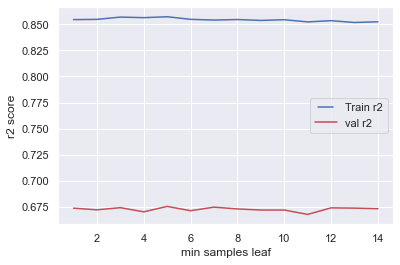

In [346]:
min_samples_leafs = range(1, 15, 1)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=40,
        min_samples_leaf=min_samples_leaf,
        max_depth=5,
        random_state=22,
        alpha=0.9,
)
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_leafs_train=r2_score(y_GBR_pred_train,y_train)
   train_results.append(result_leafs_train)
   result_leafs_test=r2_score(y_GBR_pred_test,y_test)
   test_results.append(result_leafs_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs,train_results,"b", label='Train r2')
line2, = plt.plot(min_samples_leafs, test_results,"r", label='val r2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("r2 score")
plt.xlabel("min samples leaf")
plt.show()

From above, min_samples_leaf of 5 is giving best score

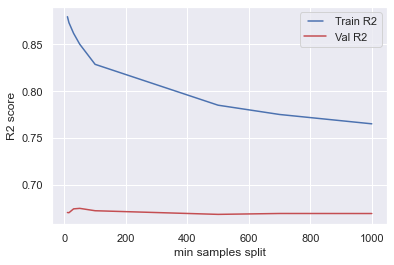

In [347]:
min_samples_splits = [10,15,30,50,100,500,700,1000]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_spt_train=r2_score(y_GBR_pred_train,y_train)
   train_results_spt.append(result_spt_train)
   result_spt_test=r2_score(y_GBR_pred_test,y_test)
   test_results_spt.append(result_spt_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()

From above, min_samples_splits of about 10 is giving best score. Will try expanding the range around 10

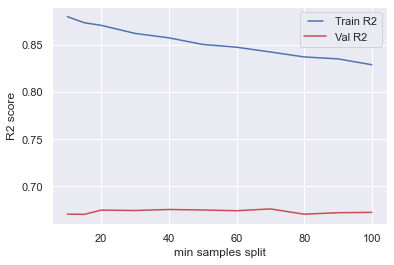

In [348]:
min_samples_splits = [10,15,20,30,40,50,60,70,80,90,100]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_spt_train=r2_score(y_GBR_pred_train,y_train)
   train_results_spt.append(result_spt_train)
   result_spt_test=r2_score(y_GBR_pred_test,y_test)
   test_results_spt.append(result_spt_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()

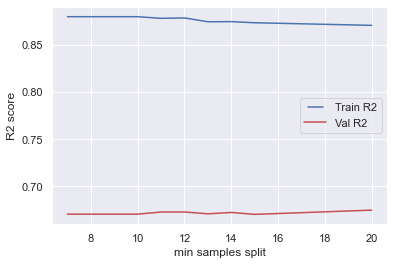

In [349]:
min_samples_splits = [7,8,9,10,11,12,13,14,15,20]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_spt_train=r2_score(y_GBR_pred_train,y_train)
   train_results_spt.append(result_spt_train)
   result_spt_test=r2_score(y_GBR_pred_test,y_test)
   test_results_spt.append(result_spt_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()

From above, min_samples_splits of about 12 is giving best score.

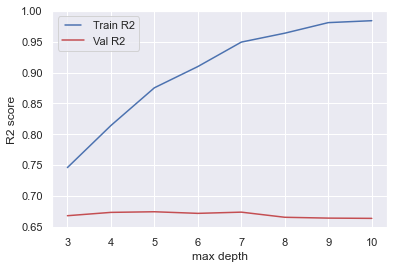

In [350]:
max_depths = range(3,11,1)
train_results_dpt = []
test_results_dpt = []
for max_depth in max_depths:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=10,
        min_samples_leaf=6,
        max_depth=max_depth,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_dpt_train=r2_score(y_GBR_pred_train,y_train)
   train_results_dpt.append(result_dpt_train)
   result_dpt_test=r2_score(y_GBR_pred_test,y_test)
   test_results_dpt.append(result_dpt_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths,train_results_dpt,"b", label='Train R2')
line2, = plt.plot(max_depths, test_results_dpt,"r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("max depth")
plt.show()

From above, max_depth of about 6 is giving best score.

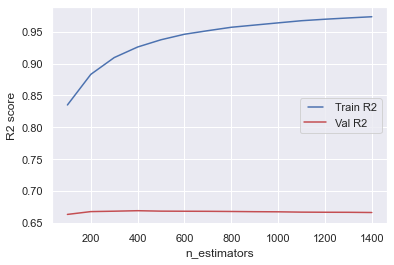

In [351]:
estimators = range(100,1500,100)
train_results_est = []
test_results_est = []
for n_estimators in estimators:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=n_estimators,
        subsample=1.0,
        min_samples_split=30,
        min_samples_leaf=6,
        max_depth=9,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_pred_train= GBR_test.predict(X_train)
   y_GBR_pred_test= GBR_test.predict(X_test)
   
   result_est_train=r2_score(y_GBR_pred_train,y_train)
   train_results_est.append(result_est_train)
   result_est_test=r2_score(y_GBR_pred_test,y_test)
   test_results_est.append(result_est_test)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators,train_results_est,"b", label='Train R2')
line2, = plt.plot(estimators, test_results_est,"r", label='Val R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("n_estimators")
plt.show()

From above, n_estimators of about 1000 is giving best score

In [352]:
param_gridF = {
    'loss':['huber'],
    'max_features': ['sqrt'],
    'learning_rate': [0.1],
    'max_depth': [6],
    'min_samples_leaf': [6],
    'min_samples_split': [12],
    'n_estimators': [1000],
    'subsample':[1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.7320087827151456

In [353]:
param_gridF = {
    'loss':['huber'],
    'max_features': ['sqrt'],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [5],
    'min_samples_split': [50],
    'n_estimators': [1000],
    'subsample':[1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_score_,grid_searchF.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


(0.735649589588073,
 {'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 50,
  'n_estimators': 1000,
  'subsample': 1})

We can conclude from above that gridsearch CV is giving better results compared to that of tuning done by graphical method of individual parameters.

**Final parameters that are giving best result on training set are:**
    
(0.735649589588073,
 {'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 50,
  'n_estimators': 1000,
  'subsample': 1})

#### Confidence Interval

In [354]:
GBR_bestparam=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=50,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
GBR_bestparam.fit(X_train,y_train)
y_GBR_Final_pred_train= GBR_bestparam.predict(X_train)
y_GBR_Final_pred_test= GBR_bestparam.predict(X_test)

In [355]:
#Model score
GBR_Final_train_score=r2_score(y_train,y_GBR_Final_pred_train)
GBR_Final_train_RMSE=np.sqrt(mean_squared_error(y_train, y_GBR_Final_pred_train))
GBR_Final_train_MSE=mean_squared_error(y_train, y_GBR_Final_pred_train)
GBR_Final_train_MAE=mean_absolute_error(y_train, y_GBR_Final_pred_train)


GBR_Final_test_score=r2_score(y_test,y_GBR_Final_pred_test)
GBR_Final_test_RMSE=np.sqrt(mean_squared_error(y_test, y_GBR_Final_pred_test))
GBR_Final_test_MSE=mean_squared_error(y_test, y_GBR_Final_pred_test)
GBR_Final_test_MAE=mean_absolute_error(y_test, y_GBR_Final_pred_test)

GBR_Final_df=pd.DataFrame({'Method':['Gradient Boosting Final Model'],
                      'Train Score':GBR_Final_train_score,
                      'RMSE_train': GBR_Final_train_RMSE,
                      'MSE_train': GBR_Final_train_MSE,
                      'MAE_train': GBR_Final_train_MAE,
                      'Test Score':GBR_Final_test_score,
                      'RMSE_test': GBR_Final_test_RMSE,
                      'MSE_test': GBR_Final_test_MSE,
                     'MAE_test': GBR_Final_test_MAE})


GBR_Final_df

Method  Train Score    RMSE_train     MSE_train  \
0  Gradient Boosting Final Model     0.878475  87300.945397  7.621455e+09   

      MAE_train  Test Score      RMSE_test      MSE_test      MAE_test  
0  62867.773972    0.745155  125399.617617  1.572506e+10  95173.753529

After Hyper tuning, the performance scores of the model are improved for training & testing.

In [356]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
results = cross_val_score(GBR_bestparam, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.71002429 0.76877207 0.74862785 0.73091034 0.76150352 0.74377982
 0.72543974 0.68779144 0.70284918 0.80314136 0.75762733 0.72954179
 0.75896561 0.72249069 0.65677179 0.74353955 0.75614479 0.69355949
 0.7307417  0.73319464 0.71630881 0.71083506 0.74160629 0.73277915
 0.7260138  0.73538828 0.7568478  0.78811296 0.74094886 0.75157628
 0.70502659 0.73122989 0.76905258 0.71500968 0.77428114 0.72498316
 0.73688792 0.66318558 0.7563255  0.7584498  0.7326168  0.73924833
 0.79960362 0.74936487 0.71045305 0.71099983 0.80481855 0.73187747
 0.67852301 0.79360216]
Accuracy: 73.703% (3.232%)


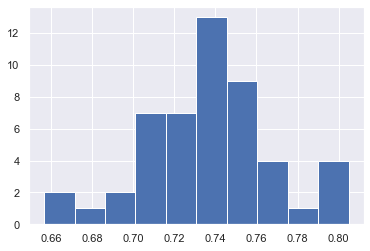

95.0 confidence interval 66.7% and 80.2%


In [357]:
from matplotlib import pyplot
# plot scores
pyplot.hist(results)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Final summary:

* The ensemble models have performed well compared to that of linear,KNN,SVR models
* The best performance is given by Gradient boosting model with training (score-0.74, RMSE:125250.678917), Validation (Testing) (score-0.74, RSME:126119.532265).
* After Hyper tuning the scores for training (score-0.87, RMSE: 87300.945397), Validation (Testing) (score-0.74, RSME: 125399.617617). The 95% confidence interval scores range from 66.7 to 80%.
* The top key features that drive the price of the property are: 'furnished_1', 'yr_built', 'living_measure','quality_8', 'HouseLandRatio', 'lot_measure15', 'quality_9', 'ceil_measure', 'total_area'.
* The above data is also reinforced by the analysis done during bivariate analysis done with Exploratory data analysis
* For further improvisation in the model scores, the datasets can be made by treating outliers in different ways and further hyper tuning the ensemble models.
